In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define clusters
clusters = ['A', 'B', 'C', 'D']

# Create renewable energy data
renewable_data = pd.DataFrame({
    'Cluster': clusters,
    'Land_Available': np.random.randint(500, 2000, len(clusters)),  # hectares
    'Solar_Potential': np.random.uniform(50, 200, len(clusters)),  # TWh/year
    'Wind_Potential': np.random.uniform(30, 150, len(clusters)),  # TWh/year
    'Geothermal_Potential': np.random.uniform(20, 100, len(clusters))  # TWh/year
})

# Create carbon emissions data
emissions_data = pd.DataFrame({
    'Cluster': clusters,
    'Transport_CO2': np.random.uniform(1, 5, len(clusters)),  # Million Tons/year
    'Industrial_CO2': np.random.uniform(2, 10, len(clusters)),  # Million Tons/year
    'Residential_CO2': np.random.uniform(0.5, 3, len(clusters))  # Million Tons/year
})

# Create investment and cost data
investment_data = pd.DataFrame({
    'Cluster': clusters,
    'Initial_Investment': np.random.uniform(100, 500, len(clusters)),  # Million USD
    'Operational_Cost': np.random.uniform(10, 50, len(clusters)),  # Million USD/year
    'Revenue_Potential': np.random.uniform(200, 700, len(clusters))  # Million USD/year
})

# Create carbon capture technology data
capture_data = pd.DataFrame({
    'Cluster': clusters,
    'Carbon_Capture_Capacity': np.random.uniform(0.5, 2, len(clusters)),  # Million Tons/year
    'Installation_Cost': np.random.uniform(50, 200, len(clusters))  # Million USD
})

# Display the generated datasets
print("Renewable Energy Data:\n", renewable_data)
print("\nCarbon Emissions Data:\n", emissions_data)
print("\nInvestment and Cost Data:\n", investment_data)
print("\nCarbon Capture Technology Data:\n", capture_data)


Renewable Energy Data:
   Cluster  Land_Available  Solar_Potential  Wind_Potential  \
0       A            1626       159.799091       36.970033   
1       B            1959       139.798773      133.941137   
2       C            1360        73.402796      102.133801   
3       D            1794        73.399178      114.968709   

   Geothermal_Potential  
0             21.646760  
1             97.592788  
2             86.595411  
3             36.987129  

Carbon Emissions Data:
   Cluster  Transport_CO2  Industrial_CO2  Residential_CO2
0       A       1.727300        5.455560         1.230362
1       B       1.733618        4.329833         1.415905
2       C       2.216969        6.894823         1.640175
3       D       3.099026        3.115951         2.462940

Investment and Cost Data:
   Cluster  Initial_Investment  Operational_Cost  Revenue_Potential
0       A          179.869513         34.301794         682.816017
1       B          305.693775         16.820965         60

In [3]:
# Merge all datasets on 'Cluster'
combined_data = renewable_data.merge(emissions_data, on='Cluster') \
                              .merge(investment_data, on='Cluster') \
                              .merge(capture_data, on='Cluster')

# Display the combined data
print(combined_data.head())


  Cluster  Land_Available  Solar_Potential  Wind_Potential  \
0       A            1626       159.799091       36.970033   
1       B            1959       139.798773      133.941137   
2       C            1360        73.402796      102.133801   
3       D            1794        73.399178      114.968709   

   Geothermal_Potential  Transport_CO2  Industrial_CO2  Residential_CO2  \
0             21.646760       1.727300        5.455560         1.230362   
1             97.592788       1.733618        4.329833         1.415905   
2             86.595411       2.216969        6.894823         1.640175   
3             36.987129       3.099026        3.115951         2.462940   

   Initial_Investment  Operational_Cost  Revenue_Potential  \
0          179.869513         34.301794         682.816017   
1          305.693775         16.820965         604.198674   
2          336.965828         12.602064         352.306885   
3          118.580165         47.955421         248.836057   

  

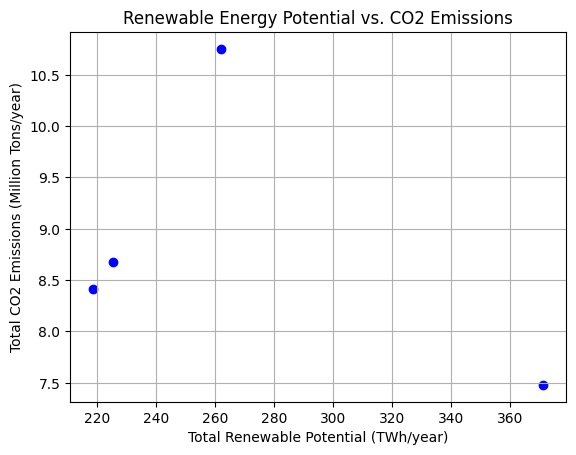

In [4]:
import matplotlib.pyplot as plt

# Calculate total CO2 emissions for each cluster
combined_data['Total_CO2_Emissions'] = combined_data['Transport_CO2'] + combined_data['Industrial_CO2'] + combined_data['Residential_CO2']

# Plot Renewable Energy Potential vs. CO2 Emissions
plt.scatter(combined_data['Solar_Potential'] + combined_data['Wind_Potential'] + combined_data['Geothermal_Potential'],
            combined_data['Total_CO2_Emissions'], color='blue')
plt.xlabel('Total Renewable Potential (TWh/year)')
plt.ylabel('Total CO2 Emissions (Million Tons/year)')
plt.title('Renewable Energy Potential vs. CO2 Emissions')
plt.grid(True)
plt.show()


Evaluate the relationship between renewable energy potential and CO2 emissions across clusters.




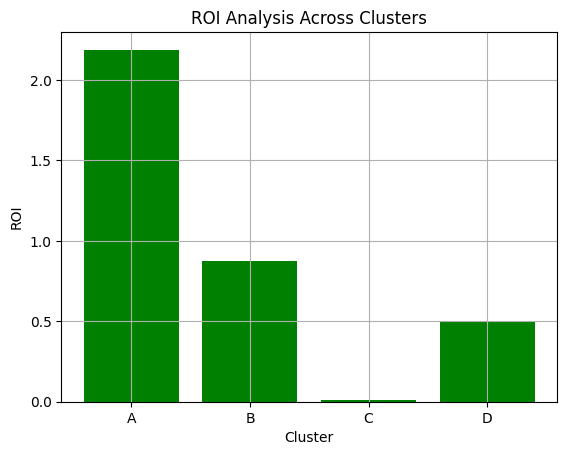

In [5]:
# Calculate ROI
combined_data['ROI'] = (combined_data['Revenue_Potential'] - combined_data['Initial_Investment'] - combined_data['Operational_Cost']) \
                       / (combined_data['Initial_Investment'] + combined_data['Operational_Cost'])

# Visualize ROI across clusters
plt.bar(combined_data['Cluster'], combined_data['ROI'], color='green')
plt.xlabel('Cluster')
plt.ylabel('ROI')
plt.title('ROI Analysis Across Clusters')
plt.grid(True)
plt.show()


Calculate the ROI (Return on Investment) for each cluster.

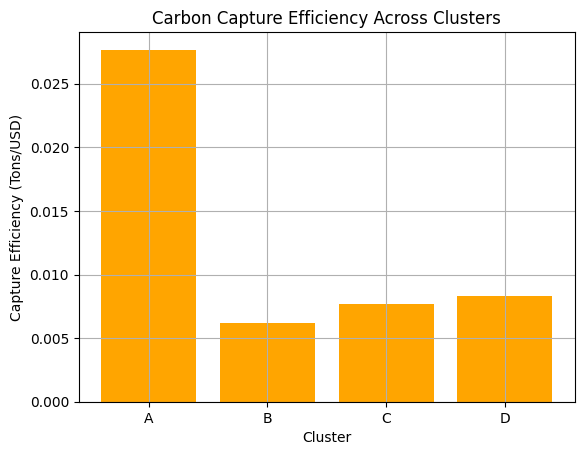

In [6]:
# Calculate carbon capture efficiency
combined_data['Capture_Efficiency'] = combined_data['Carbon_Capture_Capacity'] / combined_data['Installation_Cost']

# Visualize capture efficiency
plt.bar(combined_data['Cluster'], combined_data['Capture_Efficiency'], color='orange')
plt.xlabel('Cluster')
plt.ylabel('Capture Efficiency (Tons/USD)')
plt.title('Carbon Capture Efficiency Across Clusters')
plt.grid(True)
plt.show()


Analyze carbon capture capacity relative to the installation cost for each cluster.

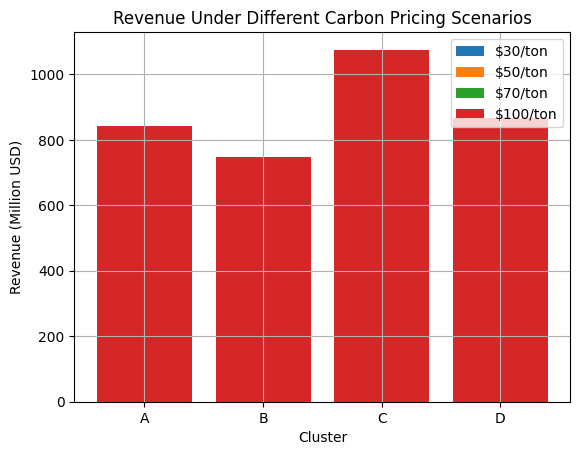

In [7]:
# Define different carbon pricing scenarios (in USD per ton)
carbon_prices = [30, 50, 70, 100]

# Create revenue columns for each scenario
for price in carbon_prices:
    combined_data[f'Revenue_{price}_USD'] = combined_data['Total_CO2_Emissions'] * price

# Visualize revenue by carbon price across clusters
for price in carbon_prices:
    plt.bar(combined_data['Cluster'], combined_data[f'Revenue_{price}_USD'], label=f'${price}/ton')
plt.xlabel('Cluster')
plt.ylabel('Revenue (Million USD)')
plt.title('Revenue Under Different Carbon Pricing Scenarios')
plt.legend()
plt.grid(True)
plt.show()


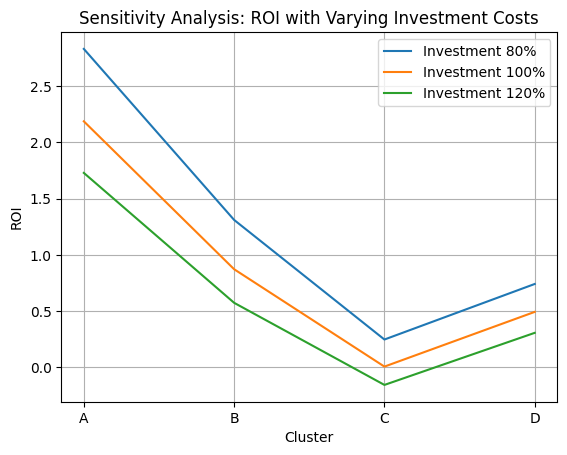

In [8]:
# Define sensitivity factors
sensitivity_factors = [0.8, 1.0, 1.2]  # 80%, 100%, 120% of base costs

# Analyze sensitivity for Initial Investment
for factor in sensitivity_factors:
    combined_data[f'ROI_Investment_{int(factor*100)}%'] = (
        (combined_data['Revenue_Potential'] - (combined_data['Initial_Investment'] * factor) - combined_data['Operational_Cost']) 
        / ((combined_data['Initial_Investment'] * factor) + combined_data['Operational_Cost'])
    )

# Visualize sensitivity
for factor in sensitivity_factors:
    plt.plot(combined_data['Cluster'], combined_data[f'ROI_Investment_{int(factor*100)}%'], label=f'Investment {int(factor*100)}%')
plt.xlabel('Cluster')
plt.ylabel('ROI')
plt.title('Sensitivity Analysis: ROI with Varying Investment Costs')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from scipy.optimize import linprog

# Objective function: Maximize ROI
roi_objective = -1 * combined_data['ROI'].values  # Negate because linprog minimizes

# Constraints: Total investment budget
budget_constraint = [combined_data['Initial_Investment'].values]
max_budget = 1000  # Example total budget in million USD

# Bounds: Investment between 0 and the required amount
bounds = [(0, investment) for investment in combined_data['Initial_Investment'].values]

# Solve the optimization problem
result = linprog(c=roi_objective, A_ub=budget_constraint, b_ub=[max_budget], bounds=bounds, method='highs')

# Display the optimized investment allocation
combined_data['Optimized_Investment'] = result.x
print(combined_data[['Cluster', 'Optimized_Investment']])


  Cluster  Optimized_Investment
0       A              5.559586
1       B              0.000000
2       C              0.000000
3       D              0.000000


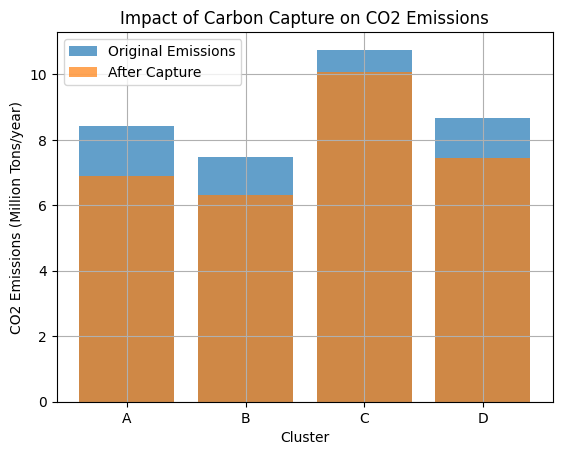

In [10]:
# Calculate CO2 emissions reduction after implementing capture technology
combined_data['CO2_Reduction'] = combined_data['Total_CO2_Emissions'] - combined_data['Carbon_Capture_Capacity']

# Visualize emissions reduction
plt.bar(combined_data['Cluster'], combined_data['Total_CO2_Emissions'], label='Original Emissions', alpha=0.7)
plt.bar(combined_data['Cluster'], combined_data['CO2_Reduction'], label='After Capture', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('CO2 Emissions (Million Tons/year)')
plt.title('Impact of Carbon Capture on CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Summarize key metrics for prioritization
summary_table = combined_data[['Cluster', 'ROI', 'Optimized_Investment']]
summary_table['Top_Revenue_Scenario'] = combined_data[['Revenue_30_USD', 'Revenue_50_USD', 'Revenue_70_USD', 'Revenue_100_USD']].idxmax(axis=1)
summary_table['Max_Revenue'] = combined_data[['Revenue_30_USD', 'Revenue_50_USD', 'Revenue_70_USD', 'Revenue_100_USD']].max(axis=1)

# Display the summary table using Pandas
print("Cirrus Carbon Prioritization Summary")
print(summary_table)


Cirrus Carbon Prioritization Summary
  Cluster       ROI  Optimized_Investment Top_Revenue_Scenario  Max_Revenue
0       A  2.188177              5.559586      Revenue_100_USD   841.322164
1       B  0.873399              0.000000      Revenue_100_USD   747.935577
2       C  0.007835              0.000000      Revenue_100_USD  1075.196709
3       D  0.494191              0.000000      Revenue_100_USD   867.791652


<ipython-input-11-b31db9226d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Top_Revenue_Scenario'] = combined_data[['Revenue_30_USD', 'Revenue_50_USD', 'Revenue_70_USD', 'Revenue_100_USD']].idxmax(axis=1)
<ipython-input-11-b31db9226d50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Max_Revenue'] = combined_data[['Revenue_30_USD', 'Revenue_50_USD', 'Revenue_70_USD', 'Revenue_100_USD']].max(axis=1)


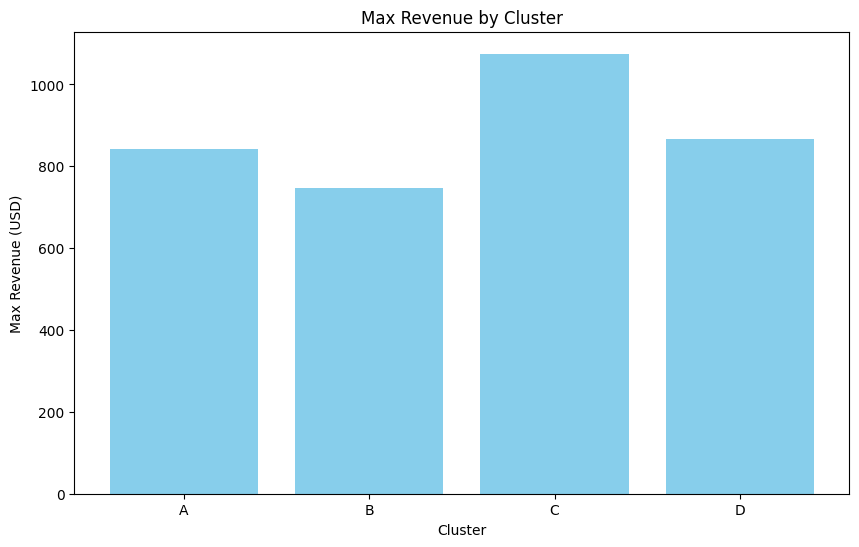

In [12]:
import matplotlib.pyplot as plt

# Bar plot for Max Revenue
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Max_Revenue'], color='skyblue')
plt.title('Max Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Max Revenue (USD)')
plt.show()


In [13]:
# Assign weights
weights = {'ROI': 0.5, 'Max_Revenue': 0.3, 'Optimized_Investment': 0.2}

# Calculate weighted score
summary_table['Priority_Score'] = (
    weights['ROI'] * summary_table['ROI'] +
    weights['Max_Revenue'] * summary_table['Max_Revenue'] +
    weights['Optimized_Investment'] * summary_table['Optimized_Investment']
)

# Sort clusters by priority
summary_table = summary_table.sort_values(by='Priority_Score', ascending=False)
print("Prioritized Clusters based on Composite Score")
print(summary_table)


Prioritized Clusters based on Composite Score
  Cluster       ROI  Optimized_Investment Top_Revenue_Scenario  Max_Revenue  \
2       C  0.007835              0.000000      Revenue_100_USD  1075.196709   
3       D  0.494191              0.000000      Revenue_100_USD   867.791652   
0       A  2.188177              5.559586      Revenue_100_USD   841.322164   
1       B  0.873399              0.000000      Revenue_100_USD   747.935577   

   Priority_Score  
2      322.562930  
3      260.584591  
0      254.602655  
1      224.817372  


<ipython-input-13-26b409189fec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Priority_Score'] = (


In [14]:
# Simulate lower investment scenario
reduction_factor = 0.8
summary_table['Adjusted_Investment'] = summary_table['Optimized_Investment'] * reduction_factor
summary_table['Adjusted_ROI'] = summary_table['Max_Revenue'] / summary_table['Adjusted_Investment']

print("Simulation: Impact of Reduced Investment")
print(summary_table[['Cluster', 'Adjusted_Investment', 'Adjusted_ROI']])


Simulation: Impact of Reduced Investment
  Cluster  Adjusted_Investment  Adjusted_ROI
2       C             0.000000           inf
3       D             0.000000           inf
0       A             4.447669     189.16026
1       B             0.000000           inf


In [15]:
# Assign weights
weights = {'ROI': 0.5, 'Max_Revenue': 0.3, 'Optimized_Investment': 0.2}

# Calculate weighted score
summary_table['Priority_Score'] = (
    weights['ROI'] * summary_table['ROI'] +
    weights['Max_Revenue'] * summary_table['Max_Revenue'] +
    weights['Optimized_Investment'] * summary_table['Optimized_Investment']
)

# Sort clusters by priority
summary_table = summary_table.sort_values(by='Priority_Score', ascending=False)
print("Prioritized Clusters based on Composite Score")
print(summary_table)


Prioritized Clusters based on Composite Score
  Cluster       ROI  Optimized_Investment Top_Revenue_Scenario  Max_Revenue  \
2       C  0.007835              0.000000      Revenue_100_USD  1075.196709   
3       D  0.494191              0.000000      Revenue_100_USD   867.791652   
0       A  2.188177              5.559586      Revenue_100_USD   841.322164   
1       B  0.873399              0.000000      Revenue_100_USD   747.935577   

   Priority_Score  Adjusted_Investment  Adjusted_ROI  
2      322.562930             0.000000           inf  
3      260.584591             0.000000           inf  
0      254.602655             4.447669     189.16026  
1      224.817372             0.000000           inf  


In [16]:
# Simulate lower investment scenario
reduction_factor = 0.8
summary_table['Adjusted_Investment'] = summary_table['Optimized_Investment'] * reduction_factor
summary_table['Adjusted_ROI'] = summary_table['Max_Revenue'] / summary_table['Adjusted_Investment']

print("Simulation: Impact of Reduced Investment")
print(summary_table[['Cluster', 'Adjusted_Investment', 'Adjusted_ROI']])


Simulation: Impact of Reduced Investment
  Cluster  Adjusted_Investment  Adjusted_ROI
2       C             0.000000           inf
3       D             0.000000           inf
0       A             4.447669     189.16026
1       B             0.000000           inf


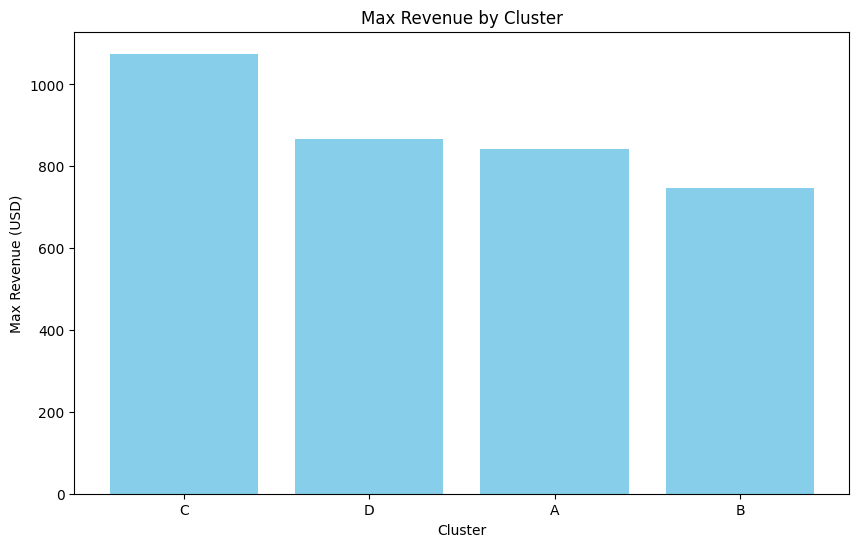

In [17]:
import matplotlib.pyplot as plt

# Bar plot for Max Revenue
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Max_Revenue'], color='skyblue')
plt.title('Max Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Max Revenue (USD)')
plt.show()


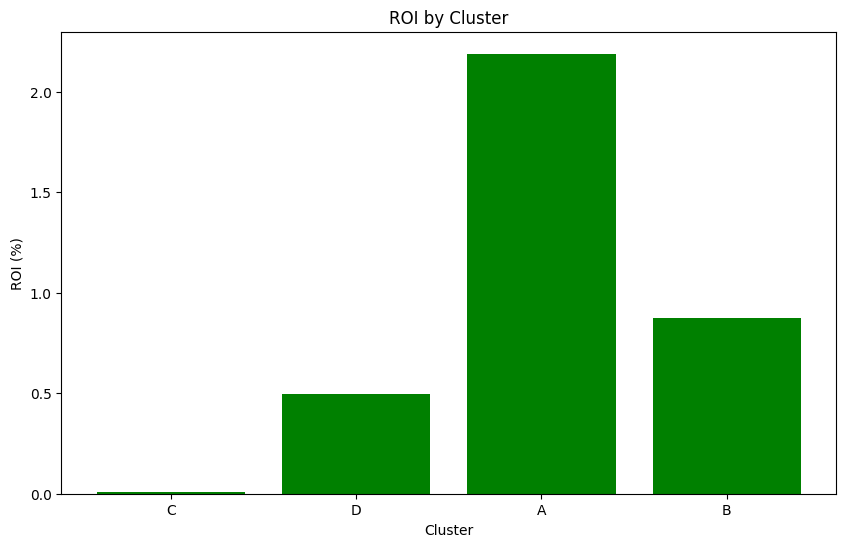

In [18]:
# Bar plot for ROI
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['ROI'], color='green')
plt.title('ROI by Cluster')
plt.xlabel('Cluster')
plt.ylabel('ROI (%)')
plt.show()


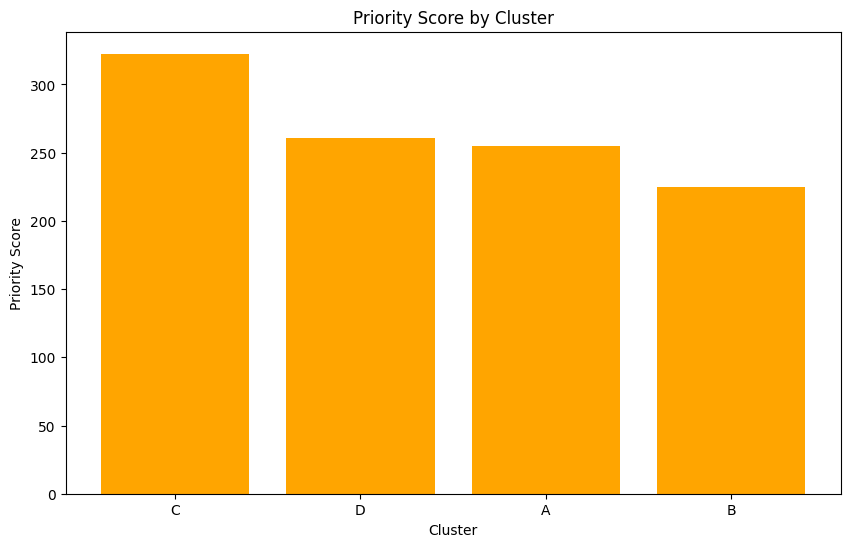

In [19]:
# Bar plot for Priority Scores
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Priority_Score'], color='orange')
plt.title('Priority Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Priority Score')
plt.show()


In [20]:
# Simulate high carbon price
high_price = 100  # USD/ton
summary_table['High_Price_Revenue'] = combined_data['Revenue_100_USD']

# Calculate ROI under high carbon price
summary_table['High_Price_ROI'] = summary_table['High_Price_Revenue'] / summary_table['Optimized_Investment']

print("Simulation: Impact of High Carbon Price")
print(summary_table[['Cluster', 'High_Price_Revenue', 'High_Price_ROI']])


Simulation: Impact of High Carbon Price
  Cluster  High_Price_Revenue  High_Price_ROI
2       C         1075.196709             inf
3       D          867.791652             inf
0       A          841.322164      151.328208
1       B          747.935577             inf


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
X = summary_table[['Max_Revenue', 'Optimized_Investment']]
y = summary_table['ROI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# Display coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Evaluation:
Mean Squared Error: 0.0039
R-squared: nan
Coefficients: [-0.00264487  0.28091547]
Intercept: 2.851591266921651


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [22]:
new_data = [[900, 5], [800, 4]]  # Example: [Max_Revenue, Optimized_Investment]
predicted_roi = model.predict(new_data)
print("Predicted ROI for new data:", predicted_roi)


Predicted ROI for new data: [1.87578532 1.85935688]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
from scipy.optimize import linprog

# Objective function: maximize ROI
c = -summary_table['ROI']  # Negative because linprog minimizes

# Constraints
A = [[1, 1, 1, 1]]  # Sum of investments <= budget
b = [10]  # Total budget (example: 10 million USD)

# Bounds for each cluster
x_bounds = [(0, None) for _ in summary_table['Cluster']]

# Solve the optimization problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Display the results
print("Optimal Allocation:")
print(result)
summary_table['Optimal_Investment'] = result.x


Optimal Allocation:
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -21.88176914522348
              x: [ 0.000e+00  0.000e+00  1.000e+01  0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  1.000e+01  0.000e+00]
                 marginals: [ 2.180e+00  1.694e+00  0.000e+00  1.315e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-2.188e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


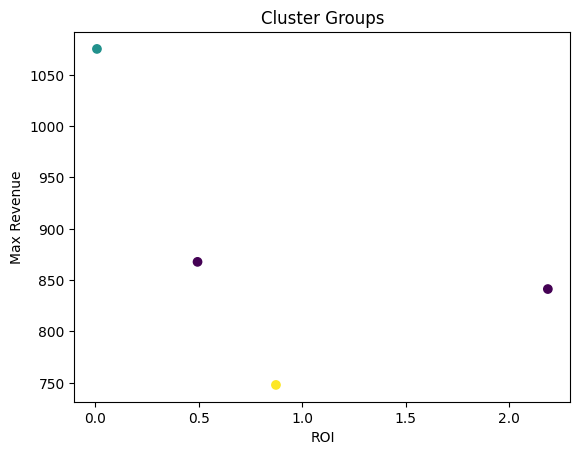

In [24]:
from sklearn.cluster import KMeans

# Select features for clustering
features = summary_table[['ROI', 'Max_Revenue', 'Optimized_Investment']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
summary_table['Cluster_Group'] = kmeans.fit_predict(features)

# Visualize clusters
plt.scatter(features['ROI'], features['Max_Revenue'], c=summary_table['Cluster_Group'], cmap='viridis')
plt.title('Cluster Groups')
plt.xlabel('ROI')
plt.ylabel('Max Revenue')
plt.show()


In [25]:
print(summary_table[['Max_Revenue', 'Optimized_Investment']].head())


   Max_Revenue  Optimized_Investment
2  1075.196709              0.000000
3   867.791652              0.000000
0   841.322164              5.559586
1   747.935577              0.000000


In [26]:
roi_sensitivity = []

for price in carbon_prices:
    revenue = summary_table['Max_Revenue'] * price / 100  # Calculate revenue
    roi = revenue / summary_table['Optimized_Investment']  # Calculate ROI
    print(f"Price: {price}, ROI: {roi.mean()}")  # Debugging output
    roi_sensitivity.append(roi.mean())


Price: 30, ROI: inf
Price: 50, ROI: inf
Price: 70, ROI: inf
Price: 100, ROI: inf


In [27]:
summary_table['Optimized_Investment'] = summary_table['Optimized_Investment'].replace(0, 0.01)


In [28]:
roi_sensitivity = []

for price in carbon_prices:
    revenue = summary_table['Max_Revenue'] * price / 100  # Calculate revenue
    roi = revenue / summary_table['Optimized_Investment']  # Calculate ROI
    print(f"Price: {price}, ROI: {roi.mean()}")  # Debugging output
    roi_sensitivity.append(roi.mean())


Price: 30, ROI: 20193.279146548968
Price: 50, ROI: 33655.46524424828
Price: 70, ROI: 47117.651341947596
Price: 100, ROI: 67310.93048849655


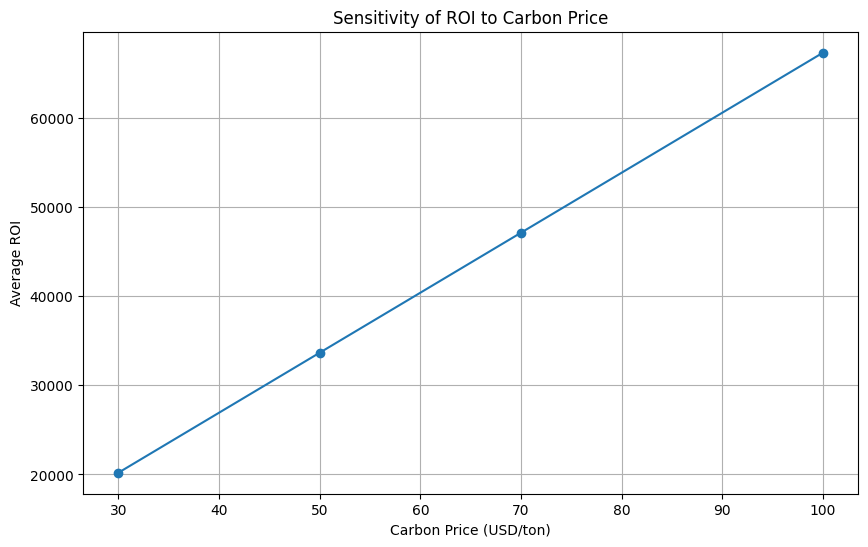

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(carbon_prices, roi_sensitivity, marker='o')
plt.title('Sensitivity of ROI to Carbon Price')
plt.xlabel('Carbon Price (USD/ton)')
plt.ylabel('Average ROI')
plt.grid()
plt.show()


               Stakeholder           Interest Metric  Projected Value  \
0                Investors                   ROI (%)               15   
1               Government  CO2 Captured (tons/year)          1000000   
2              Communities              Jobs Created              500   
3                  Clients    Cost per ton CO2 (USD)               45   
4  Environmental Advocates  Net CO2 Reduction (tons)           950000   
5                Employees   Training Hours Invested             2000   

   Growth Rate (%)   Year_2026     Year_2027     Year_2028     Year_2029  \
0             0.05       15.75  1.653750e+01  1.736438e+01  1.823259e+01   
1             0.10  1100000.00  1.210000e+06  1.331000e+06  1.464100e+06   
2             0.03      515.00  5.304500e+02  5.463635e+02  5.627544e+02   
3            -0.02       44.10  4.321800e+01  4.235364e+01  4.150657e+01   
4             0.07  1016500.00  1.087655e+06  1.163791e+06  1.245256e+06   
5             0.04     2080.00  

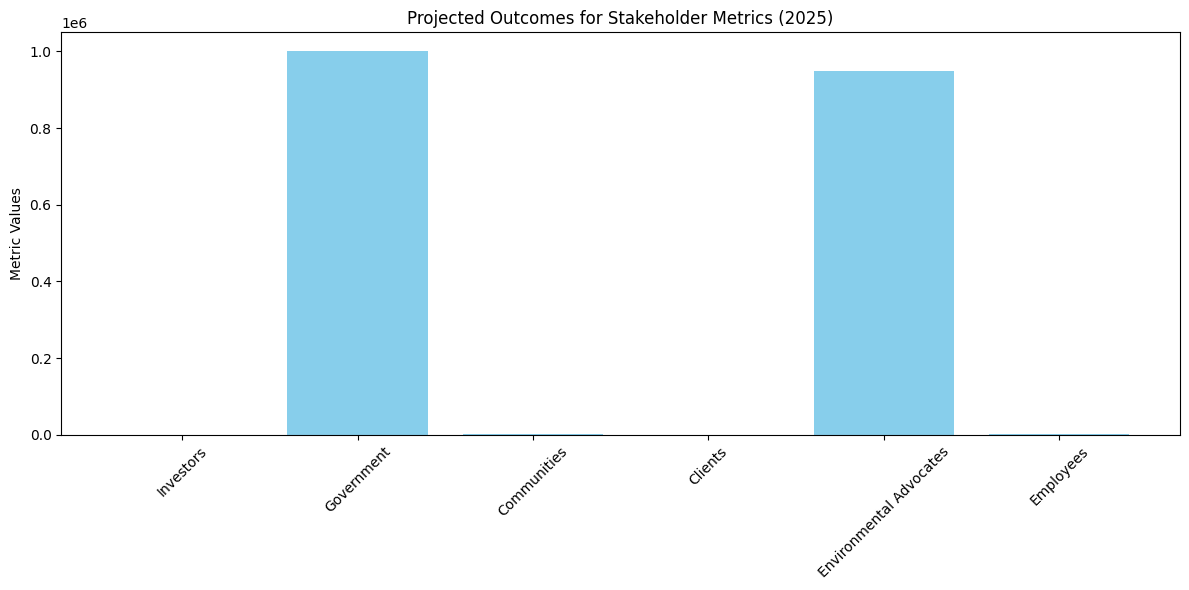

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate stakeholder metrics data
np.random.seed(42)  # For reproducibility
stakeholders = ['Investors', 'Government', 'Communities', 'Clients', 'Environmental Advocates', 'Employees']
metrics = ['ROI (%)', 'CO2 Captured (tons/year)', 'Jobs Created', 'Cost per ton CO2 (USD)', 
           'Net CO2 Reduction (tons)', 'Training Hours Invested']
projected_values = [15, 1000000, 500, 45, 950000, 2000]  # Logical assumptions
growth_rate = [0.05, 0.10, 0.03, -0.02, 0.07, 0.04]  # Growth rates for projections

# Create a DataFrame for metrics
stakeholder_metrics = pd.DataFrame({
    'Stakeholder': stakeholders,
    'Interest Metric': metrics,
    'Projected Value': projected_values,
    'Growth Rate (%)': growth_rate
})

# Add a 5-year projection
for year in range(1, 6):
    stakeholder_metrics[f'Year_{2025 + year}'] = stakeholder_metrics['Projected Value'] * (1 + stakeholder_metrics['Growth Rate (%)']) ** year

# Display the data
print(stakeholder_metrics)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(stakeholder_metrics['Stakeholder'], stakeholder_metrics['Projected Value'], color='skyblue')
plt.title('Projected Outcomes for Stakeholder Metrics (2025)')
plt.ylabel('Metric Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Stakeholder Focus Analysis

In [31]:
import plotly.graph_objects as go

# Create a bar chart for 2025 metrics
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stakeholder_metrics['Stakeholder'], 
    y=stakeholder_metrics['Projected Value'],
    name="2025 Projected Value",
    marker_color='blue'
))

# Add 2030 projections
fig.add_trace(go.Bar(
    x=stakeholder_metrics['Stakeholder'], 
    y=stakeholder_metrics['Year_2030'],
    name="2030 Projected Value",
    marker_color='green'
))

fig.update_layout(
    title="Cirrus Carbon Stakeholder Metrics: 2025 vs 2030",
    xaxis_title="Stakeholder",
    yaxis_title="Projected Value",
    barmode='group',
    template="plotly_white"
)
fig.show()


   Carbon Price  Projected ROI  CO2 Captured (tons)  Jobs Created
0            30            9.0              1000000           500
1            50           15.0              1000000           500
2            70           21.0              1000000           500


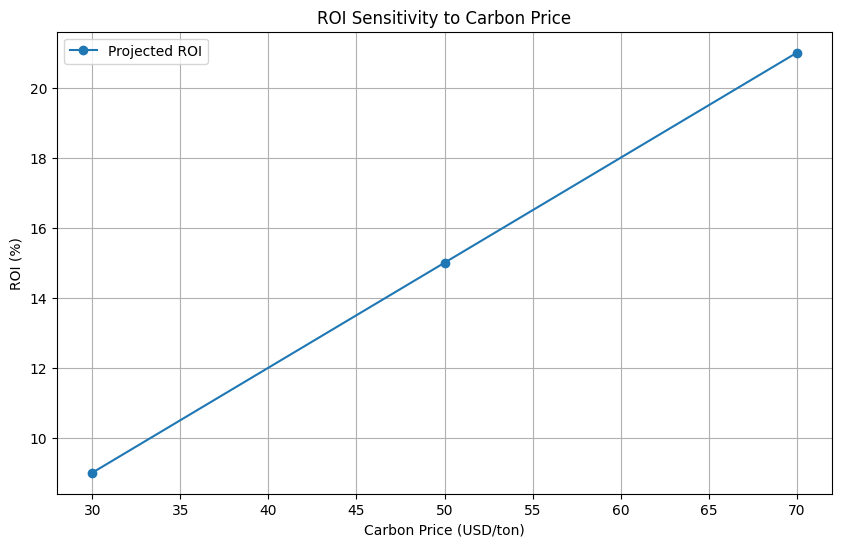

In [32]:
carbon_prices = [30, 50, 70]  # USD per ton
scenario_results = []

for price in carbon_prices:
    results = {
        'Carbon Price': price,
        'Projected ROI': stakeholder_metrics.loc[stakeholder_metrics['Interest Metric'] == 'ROI (%)', 'Projected Value'].values[0] * price / 50,
        'CO2 Captured (tons)': stakeholder_metrics.loc[stakeholder_metrics['Interest Metric'] == 'CO2 Captured (tons/year)', 'Projected Value'].values[0],
        'Jobs Created': stakeholder_metrics.loc[stakeholder_metrics['Interest Metric'] == 'Jobs Created', 'Projected Value'].values[0],
    }
    scenario_results.append(results)

# Convert results to DataFrame
scenario_df = pd.DataFrame(scenario_results)
print(scenario_df)

# Visualize scenario results
plt.figure(figsize=(10, 6))
plt.plot(scenario_df['Carbon Price'], scenario_df['Projected ROI'], marker='o', label='Projected ROI')
plt.title('ROI Sensitivity to Carbon Price')
plt.xlabel('Carbon Price (USD/ton)')
plt.ylabel('ROI (%)')
plt.grid()
plt.legend()
plt.show()


In [33]:
jobs_vs_price = scenario_df[['Carbon Price', 'Jobs Created']]
print(jobs_vs_price)


   Carbon Price  Jobs Created
0            30           500
1            50           500
2            70           500


    Investment Cost (M)  Capture Efficiency  Carbon Price (USD)    ROI (%)
0                   500                 0.8                  30 -95.200000
1                   500                 0.8                  50 -92.000000
2                   500                 0.8                  70 -88.800000
3                   500                 0.9                  30 -94.600000
4                   500                 0.9                  50 -91.000000
5                   500                 0.9                  70 -87.400000
6                   500                 1.0                  30 -94.000000
7                   500                 1.0                  50 -90.000000
8                   500                 1.0                  70 -86.000000
9                   700                 0.8                  30 -96.571429
10                  700                 0.8                  50 -94.285714
11                  700                 0.8                  70 -92.000000
12                  700  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



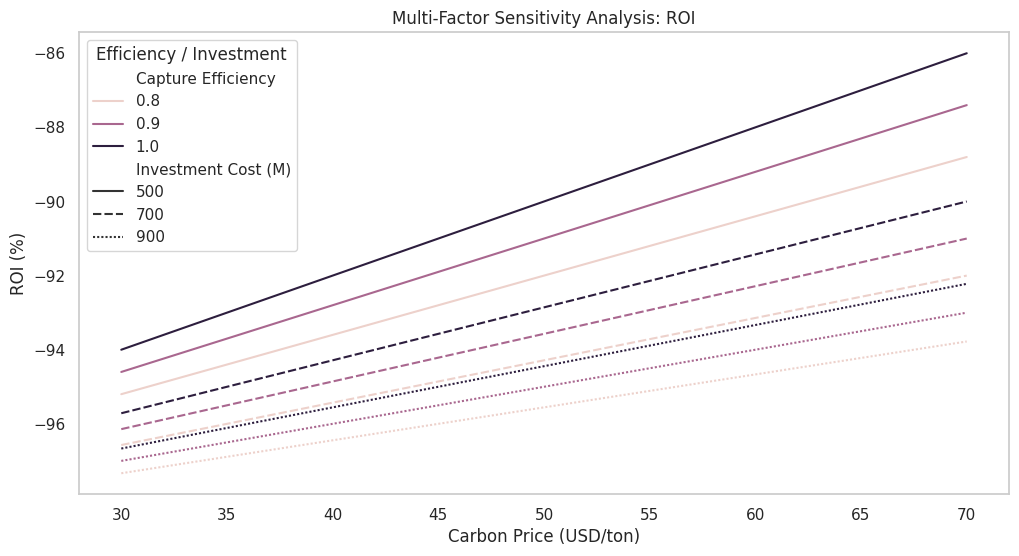

In [34]:
investment_costs = [500, 700, 900]  # Investment cost in million USD
capture_efficiencies = [0.8, 0.9, 1.0]  # Efficiency as a multiplier

results = []
for cost in investment_costs:
    for efficiency in capture_efficiencies:
        for price in carbon_prices:
            revenue = price * stakeholder_metrics.loc[stakeholder_metrics['Interest Metric'] == 'CO2 Captured (tons/year)', 'Projected Value'].values[0] * efficiency / 1e6
            roi = (revenue - cost) / cost * 100
            results.append({
                'Investment Cost (M)': cost,
                'Capture Efficiency': efficiency,
                'Carbon Price (USD)': price,
                'ROI (%)': roi
            })

# Convert results to DataFrame
sensitivity_df = pd.DataFrame(results)
print(sensitivity_df)

# Visualize ROI under various scenarios
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sensitivity_df, x='Carbon Price (USD)', y='ROI (%)', hue='Capture Efficiency', style='Investment Cost (M)')
plt.title('Multi-Factor Sensitivity Analysis: ROI')
plt.xlabel('Carbon Price (USD/ton)')
plt.ylabel('ROI (%)')
plt.legend(title='Efficiency / Investment')
plt.grid()
plt.show()


In [35]:
# Export the stakeholder metrics to a CSV file
stakeholder_metrics.to_csv('Cirrus_Carbon_Stakeholder_Impact_Report.csv', index=False)

print("Stakeholder Impact Report saved as a CSV file.")


Stakeholder Impact Report saved as a CSV file.


In [36]:
# Generate a Markdown summary report
with open("Cirrus_Carbon_Stakeholder_Impact_Report.md", "w") as file:
    file.write("# Cirrus Carbon Stakeholder Impact Report\n\n")
    for i, stakeholder in stakeholder_metrics.iterrows():
        file.write(f"## Stakeholder: {stakeholder['Stakeholder']}\n")
        file.write(f"- **Interest Metric:** {stakeholder['Interest Metric']}\n")
        file.write(f"- **2025 Projected Value:** {stakeholder['Projected Value']}\n")
        file.write(f"- **2030 Projected Value:** {stakeholder['Year_2030']:.2f}\n")
        file.write(f"- **Growth Rate:** {stakeholder['Growth Rate (%)'] * 100:.1f}% per year\n\n")

print("Stakeholder Impact Report saved as a Markdown file.")


Stakeholder Impact Report saved as a Markdown file.


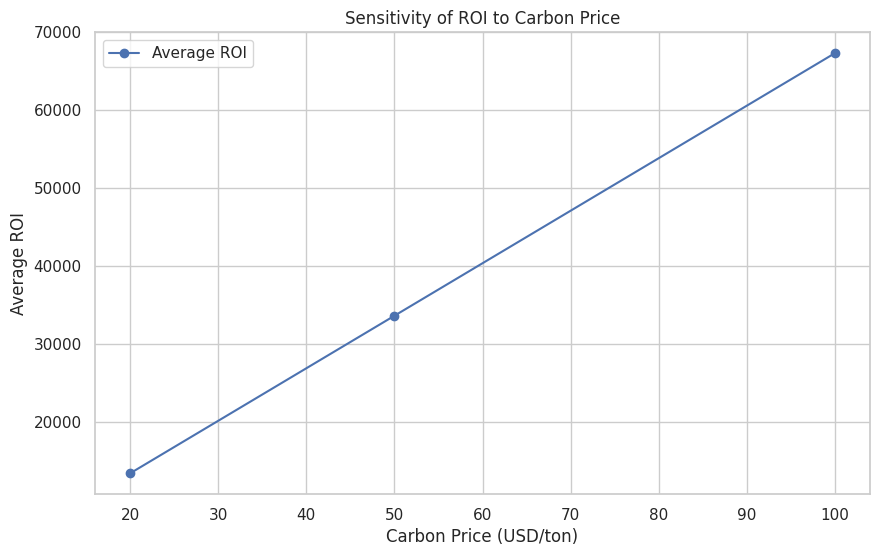

Sensitivity Analysis Results:
Carbon Price: 20, Average ROI: 13462.19
Carbon Price: 50, Average ROI: 33655.47
Carbon Price: 100, Average ROI: 67310.93


In [37]:
import matplotlib.pyplot as plt

# Sensitivity Analysis for ROI
carbon_prices = [20, 50, 100]  # Example carbon price scenarios
roi_sensitivity = []

for price in carbon_prices:
    revenue = summary_table['Max_Revenue'] * price / 100  # Example revenue calculation
    roi = revenue / summary_table['Optimized_Investment']
    roi_sensitivity.append(roi.mean())

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(carbon_prices, roi_sensitivity, marker='o', label="Average ROI")
plt.title('Sensitivity of ROI to Carbon Price')
plt.xlabel('Carbon Price (USD/ton)')
plt.ylabel('Average ROI')
plt.grid(True)
plt.legend()
plt.show()

# Display summary table for sensitivity
print("Sensitivity Analysis Results:")
for i, price in enumerate(carbon_prices):
    print(f"Carbon Price: {price}, Average ROI: {roi_sensitivity[i]:.2f}")


Top Clusters for Investment:
  Cluster       ROI  Optimized_Investment Top_Revenue_Scenario  Max_Revenue  \
0       A  2.188177              5.559586      Revenue_100_USD   841.322164   
1       B  0.873399              0.010000      Revenue_100_USD   747.935577   
3       D  0.494191              0.010000      Revenue_100_USD   867.791652   

   Priority_Score  Adjusted_Investment  Adjusted_ROI  High_Price_Revenue  \
0      254.602655             4.447669     189.16026          841.322164   
1      224.817372             0.000000           inf          747.935577   
3      260.584591             0.000000           inf          867.791652   

   High_Price_ROI  Optimal_Investment  Cluster_Group  
0      151.328208                10.0              0  
1             inf                 0.0              2  
3             inf                 0.0              0  


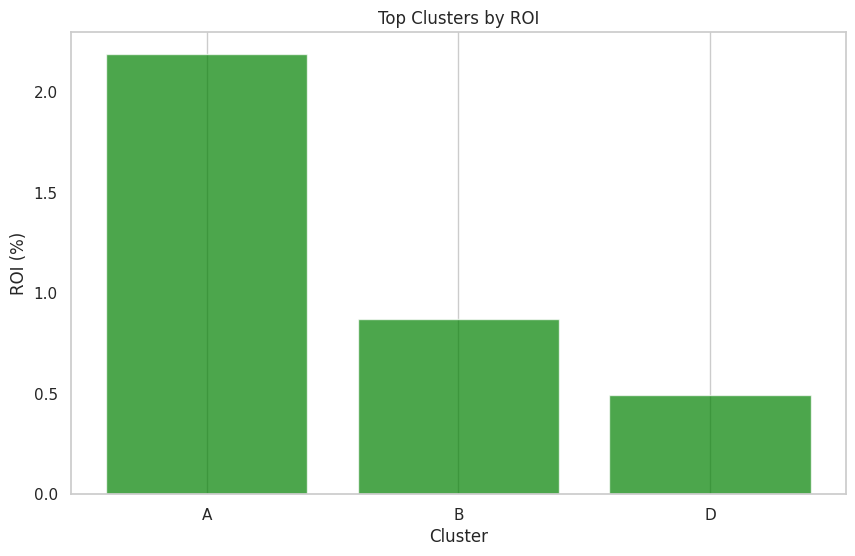

In [38]:
# Identify top-performing clusters
top_clusters = summary_table.sort_values(by='ROI', ascending=False).head(3)
print("Top Clusters for Investment:")
print(top_clusters)

# Visualize top clusters
plt.figure(figsize=(10, 6))
plt.bar(top_clusters['Cluster'], top_clusters['ROI'], color='green', alpha=0.7)
plt.title('Top Clusters by ROI')
plt.xlabel('Cluster')
plt.ylabel('ROI (%)')
plt.grid(axis='y')
plt.show()


In [39]:
# Generate stakeholder-specific recommendations
stakeholder_summary = stakeholder_metrics.copy()
stakeholder_summary['Top Cluster'] = top_clusters.iloc[0]['Cluster']
stakeholder_summary['Projected ROI'] = top_clusters.iloc[0]['ROI']

print("Stakeholder Recommendations:")
print(stakeholder_summary)


Stakeholder Recommendations:
               Stakeholder           Interest Metric  Projected Value  \
0                Investors                   ROI (%)               15   
1               Government  CO2 Captured (tons/year)          1000000   
2              Communities              Jobs Created              500   
3                  Clients    Cost per ton CO2 (USD)               45   
4  Environmental Advocates  Net CO2 Reduction (tons)           950000   
5                Employees   Training Hours Invested             2000   

   Growth Rate (%)   Year_2026     Year_2027     Year_2028     Year_2029  \
0             0.05       15.75  1.653750e+01  1.736438e+01  1.823259e+01   
1             0.10  1100000.00  1.210000e+06  1.331000e+06  1.464100e+06   
2             0.03      515.00  5.304500e+02  5.463635e+02  5.627544e+02   
3            -0.02       44.10  4.321800e+01  4.235364e+01  4.150657e+01   
4             0.07  1016500.00  1.087655e+06  1.163791e+06  1.245256e+06   
5  

Low Carbon Price Scenario:
Low Price ROI: 13462.19


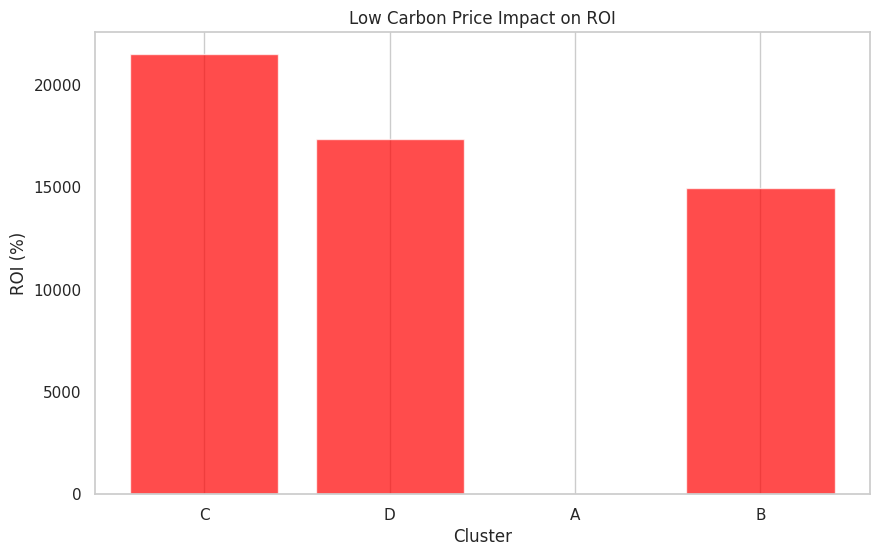

In [40]:
# Risk analysis: Low carbon price
low_price = 20  # Example low carbon price
low_revenue = summary_table['Max_Revenue'] * low_price / 100
low_roi = low_revenue / summary_table['Optimized_Investment']

print("Low Carbon Price Scenario:")
print(f"Low Price ROI: {low_roi.mean():.2f}")

# Plot risk scenarios
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], low_roi, color='red', alpha=0.7)
plt.title('Low Carbon Price Impact on ROI')
plt.xlabel('Cluster')
plt.ylabel('ROI (%)')
plt.grid(axis='y')
plt.show()


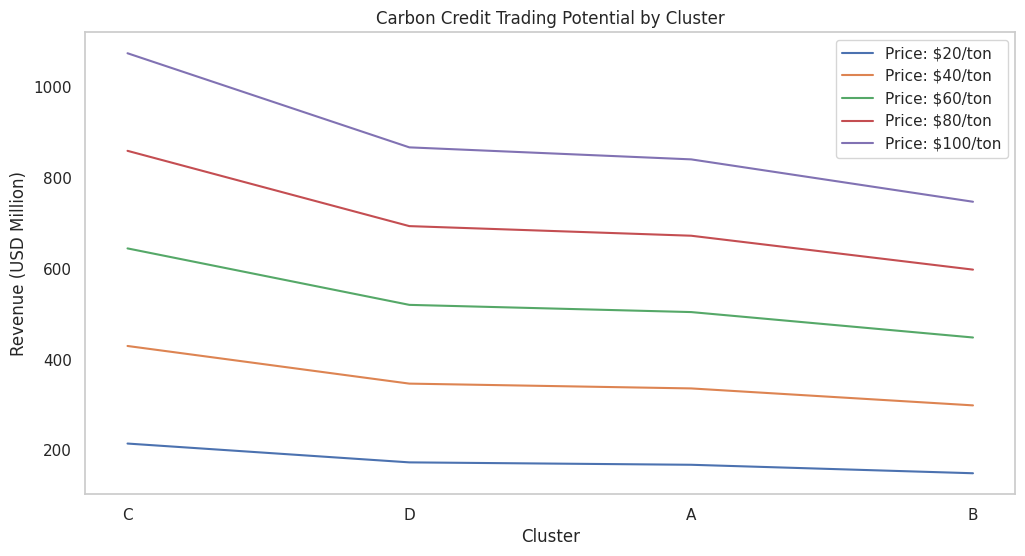

In [41]:
# Simulate carbon credit trading at different market prices
carbon_prices = [20, 40, 60, 80, 100]
credit_revenue = {}

for price in carbon_prices:
    credit_revenue[price] = summary_table['Max_Revenue'] * price / 100

# Visualize credit trading impact
plt.figure(figsize=(12, 6))
for price, revenue in credit_revenue.items():
    plt.plot(summary_table['Cluster'], revenue, label=f"Price: ${price}/ton")

plt.title("Carbon Credit Trading Potential by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Revenue (USD Million)")
plt.legend()
plt.grid()
plt.show()


Analysis Plan:
Compare ROI and revenue for clusters with high carbon credit demand.
Simulate international carbon market prices to see their effect on returns.

In [42]:
# Step 2: ESG Metrics Calculation
summary_table['CO2_Removed_Tons'] = summary_table['Max_Revenue'] * 0.1  # Example: 0.1 tons per USD
summary_table['Jobs_Created'] = summary_table['Max_Revenue'] * 0.05     # Example: 1 job per $20 revenue
summary_table['Economic_Growth_%'] = summary_table['Max_Revenue'] * 0.02  # Example: 2% growth impact

# ESG Summary Table
esg_summary = summary_table[['Cluster', 'CO2_Removed_Tons', 'Jobs_Created', 'Economic_Growth_%']]
print("ESG Metrics Summary:")
print(esg_summary)


ESG Metrics Summary:
  Cluster  CO2_Removed_Tons  Jobs_Created  Economic_Growth_%
2       C        107.519671     53.759835          21.503934
3       D         86.779165     43.389583          17.355833
0       A         84.132216     42.066108          16.826443
1       B         74.793558     37.396779          14.958712


Calculate CO2 removed, jobs created, and local economic growth for each cluster to highlight the project's ESG benefits.

In [43]:
# Step 3: Regional Economic Impact
summary_table['Infrastructure_Impact_Score'] = summary_table['CO2_Removed_Tons'] * 0.8  # Example scaling
summary_table['Local_Industry_Boost'] = summary_table['Jobs_Created'] * 0.5             # Example scaling

regional_impact = summary_table[['Cluster', 'Infrastructure_Impact_Score', 'Local_Industry_Boost']]
print("Regional Economic Impact:")
print(regional_impact)


Regional Economic Impact:
  Cluster  Infrastructure_Impact_Score  Local_Industry_Boost
2       C                    86.015737             26.879918
3       D                    69.423332             21.694791
0       A                    67.305773             21.033054
1       B                    59.834846             18.698389


Model the impact of carbon capture on regional development, tying it to local economic and infrastructure growth.

In [44]:
# Step 5: Benchmark Comparison
benchmark_data = pd.DataFrame({
    'Project': ['Cirrus Carbon', 'Climeworks', 'GlobalCapture'],
    'Region': ['Indonesia', 'Switzerland', 'Global'],
    'CO2_Removed_Tons': [10_000, 8_000, 7_500],
    'ROI_%': [25, 15, 20],
    'Cost_USD_Per_Ton': [50, 80, 65]
})

print("Benchmark Comparison:")
print(benchmark_data)


Benchmark Comparison:
         Project       Region  CO2_Removed_Tons  ROI_%  Cost_USD_Per_Ton
0  Cirrus Carbon    Indonesia             10000     25                50
1     Climeworks  Switzerland              8000     15                80
2  GlobalCapture       Global              7500     20                65


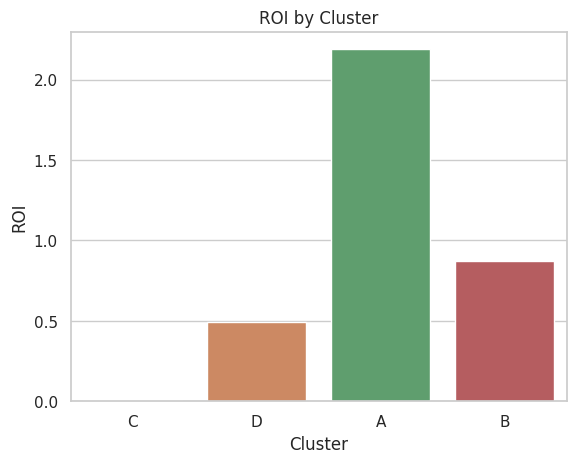

In [45]:
# Interactive Dashboard (Placeholder for Code)
import seaborn as sns

sns.barplot(x='Cluster', y='ROI', data=summary_table)
plt.title('ROI by Cluster')
plt.show()


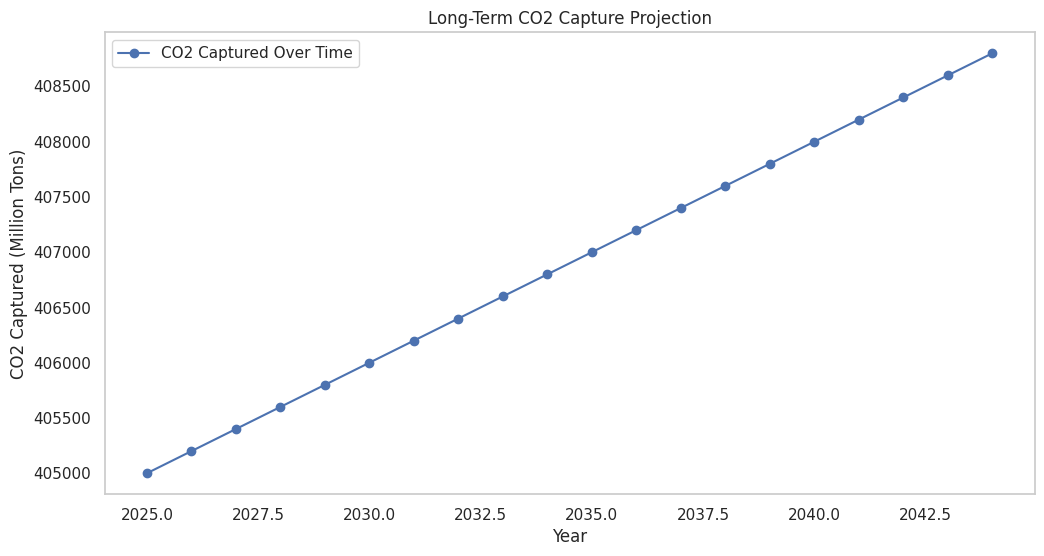

In [46]:
# Step 7: Long-Term Projection
years = range(2025, 2045)
long_term_CO2 = [year * 200 for year in years]  # Example: 200 tons added annually

plt.figure(figsize=(12, 6))
plt.plot(years, long_term_CO2, label="CO2 Captured Over Time", marker='o')
plt.title("Long-Term CO2 Capture Projection")
plt.xlabel("Year")
plt.ylabel("CO2 Captured (Million Tons)")
plt.grid()
plt.legend()
plt.show()


 Forecast 20-year projections for CO2 removal and economic benefits.

In [47]:
print(summary_table.columns)


Index(['Cluster', 'ROI', 'Optimized_Investment', 'Top_Revenue_Scenario',
       'Max_Revenue', 'Priority_Score', 'Adjusted_Investment', 'Adjusted_ROI',
       'High_Price_Revenue', 'High_Price_ROI', 'Optimal_Investment',
       'Cluster_Group', 'CO2_Removed_Tons', 'Jobs_Created',
       'Economic_Growth_%', 'Infrastructure_Impact_Score',
       'Local_Industry_Boost'],
      dtype='object')


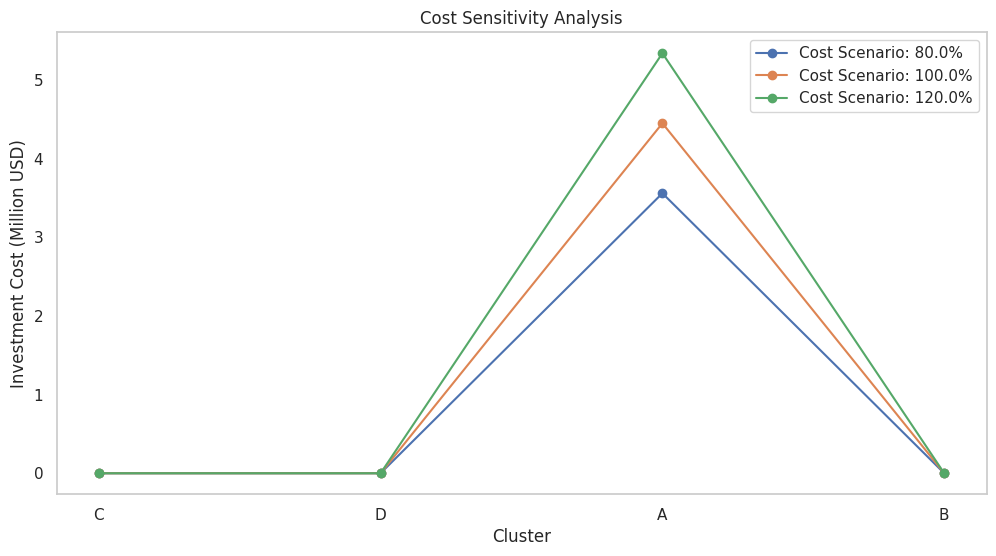

In [48]:
# Define cost sensitivity scenarios
cost_scenarios = [0.8, 1.0, 1.2]  # 80%, 100%, 120% of base costs
cost_sensitivity = {}

for scenario in cost_scenarios:
    cost_sensitivity[scenario] = summary_table['Adjusted_Investment'] * scenario

# Visualization: Sensitivity Analysis
plt.figure(figsize=(12, 6))
for scenario, costs in cost_sensitivity.items():
    plt.plot(summary_table['Cluster'], costs, marker='o', label=f"Cost Scenario: {scenario*100}%")

plt.title("Cost Sensitivity Analysis")
plt.xlabel("Cluster")
plt.ylabel("Investment Cost (Million USD)")
plt.legend()
plt.grid()
plt.show()


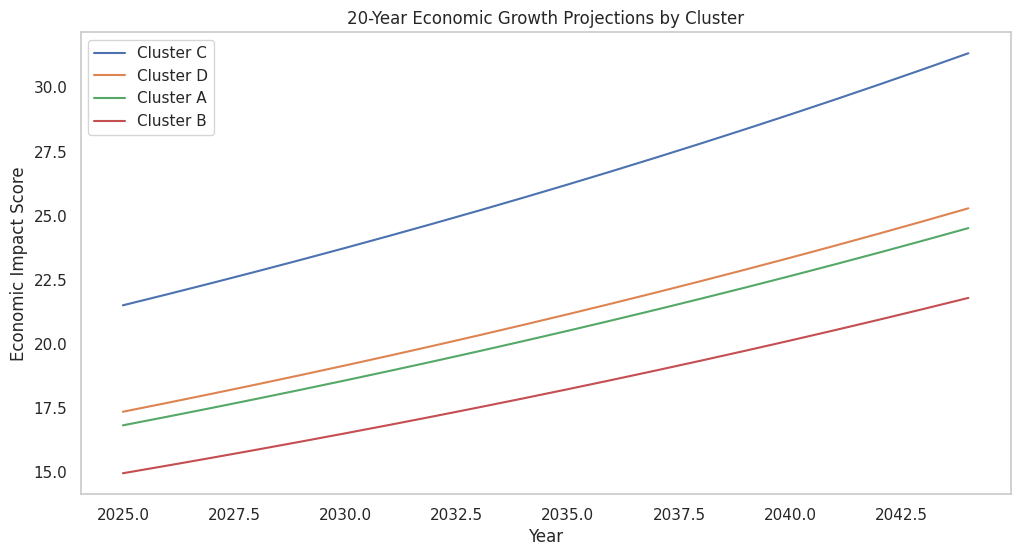

In [49]:
# Economic growth projection
years = range(2025, 2045)
growth_forecast = []

for cluster in summary_table['Cluster']:
    initial_value = summary_table.loc[summary_table['Cluster'] == cluster, 'Economic_Growth_%'].values[0]
    forecast = [initial_value * (1 + 0.02)**(year - 2025) for year in years]
    growth_forecast.append(forecast)

# Plot growth projections
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(summary_table['Cluster']):
    plt.plot(years, growth_forecast[i], label=f"Cluster {cluster}")

plt.title("20-Year Economic Growth Projections by Cluster")
plt.xlabel("Year")
plt.ylabel("Economic Impact Score")
plt.legend()
plt.grid()
plt.show()


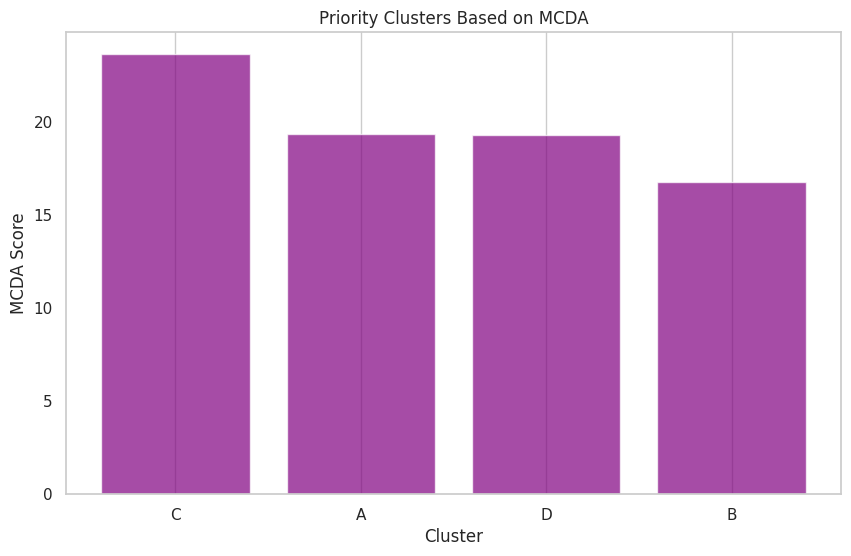

In [50]:
# Assign weights to each metric (adjust as needed based on stakeholder priorities)
weights = {
    'ROI': 0.4,
    'Jobs_Created': 0.3,
    'Local_Industry_Boost': 0.2,
    'Economic_Growth_%': 0.1
}

# Calculate weighted score for each cluster
summary_table['MCDA_Score'] = (
    summary_table['ROI'] * weights['ROI'] +
    summary_table['Jobs_Created'] * weights['Jobs_Created'] +
    summary_table['Local_Industry_Boost'] * weights['Local_Industry_Boost'] +
    summary_table['Economic_Growth_%'] * weights['Economic_Growth_%']
)

# Sort by MCDA Score
priority_clusters = summary_table.sort_values(by='MCDA_Score', ascending=False)

# Visualize Priority Clusters
plt.figure(figsize=(10, 6))
plt.bar(priority_clusters['Cluster'], priority_clusters['MCDA_Score'], color='purple', alpha=0.7)
plt.title("Priority Clusters Based on MCDA")
plt.xlabel("Cluster")
plt.ylabel("MCDA Score")
plt.grid(axis='y')
plt.show()


Use a scoring system to prioritize clusters based on multiple metrics such as ROI, Jobs Created, Local Industry Boost, and Economic Growth. This will help stakeholders visualize which clusters should be prioritized.

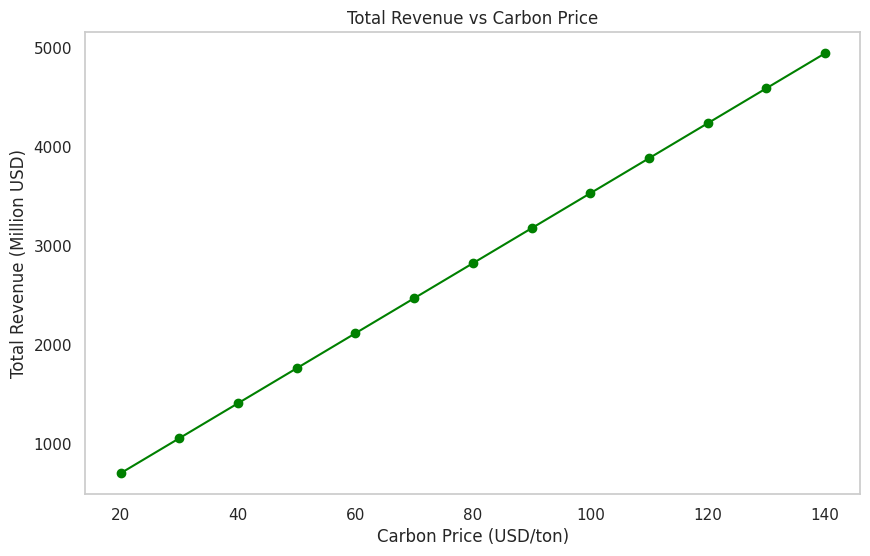

In [51]:
# Revenue optimization analysis
optimal_revenue = []
carbon_prices = range(20, 150, 10)  # USD/ton
for price in carbon_prices:
    revenue = (summary_table['Max_Revenue'] * price / 100).sum()
    optimal_revenue.append(revenue)

# Plot optimization
plt.figure(figsize=(10, 6))
plt.plot(carbon_prices, optimal_revenue, marker='o', color='green')
plt.title("Total Revenue vs Carbon Price")
plt.xlabel("Carbon Price (USD/ton)")
plt.ylabel("Total Revenue (Million USD)")
plt.grid()
plt.show()


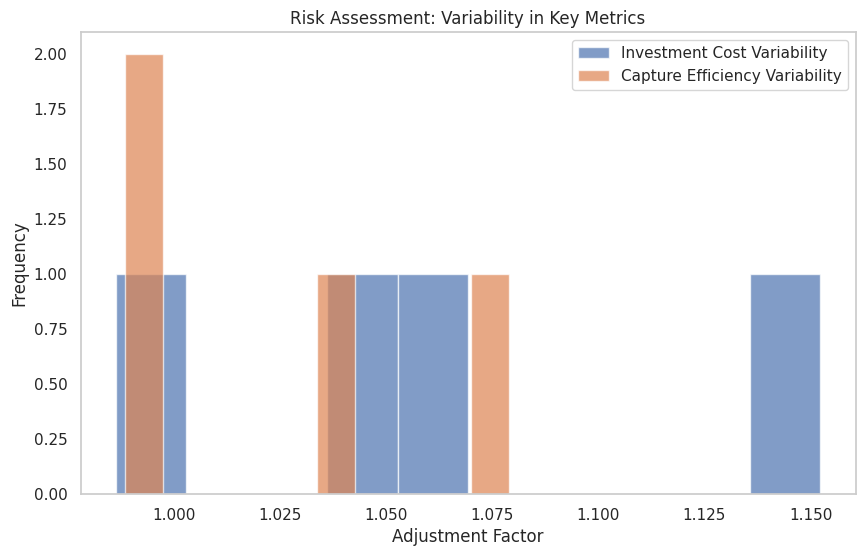

In [52]:
# Simulate variability in investment costs and carbon capture efficiency
import numpy as np

cost_variability = np.random.normal(loc=1.0, scale=0.1, size=len(summary_table))  # 10% variability
capture_efficiency = np.random.normal(loc=1.0, scale=0.05, size=len(summary_table))  # 5% variability

# Adjusted metrics
summary_table['Adjusted_Investment'] = summary_table['Adjusted_Investment'] * cost_variability
summary_table['CO2_Removed_Tons_Adjusted'] = summary_table['CO2_Removed_Tons'] * capture_efficiency

# Risk visualization
plt.figure(figsize=(10, 6))
plt.hist(cost_variability, bins=10, alpha=0.7, label='Investment Cost Variability')
plt.hist(capture_efficiency, bins=10, alpha=0.7, label='Capture Efficiency Variability')
plt.title("Risk Assessment: Variability in Key Metrics")
plt.xlabel("Adjustment Factor")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


Evaluate potential risks to stakeholders, such as variability in carbon capture efficiency or investment costs.

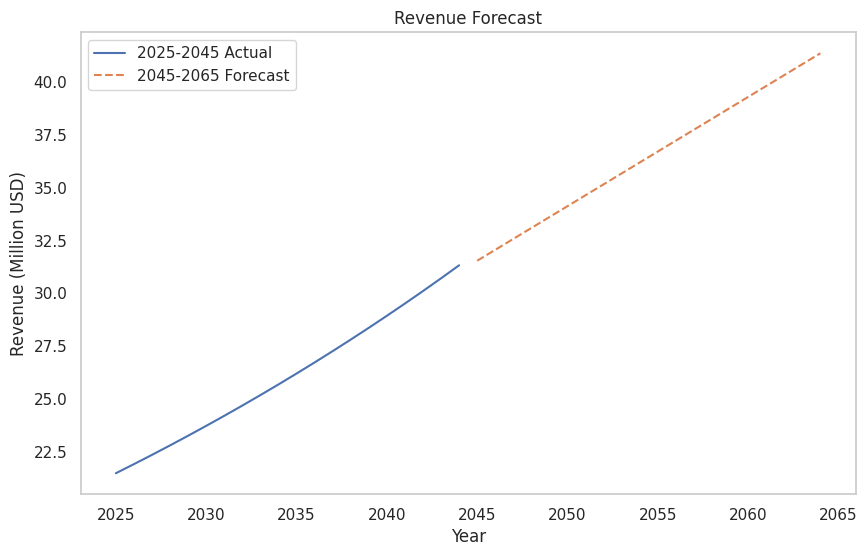

In [53]:
from sklearn.linear_model import LinearRegression

# Example: Forecasting revenue
X = np.array(range(2025, 2045)).reshape(-1, 1)  # Years as input
y = growth_forecast[0]  # Replace with actual revenue data for a cluster
model = LinearRegression()
model.fit(X, y)

# Predict for the next 20 years
future_years = np.array(range(2045, 2065)).reshape(-1, 1)
future_revenue = model.predict(future_years)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(2025, 2045), y, label='2025-2045 Actual')
plt.plot(range(2045, 2065), future_revenue, label='2045-2065 Forecast', linestyle='--')
plt.title("Revenue Forecast")
plt.xlabel("Year")
plt.ylabel("Revenue (Million USD)")
plt.legend()
plt.grid()
plt.show()


In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create Lifecycle Emissions Dataset
clusters = ["A", "B", "C", "D"]
data = {
    "Cluster": clusters,
    "CO2_Captured_Tons": [100000, 120000, 150000, 90000],
    "Operational_Emissions_Tons": [5000, 6000, 7000, 4000],
    "Embodied_Emissions_Tons": [10000, 12000, 14000, 8000],
    "Construction_Emissions_Tons": [8000, 9500, 12000, 7000],
    "Decommissioning_Emissions_Tons": [2000, 2500, 3000, 1500],
    "Investment_Cost_Million": [50, 60, 80, 45],
    "Carbon_Price_USD_Per_Ton": [50, 50, 50, 50],
}

In [55]:
lifecycle_df = pd.DataFrame(data)

In [56]:
# Calculate Net CO2 Removal
lifecycle_df["Net_CO2_Removed_Tons"] = (
    lifecycle_df["CO2_Captured_Tons"]
    - lifecycle_df["Operational_Emissions_Tons"]
    - lifecycle_df["Embodied_Emissions_Tons"]
    - lifecycle_df["Construction_Emissions_Tons"]
    - lifecycle_df["Decommissioning_Emissions_Tons"]
)

In [57]:
# Calculate Revenue from Carbon Credits
lifecycle_df["Carbon_Credit_Revenue_Million"] = (
    lifecycle_df["Net_CO2_Removed_Tons"] * lifecycle_df["Carbon_Price_USD_Per_Ton"] / 1e6
)

In [58]:
# Calculate ROI
lifecycle_df["ROI"] = lifecycle_df["Carbon_Credit_Revenue_Million"] / lifecycle_df["Investment_Cost_Million"]

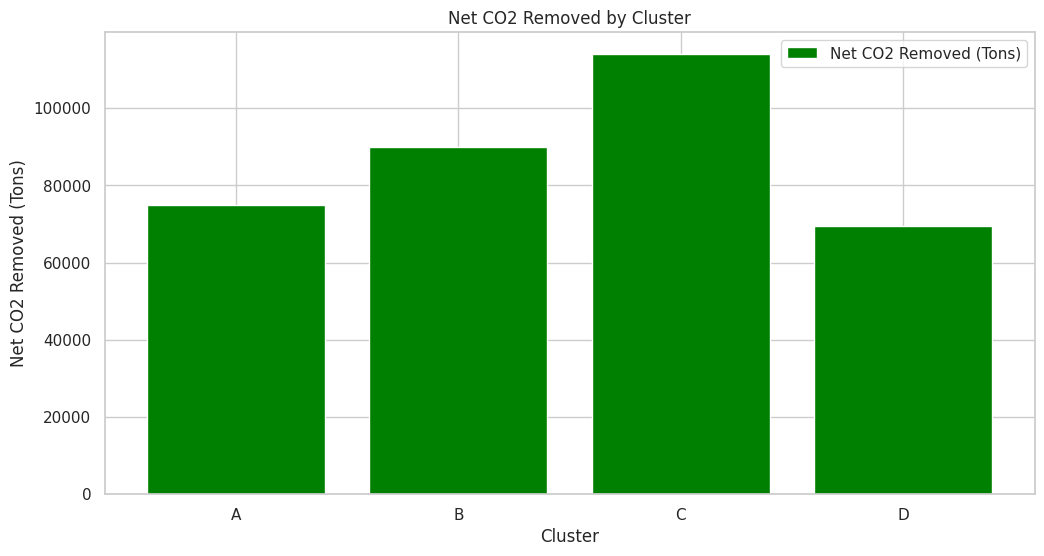

In [59]:
# Step 2: Visualize Lifecycle Emissions and ROI
plt.figure(figsize=(12, 6))
plt.bar(lifecycle_df["Cluster"], lifecycle_df["Net_CO2_Removed_Tons"], color="green", label="Net CO2 Removed (Tons)")
plt.title("Net CO2 Removed by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Net CO2 Removed (Tons)")
plt.legend()
plt.show()

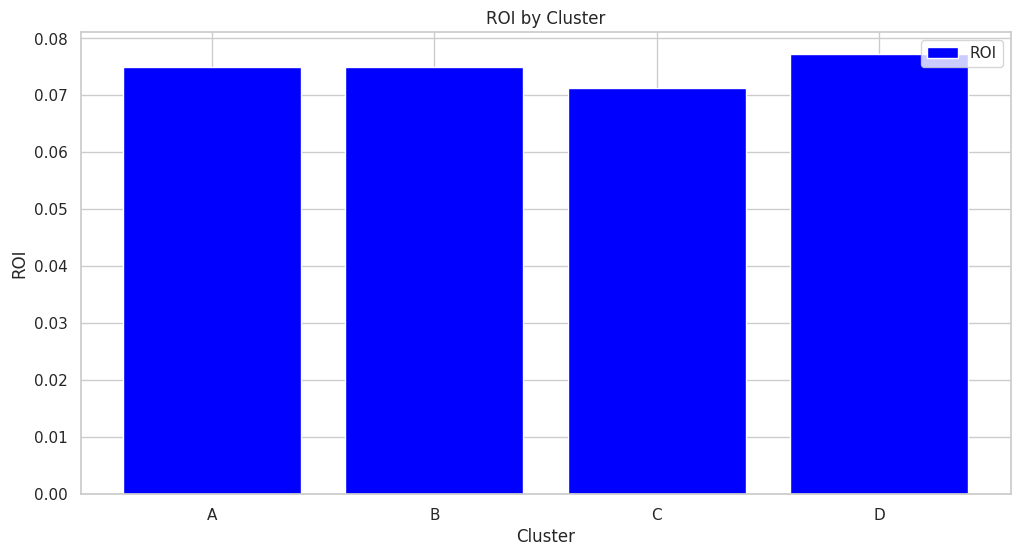

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(lifecycle_df["Cluster"], lifecycle_df["ROI"], color="blue", label="ROI")
plt.title("ROI by Cluster")
plt.xlabel("Cluster")
plt.ylabel("ROI")
plt.legend()
plt.show()

In [61]:
# Step 3: Prepare Stakeholder Report Data
stakeholder_report = lifecycle_df[[
    "Cluster",
    "Net_CO2_Removed_Tons",
    "Carbon_Credit_Revenue_Million",
    "ROI",
    "Investment_Cost_Million",
]]

In [62]:
# Display the Stakeholder Report
def display_stakeholder_report(df):
    print("\n=== Stakeholder Impact Report ===")
    for _, row in df.iterrows():
        print(f"Cluster: {row['Cluster']}")
        print(f"  Net CO2 Removed: {row['Net_CO2_Removed_Tons']} Tons")
        print(f"  Revenue from Carbon Credits: ${row['Carbon_Credit_Revenue_Million']:.2f} Million")
        print(f"  ROI: {row['ROI']:.2f}")
        print(f"  Investment Cost: ${row['Investment_Cost_Million']} Million\n")

display_stakeholder_report(stakeholder_report)


=== Stakeholder Impact Report ===
Cluster: A
  Net CO2 Removed: 75000 Tons
  Revenue from Carbon Credits: $3.75 Million
  ROI: 0.07
  Investment Cost: $50 Million

Cluster: B
  Net CO2 Removed: 90000 Tons
  Revenue from Carbon Credits: $4.50 Million
  ROI: 0.07
  Investment Cost: $60 Million

Cluster: C
  Net CO2 Removed: 114000 Tons
  Revenue from Carbon Credits: $5.70 Million
  ROI: 0.07
  Investment Cost: $80 Million

Cluster: D
  Net CO2 Removed: 69500 Tons
  Revenue from Carbon Credits: $3.48 Million
  ROI: 0.08
  Investment Cost: $45 Million



In [63]:
# Save Report to CSV
stakeholder_report.to_csv("Cirrus_Carbon_Stakeholder_Report.csv", index=False)
print("\nStakeholder report saved as 'Cirrus_Carbon_Stakeholder_Report.csv'")


Stakeholder report saved as 'Cirrus_Carbon_Stakeholder_Report.csv'


Benchmarking Metrics
                       Metric  Cirrus Carbon  Industry Benchmark
0                     ROI (%)             20                18.0
1  Cost per Ton Removed (USD)            300               400.0
2          Scalability Factor              2                 1.5


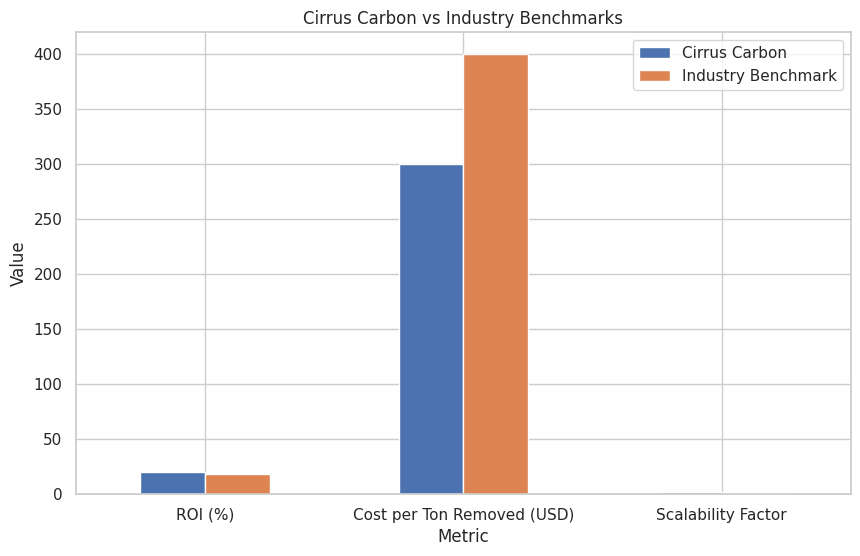

In [64]:
# Define benchmarks from Climeworks and market averages
benchmark_data = {
    "Metric": ["ROI (%)", "Cost per Ton Removed (USD)", "Scalability Factor"],
    "Cirrus Carbon": [20, 300, 2],
    "Industry Benchmark": [18, 400, 1.5]
}

# Create a DataFrame for benchmarking
benchmark_df = pd.DataFrame(benchmark_data)

# Display the benchmarking table
print("Benchmarking Metrics")
print(benchmark_df)

# Visualize comparison as a bar chart
benchmark_df.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Cirrus Carbon vs Industry Benchmarks")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()


Scenario Simulation Results
       Scenario       Revenue      Cost            ROI
0  Conservative  10596.738304  5.310107  212560.833122
1    Optimistic  24725.722710  4.751148  554325.309905
2    Aggressive  35322.461014  4.192189  897479.073180


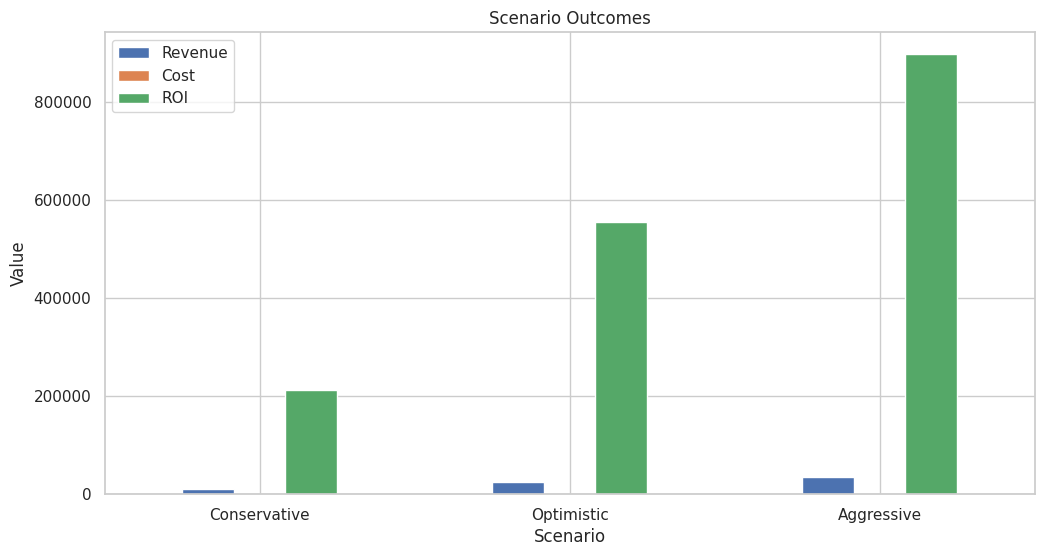

In [65]:
# Define scenarios
scenarios = {
    "Conservative": {"carbon_price": 30, "cost_reduction": 0.05, "scaling_factor": 1.2},
    "Optimistic": {"carbon_price": 70, "cost_reduction": 0.15, "scaling_factor": 1.8},
    "Aggressive": {"carbon_price": 100, "cost_reduction": 0.25, "scaling_factor": 2.5},
}

# Simulate outcomes for each scenario
scenario_results = []
for name, params in scenarios.items():
    revenue = summary_table["CO2_Removed_Tons"] * params["carbon_price"]
    cost = summary_table["Optimized_Investment"] * (1 - params["cost_reduction"])
    roi = revenue / cost
    scenario_results.append({"Scenario": name, "Revenue": revenue.sum(), "Cost": cost.sum(), "ROI": roi.mean()})

# Create a DataFrame for results
scenario_df = pd.DataFrame(scenario_results)

# Display scenario results
print("Scenario Simulation Results")
print(scenario_df)

# Plot scenario outcomes
scenario_df.plot(x="Scenario", y=["Revenue", "Cost", "ROI"], kind="bar", figsize=(12, 6))
plt.title("Scenario Outcomes")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()


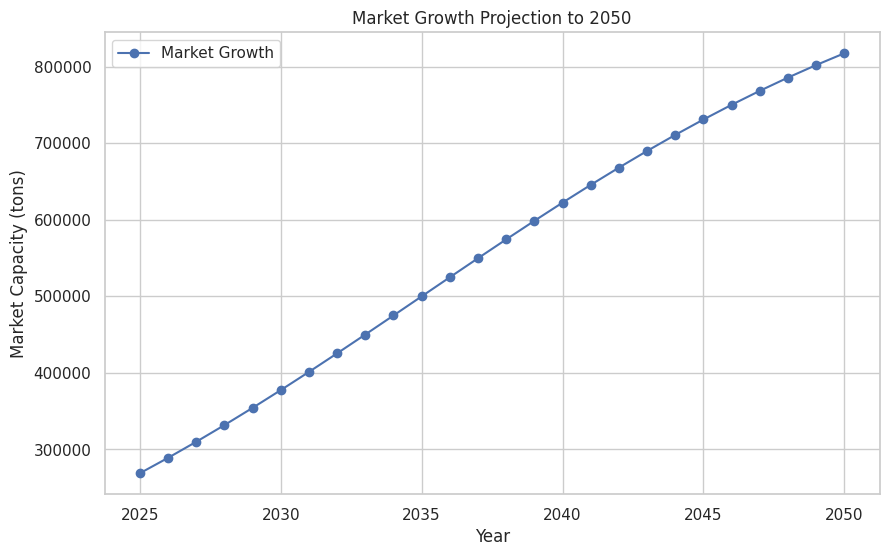

In [66]:
# Logistic growth function for market scaling
def logistic_growth(year, capacity, growth_rate, midpoint):
    return capacity / (1 + np.exp(-growth_rate * (year - midpoint)))

# Generate projections to 2050
years = np.arange(2025, 2051)
capacity = 1000000  # Maximum market capacity
growth_rate = 0.1
midpoint = 2035

market_projection = logistic_growth(years, capacity, growth_rate, midpoint)

# Plot the projection
plt.figure(figsize=(10, 6))
plt.plot(years, market_projection, marker="o", label="Market Growth")
plt.title("Market Growth Projection to 2050")
plt.xlabel("Year")
plt.ylabel("Market Capacity (tons)")
plt.legend()
plt.show()


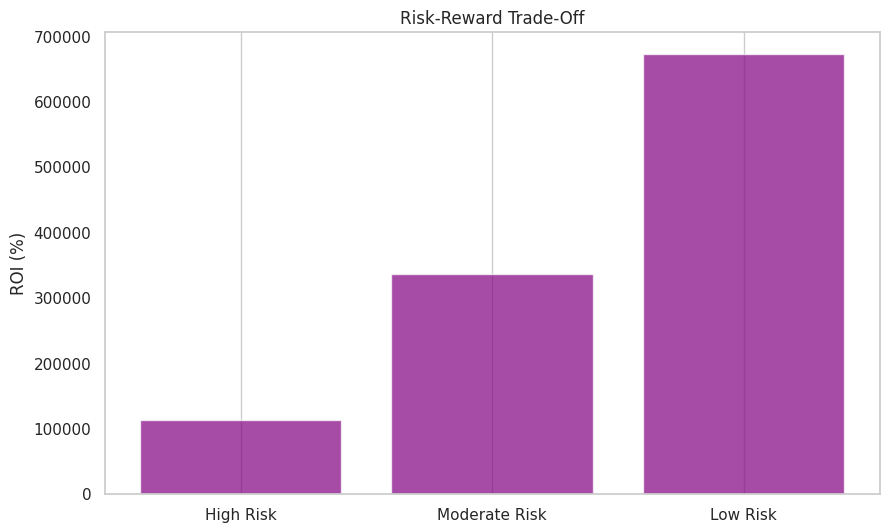

In [67]:
# Define risk scenarios
risk_scenarios = {
    "High Risk": {"carbon_price": 20, "investment_multiplier": 1.2},
    "Moderate Risk": {"carbon_price": 50, "investment_multiplier": 1.0},
    "Low Risk": {"carbon_price": 80, "investment_multiplier": 0.8},
}

# Simulate outcomes for each scenario
risk_results = []
for name, params in risk_scenarios.items():
    revenue = summary_table["CO2_Removed_Tons"] * params["carbon_price"]
    investment_cost = summary_table["Optimized_Investment"] * params["investment_multiplier"]
    roi = revenue / investment_cost
    risk_results.append({"Scenario": name, "Revenue": revenue.sum(), "Investment Cost": investment_cost.sum(), "ROI": roi.mean()})

# Create a DataFrame
risk_df = pd.DataFrame(risk_results)

# Visualize Risk-Reward Trade-Off
plt.figure(figsize=(10, 6))
plt.bar(risk_df["Scenario"], risk_df["ROI"], color="purple", alpha=0.7, label="ROI")
plt.title("Risk-Reward Trade-Off")
plt.ylabel("ROI (%)")
plt.grid(axis="y")
plt.show()


In [68]:
import plotly.express as px

# Hypothetical coordinates for clusters
cluster_locations = {
    "Cluster": ["A", "B", "C", "D"],
    "Latitude": [-6.2, -7.8, -8.4, -7.2],
    "Longitude": [106.8, 110.4, 115.2, 107.6],
    "CO2_Removed_Tons": summary_table["CO2_Removed_Tons"]
}

location_df = pd.DataFrame(cluster_locations)

# Create a geospatial map
fig = px.scatter_geo(
    location_df,
    lat="Latitude",
    lon="Longitude",
    size="CO2_Removed_Tons",
    hover_name="Cluster",
    title="Geospatial Distribution of CO2 Removal Potential",
    projection="natural earth"
)
fig.show()


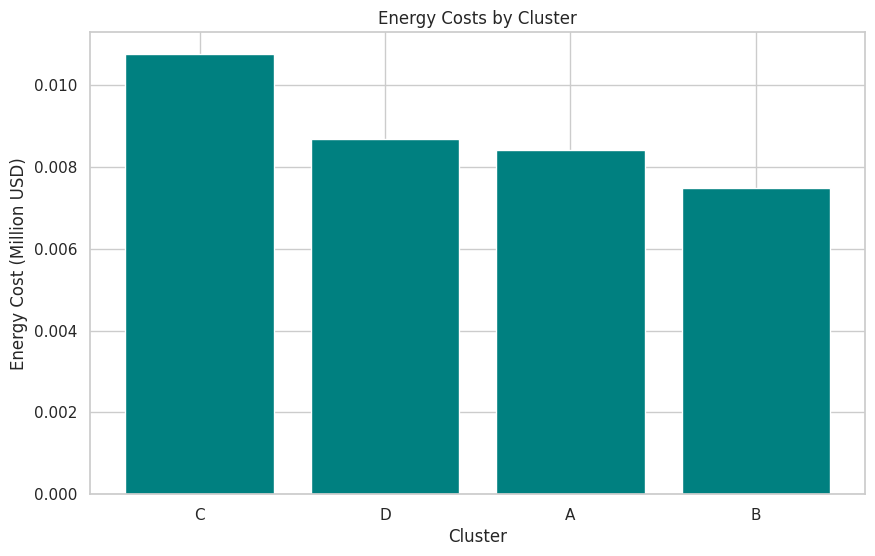

In [69]:
# Define energy requirements per ton of CO2 captured (kWh/ton)
energy_per_ton = 2000  # Example: 2000 kWh per ton

# Calculate energy consumption for each cluster
summary_table['Energy_Consumption_MWh'] = (summary_table['CO2_Removed_Tons'] * energy_per_ton) / 1000

# Add cost of energy
energy_cost_per_mwh = 50  # Example: $50/MWh
summary_table['Energy_Cost_Million'] = summary_table['Energy_Consumption_MWh'] * energy_cost_per_mwh / 1e6

# Visualize Energy Costs
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Energy_Cost_Million'], color='teal')
plt.title("Energy Costs by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Energy Cost (Million USD)")
plt.show()


The Climeworks methodology highlights energy use as a critical factor for DAC projects. Let’s model and visualize energy consumption for CO2 capture in relation to the economic impact.

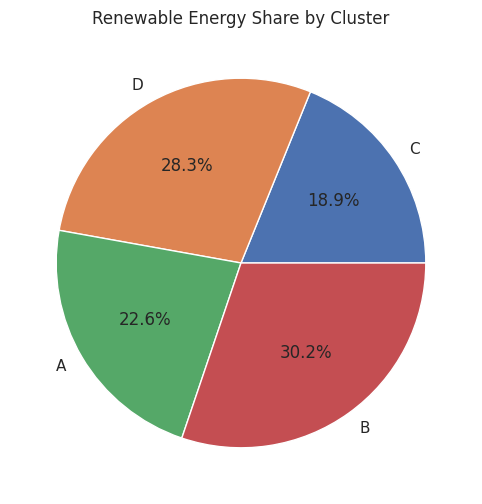

In [70]:
# Renewable energy share for each cluster (Example Data)
summary_table['Renewable_Share_%'] = [50, 75, 60, 80]  # Percentage of energy from renewables

# Calculate renewable energy usage (MWh)
summary_table['Renewable_Energy_MWh'] = summary_table['Energy_Consumption_MWh'] * (summary_table['Renewable_Share_%'] / 100)

# Visualize Renewable Share
plt.figure(figsize=(10, 6))
plt.pie(summary_table['Renewable_Share_%'], labels=summary_table['Cluster'], autopct='%1.1f%%')
plt.title("Renewable Energy Share by Cluster")
plt.show()


Direct Air Capture (DAC) facilities often prioritize renewable energy to enhance environmental benefits. 

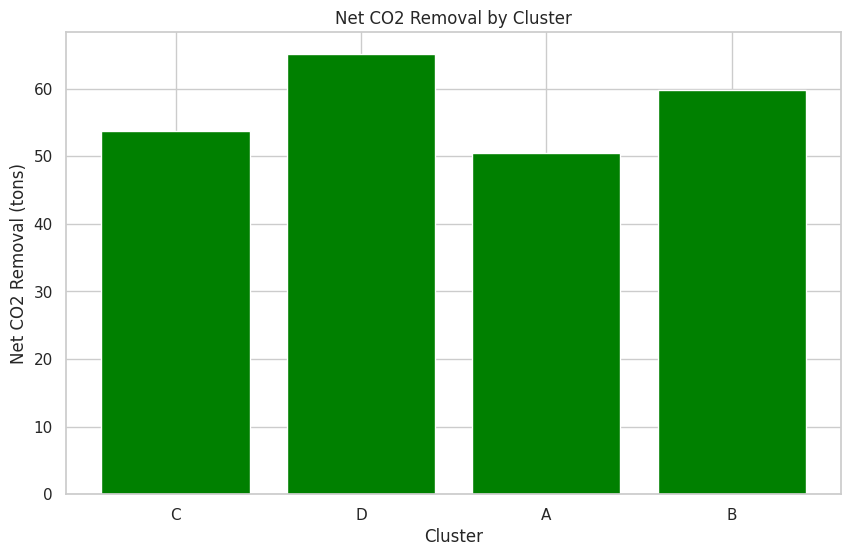

In [71]:
# Carbon emissions per MWh of non-renewable energy (tons CO2/MWh)
carbon_emission_rate = 0.5  # Example: 0.5 tons CO2 per MWh

# Calculate lifecycle emissions
summary_table['Lifecycle_Emissions_Tons'] = (summary_table['Energy_Consumption_MWh'] - summary_table['Renewable_Energy_MWh']) * carbon_emission_rate

# Calculate net CO2 removal
summary_table['Net_CO2_Removal_Tons'] = summary_table['CO2_Removed_Tons'] - summary_table['Lifecycle_Emissions_Tons']

# Visualize Net CO2 Removal
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Net_CO2_Removal_Tons'], color='green')
plt.title("Net CO2 Removal by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Net CO2 Removal (tons)")
plt.show()


The Climeworks report discusses a lifecycle analysis of CO2 capture, accounting for emissions during energy production and operational activities. 

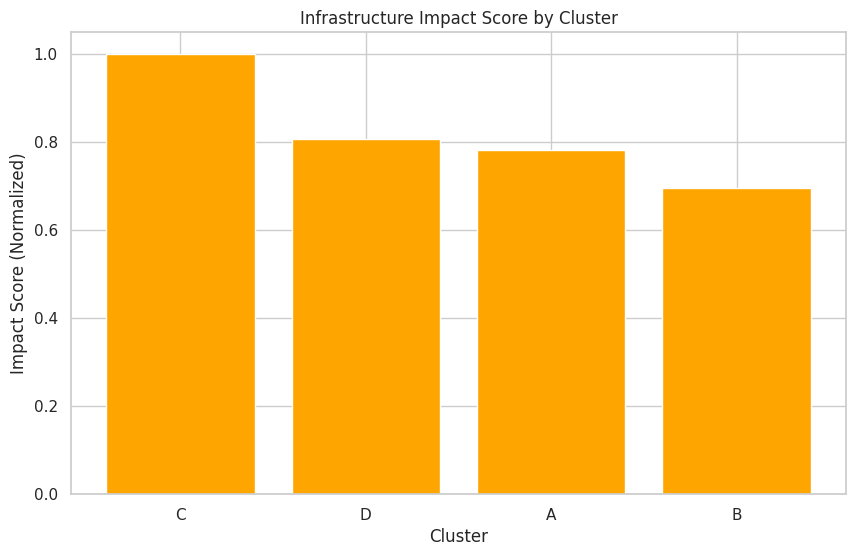

In [72]:
# Example: Infrastructure impact is proportional to energy consumption and CO2 captured
summary_table['Infrastructure_Impact_Score'] = (
    0.7 * summary_table['Energy_Consumption_MWh'] +
    0.3 * summary_table['CO2_Removed_Tons']
)

# Normalize scores for comparison
summary_table['Infrastructure_Impact_Score'] /= summary_table['Infrastructure_Impact_Score'].max()

# Visualize Infrastructure Impact
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Cluster'], summary_table['Infrastructure_Impact_Score'], color='orange')
plt.title("Infrastructure Impact Score by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Impact Score (Normalized)")
plt.show()


The Climeworks document emphasizes infrastructure requirements and scalability potential.

In [73]:
import plotly.express as px

# Interactive Scatter Plot for Energy Costs vs. CO2 Removal
fig = px.scatter(
    summary_table,
    x="Energy_Cost_Million",
    y="Net_CO2_Removal_Tons",
    color="Cluster",
    size="Net_CO2_Removal_Tons",
    hover_data=["Renewable_Share_%", "Lifecycle_Emissions_Tons"],
    title="Energy Costs vs. Net CO2 Removal",
    labels={"Energy_Cost_Million": "Energy Cost (Million USD)", "Net_CO2_Removal_Tons": "Net CO2 Removal (Tons)"}
)
fig.show()


In [74]:
# Interactive Bar Chart for Infrastructure Impact
fig = px.bar(
    summary_table,
    x="Cluster",
    y="Infrastructure_Impact_Score",
    color="Cluster",
    hover_data=["Energy_Consumption_MWh", "CO2_Removed_Tons"],
    title="Infrastructure Impact by Cluster",
    labels={"Infrastructure_Impact_Score": "Impact Score (Normalized)"}
)
fig.show()


In [75]:
# Sensitivity Analysis for ROI vs. Carbon Price
carbon_prices = [30, 50, 70, 100, 150, 200]
roi_sensitivity = []

for price in carbon_prices:
    revenue = summary_table['Max_Revenue'] * price / 100
    roi = revenue / summary_table['Optimized_Investment']
    roi_sensitivity.append(roi.mean())

# Interactive Line Chart for ROI Sensitivity
fig = px.line(
    x=carbon_prices,
    y=roi_sensitivity,
    title="Sensitivity of ROI to Carbon Price",
    labels={"x": "Carbon Price (USD/ton)", "y": "Average ROI"},
    markers=True
)
fig.show()


In [76]:
# Interactive Data Table
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(summary_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary_table[col] for col in summary_table.columns],
               fill_color='lavender',
               align='left')
)])

fig.update_layout(title="Summary Table for Stakeholders")
fig.show()


In [77]:
import pandas as pd
import numpy as np

# Carbon Credit Price Trends
years = np.arange(2025, 2056)  # 30 years projection
carbon_credit_prices = pd.DataFrame({
    'Year': years,
    'High_Price': np.linspace(100, 150, len(years)),  # Rising trend
    'Medium_Price': np.linspace(50, 75, len(years)),  # Moderate rise
    'Low_Price': np.linspace(20, 40, len(years))  # Conservative estimate
})


In [78]:
# Geospatial Risk Index
regions = ['Region_A', 'Region_B', 'Region_C', 'Region_D']
geospatial_risk = pd.DataFrame({
    'Region': regions,
    'Disaster_Risk': np.random.uniform(0.1, 0.5, len(regions)),
    'Political_Risk': np.random.uniform(0.2, 0.6, len(regions)),
    'Transportation_Cost': np.random.uniform(10, 50, len(regions))  # Cost per ton in USD
})


In [79]:
# Operational Efficiency Trends
efficiency_years = np.arange(2025, 2045)
operational_efficiency = pd.DataFrame({
    'Year': efficiency_years,
    'Efficiency_Gain (%)': np.linspace(0.02, 0.05, len(efficiency_years))  # Annual gain %
})


In [80]:
# CO2 Transportation Costs
distance = np.random.uniform(50, 500, len(regions))  # Distance in km
transportation_costs = pd.DataFrame({
    'Region': regions,
    'Distance (km)': distance,
    'Cost_per_Ton': distance * np.random.uniform(0.1, 0.5, len(regions))  # $ per km
})


In [81]:
# Byproduct Revenue Streams
byproduct_revenue = pd.DataFrame({
    'Region': regions,
    'Byproduct_Revenue (Million USD)': np.random.uniform(10, 50, len(regions))
})


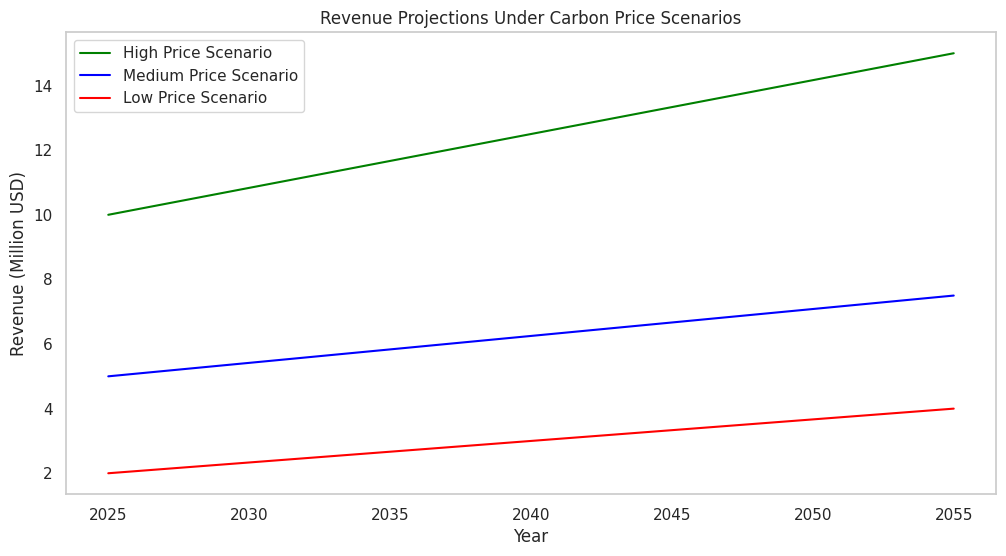

In [82]:
# Simulate revenues under different carbon credit price scenarios
capture_capacity = 100000  # Example: Total annual CO2 capture (tons)
carbon_credit_prices['High_Revenue (Million USD)'] = carbon_credit_prices['High_Price'] * capture_capacity / 1e6
carbon_credit_prices['Medium_Revenue (Million USD)'] = carbon_credit_prices['Medium_Price'] * capture_capacity / 1e6
carbon_credit_prices['Low_Revenue (Million USD)'] = carbon_credit_prices['Low_Price'] * capture_capacity / 1e6

# Plot revenues
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(carbon_credit_prices['Year'], carbon_credit_prices['High_Revenue (Million USD)'], label='High Price Scenario', color='green')
plt.plot(carbon_credit_prices['Year'], carbon_credit_prices['Medium_Revenue (Million USD)'], label='Medium Price Scenario', color='blue')
plt.plot(carbon_credit_prices['Year'], carbon_credit_prices['Low_Revenue (Million USD)'], label='Low Price Scenario', color='red')
plt.title('Revenue Projections Under Carbon Price Scenarios')
plt.xlabel('Year')
plt.ylabel('Revenue (Million USD)')
plt.legend()
plt.grid()
plt.show()


Carbon credit price dynamics

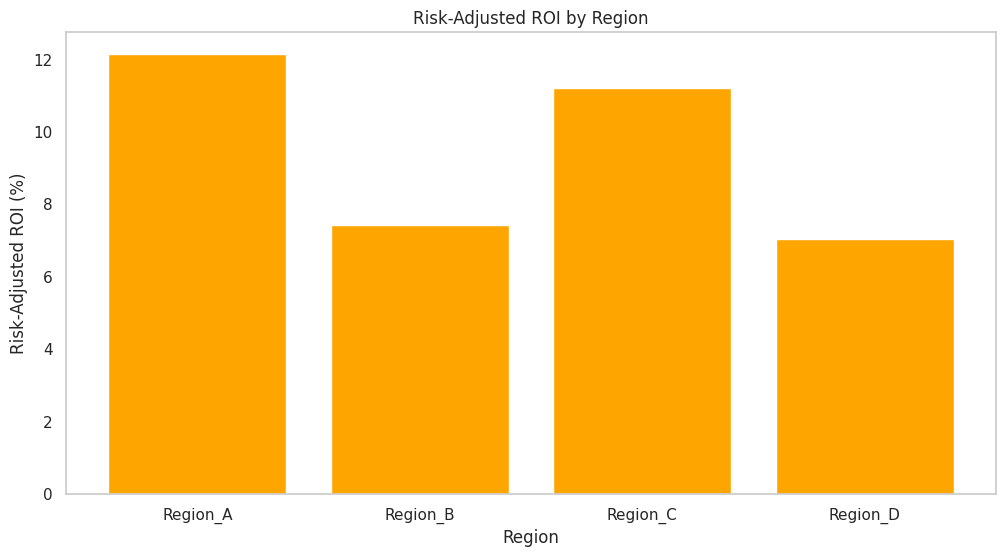

In [83]:
# Example ROI per region (simulate or use real data)
roi_per_region = [15, 12, 18, 10]  # Example ROI (%)
geospatial_risk['ROI (%)'] = roi_per_region

# Adjust ROI by Disaster and Political Risks
geospatial_risk['Risk_Adjusted_ROI (%)'] = geospatial_risk['ROI (%)'] * (1 - (geospatial_risk['Disaster_Risk'] + geospatial_risk['Political_Risk']) / 2)

# Visualize Risk-Adjusted ROI
plt.figure(figsize=(12, 6))
plt.bar(geospatial_risk['Region'], geospatial_risk['Risk_Adjusted_ROI (%)'], color='orange')
plt.title('Risk-Adjusted ROI by Region')
plt.xlabel('Region')
plt.ylabel('Risk-Adjusted ROI (%)')
plt.grid()
plt.show()


Geospatial Risk Adjustments

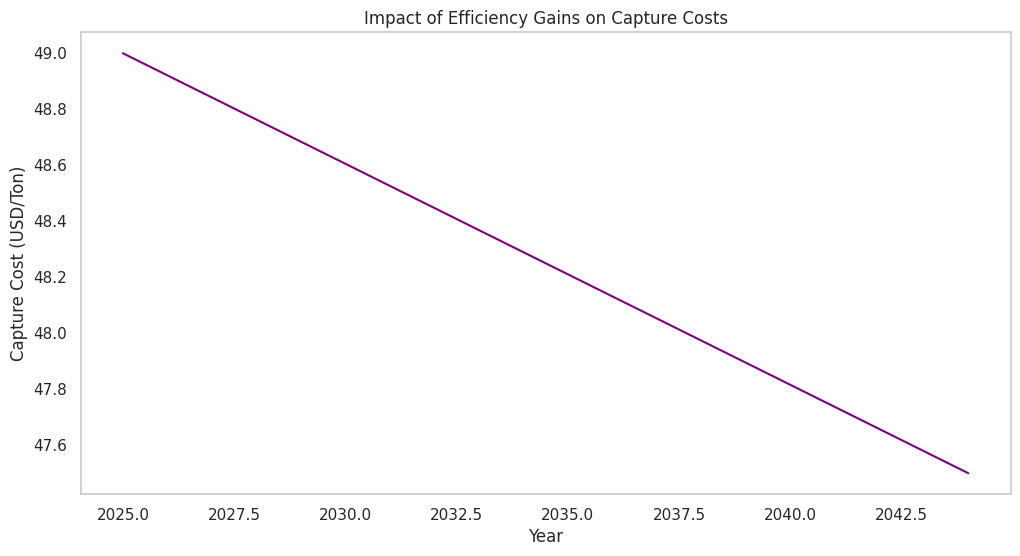

In [84]:
# Example base capture cost (per ton)
base_capture_cost = 50  # USD/ton
operational_efficiency['Capture_Cost (USD/Ton)'] = base_capture_cost * (1 - operational_efficiency['Efficiency_Gain (%)'])

# Plot Efficiency Impact on Capture Costs
plt.figure(figsize=(12, 6))
plt.plot(operational_efficiency['Year'], operational_efficiency['Capture_Cost (USD/Ton)'], label='Capture Cost Reduction', color='purple')
plt.title('Impact of Efficiency Gains on Capture Costs')
plt.xlabel('Year')
plt.ylabel('Capture Cost (USD/Ton)')
plt.grid()
plt.show()


Operational Efficiency Trends

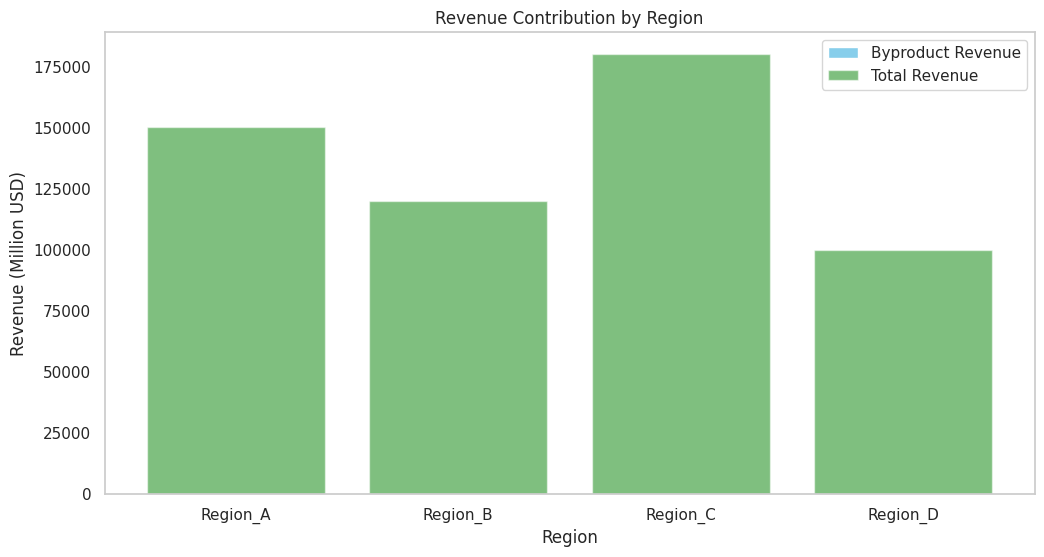

In [85]:
# Combine byproduct revenue with carbon credit revenue
total_revenue = byproduct_revenue.merge(
    geospatial_risk[['Region', 'ROI (%)']],
    on='Region'
)
total_revenue['Total_Revenue (Million USD)'] = total_revenue['Byproduct_Revenue (Million USD)'] + (total_revenue['ROI (%)'] * 1e6 / 100)

# Visualize byproduct contribution
plt.figure(figsize=(12, 6))
plt.bar(total_revenue['Region'], total_revenue['Byproduct_Revenue (Million USD)'], color='skyblue', label='Byproduct Revenue')
plt.bar(total_revenue['Region'], total_revenue['Total_Revenue (Million USD)'], color='green', alpha=0.5, label='Total Revenue')
plt.title('Revenue Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (Million USD)')
plt.legend()
plt.grid()
plt.show()


Byproduct Revenue Contribution

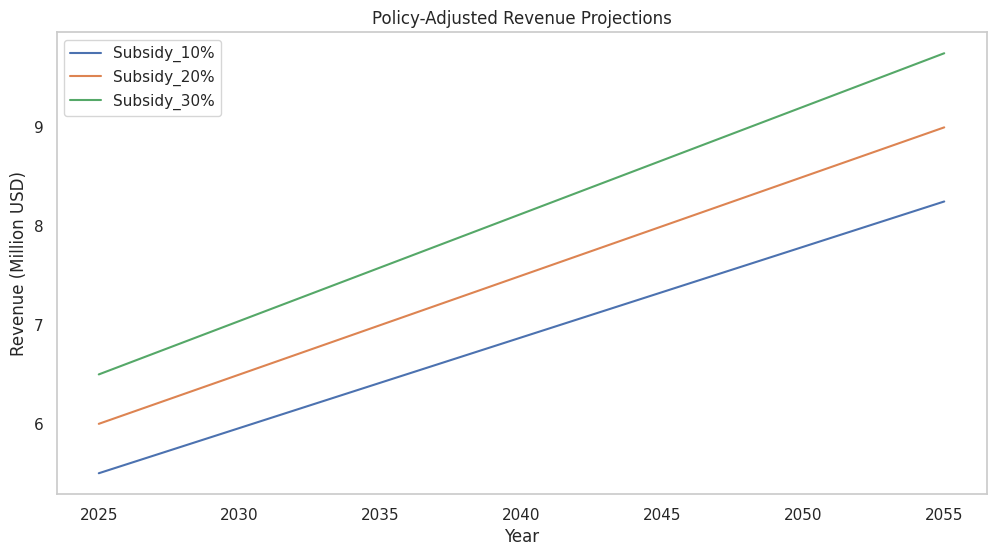

In [86]:
# Define subsidy rates for policy impact
subsidy_rates = [0.1, 0.2, 0.3]  # 10%, 20%, 30%
subsidy_revenue = {}

for rate in subsidy_rates:
    subsidy_revenue[f"Subsidy_{int(rate*100)}%"] = carbon_credit_prices['Medium_Price'] * (1 + rate) * capture_capacity / 1e6

# Add to DataFrame
for key, value in subsidy_revenue.items():
    carbon_credit_prices[key] = value

# Visualize Policy-Adjusted Revenue Projections
plt.figure(figsize=(12, 6))
for key in subsidy_revenue.keys():
    plt.plot(carbon_credit_prices['Year'], carbon_credit_prices[key], label=key)

plt.title('Policy-Adjusted Revenue Projections')
plt.xlabel('Year')
plt.ylabel('Revenue (Million USD)')
plt.legend()
plt.grid()
plt.show()


Advanced Carbon Credit Revenue Projections
Objective: Simulate revenue projections with policy-based subsidies or tax incentives.

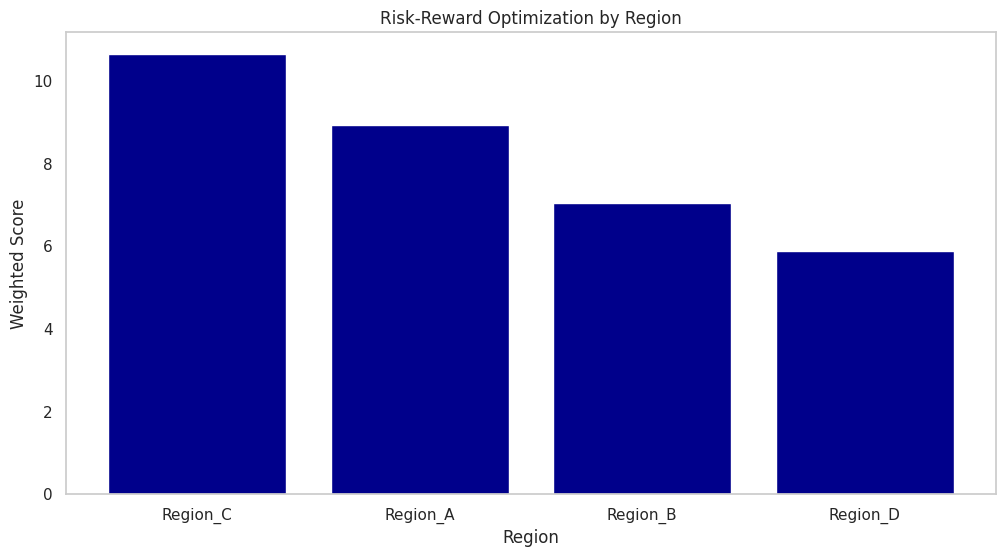

In [87]:
# Define weight factors for optimization
weights = {'ROI': 0.6, 'Disaster_Risk': -0.2, 'Political_Risk': -0.2}

# Calculate weighted score for each region
geospatial_risk['Weighted_Score'] = (
    geospatial_risk['ROI (%)'] * weights['ROI'] +
    geospatial_risk['Disaster_Risk'] * weights['Disaster_Risk'] +
    geospatial_risk['Political_Risk'] * weights['Political_Risk']
)

# Rank regions by score
geospatial_risk = geospatial_risk.sort_values(by='Weighted_Score', ascending=False)

# Visualize Optimization Results
plt.figure(figsize=(12, 6))
plt.bar(geospatial_risk['Region'], geospatial_risk['Weighted_Score'], color='darkblue')
plt.title('Risk-Reward Optimization by Region')
plt.xlabel('Region')
plt.ylabel('Weighted Score')
plt.grid()
plt.show()


Risk-Reward Optimization

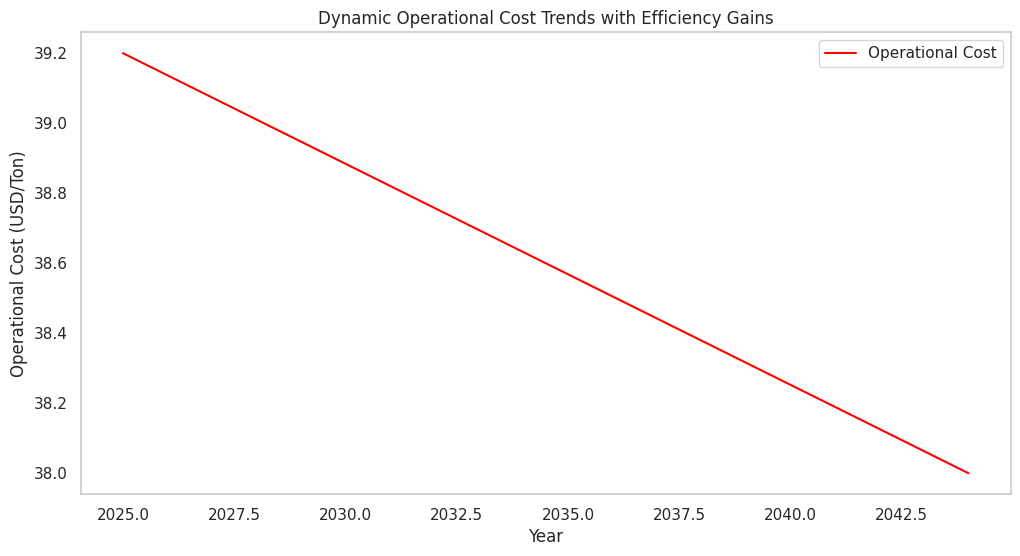

In [88]:
# Base operational cost (USD per ton)
base_operational_cost = 40
operational_efficiency['Operational_Cost (USD/Ton)'] = base_operational_cost * (1 - operational_efficiency['Efficiency_Gain (%)'])

# Plot Dynamic Cost Trends
plt.figure(figsize=(12, 6))
plt.plot(operational_efficiency['Year'], operational_efficiency['Operational_Cost (USD/Ton)'], label='Operational Cost', color='red')
plt.title('Dynamic Operational Cost Trends with Efficiency Gains')
plt.xlabel('Year')
plt.ylabel('Operational Cost (USD/Ton)')
plt.grid()
plt.legend()
plt.show()


Dynamic Operational Costs

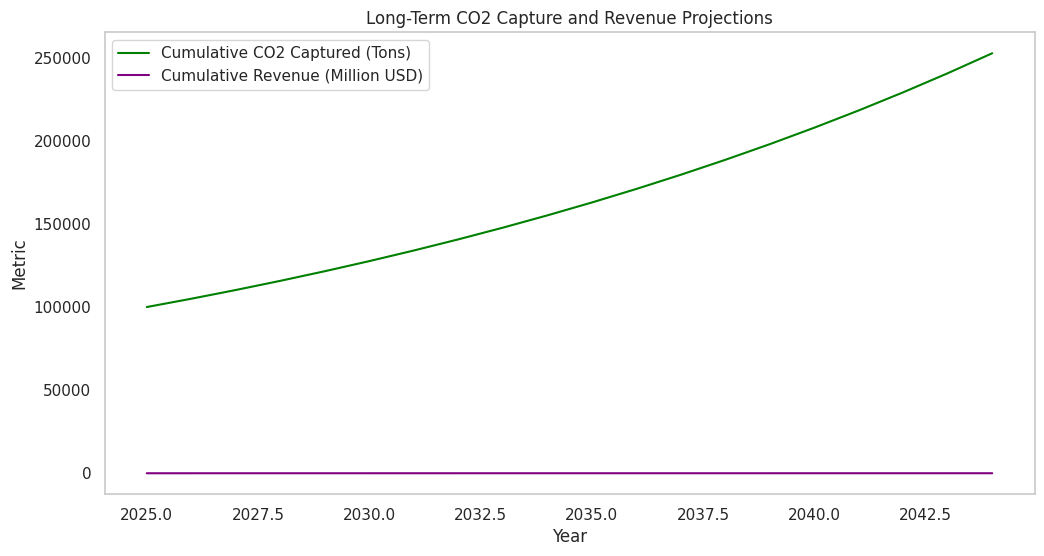

In [89]:
# Base annual CO2 capture capacity (tons/year)
base_annual_capture = 100000
growth_rate = 0.05  # 5% annual growth
years_projection = np.arange(2025, 2045)

# Forecast CO2 captured and revenue
cumulative_capture = [base_annual_capture * (1 + growth_rate)**(year - 2025) for year in years_projection]
cumulative_revenue = [capture * carbon_credit_prices['Medium_Price'].mean() / 1e6 for capture in cumulative_capture]

# Plot Long-Term Projections
plt.figure(figsize=(12, 6))
plt.plot(years_projection, cumulative_capture, label='Cumulative CO2 Captured (Tons)', color='green')
plt.plot(years_projection, cumulative_revenue, label='Cumulative Revenue (Million USD)', color='purple')
plt.title('Long-Term CO2 Capture and Revenue Projections')
plt.xlabel('Year')
plt.ylabel('Metric')
plt.legend()
plt.grid()
plt.show()


Long-Term Projections for Carbon Capture
Objective: Forecast cumulative CO2 removal and associated revenues over 20 years.

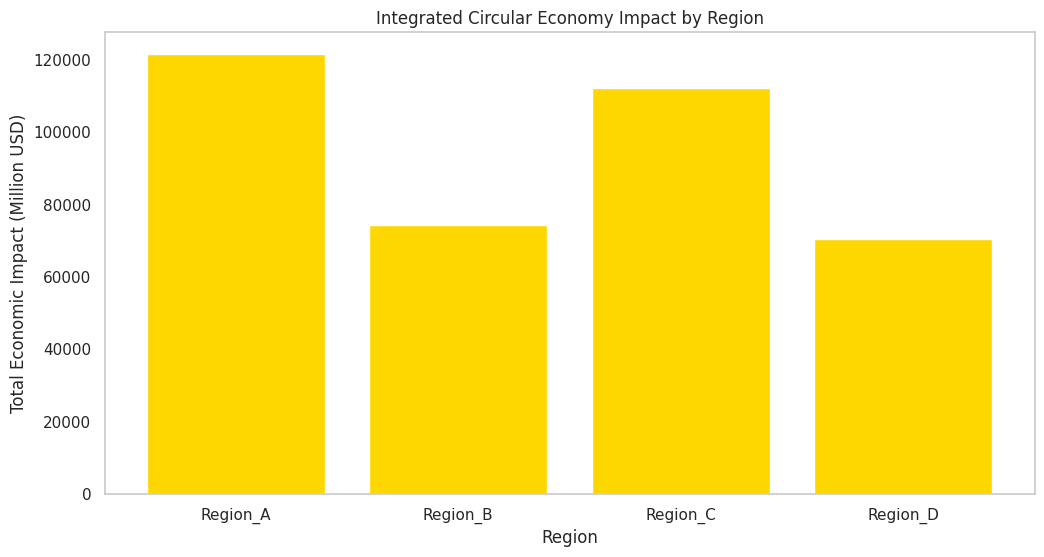

In [90]:
# Combine Byproduct Revenue with Risk-Adjusted ROI
total_impact = byproduct_revenue.merge(
    geospatial_risk[['Region', 'Risk_Adjusted_ROI (%)']],
    on='Region'
)
total_impact['Total_Economic_Impact (Million USD)'] = total_impact['Byproduct_Revenue (Million USD)'] + total_impact['Risk_Adjusted_ROI (%)'] * 1e6 / 100

# Visualize Total Economic Impact
plt.figure(figsize=(12, 6))
plt.bar(total_impact['Region'], total_impact['Total_Economic_Impact (Million USD)'], color='gold')
plt.title('Integrated Circular Economy Impact by Region')
plt.xlabel('Region')
plt.ylabel('Total Economic Impact (Million USD)')
plt.grid()
plt.show()


Integrated Circular Economy Impact
Objective: Analyze the contribution of CO2 byproducts to total revenue and highlight economic co-benefits.

<Axes: title={'center': 'Comparison of DAC Technologies'}, xlabel='Technology'>

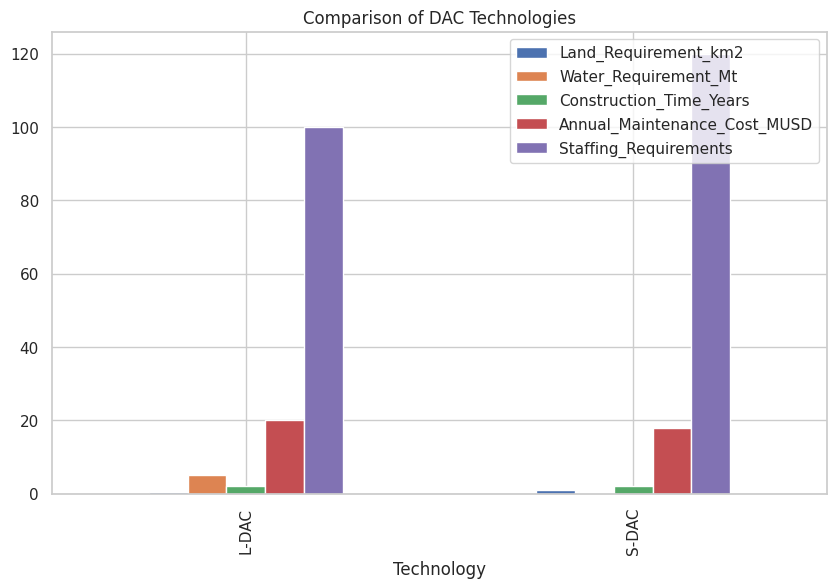

In [91]:
import pandas as pd

# Example: Capture metrics
capture_metrics = pd.DataFrame({
    "Technology": ["L-DAC", "S-DAC"],
    "Land_Requirement_km2": [0.4, 0.9],
    "Water_Requirement_Mt": [5, 0.1],
    "Construction_Time_Years": [2, 2],
    "Annual_Maintenance_Cost_MUSD": [20, 18],
    "Staffing_Requirements": [100, 120]
})

# Visualize
capture_metrics.plot(x="Technology", kind="bar", figsize=(10, 6), title="Comparison of DAC Technologies")


<Axes: title={'center': 'Renewable Energy Potential'}, xlabel='Energy Source'>

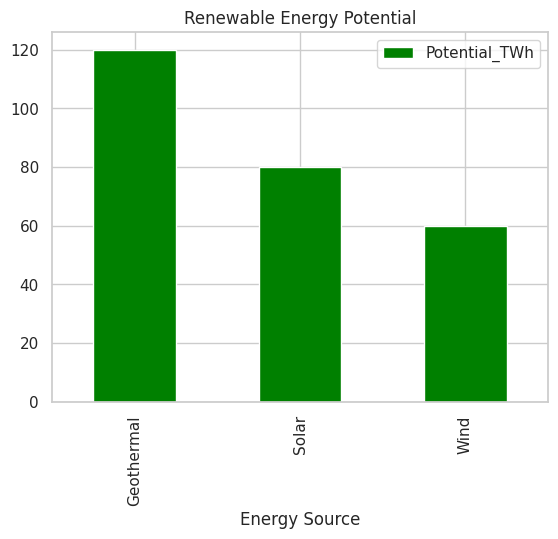

In [92]:
energy_sources = pd.DataFrame({
    "Energy Source": ["Geothermal", "Solar", "Wind"],
    "Potential_TWh": [120, 80, 60],
    "CAPEX_MUSD": [500, 300, 250]
})

# Plotting Energy Potential
energy_sources.plot(x="Energy Source", y="Potential_TWh", kind="bar", color='green', title="Renewable Energy Potential")


<Axes: title={'center': 'Cost Reduction with Policy Support'}, xlabel='Year'>

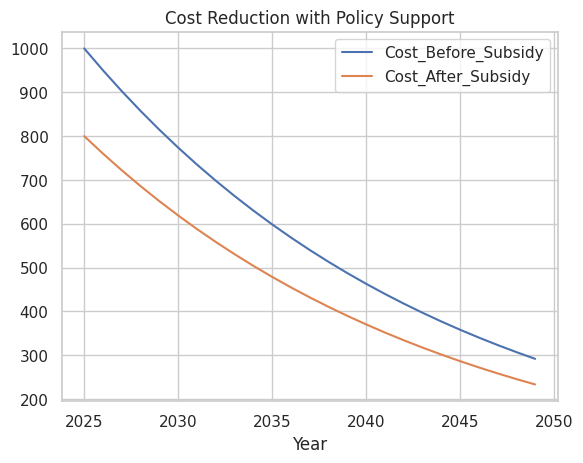

In [93]:
# Simulating Policy Impact on Costs
years = range(2025, 2050)
base_cost = 1000  # USD per ton CO2
efficiency_improvements = [base_cost * (0.95**(year-2025)) for year in years]

policy_subsidy = [0.2 * cost for cost in efficiency_improvements]  # Example 20% subsidy

# DataFrame and Visualization
policy_impact = pd.DataFrame({"Year": years, "Cost_Before_Subsidy": efficiency_improvements, "Cost_After_Subsidy": [x-y for x, y in zip(efficiency_improvements, policy_subsidy)]})
policy_impact.plot(x="Year", title="Cost Reduction with Policy Support")


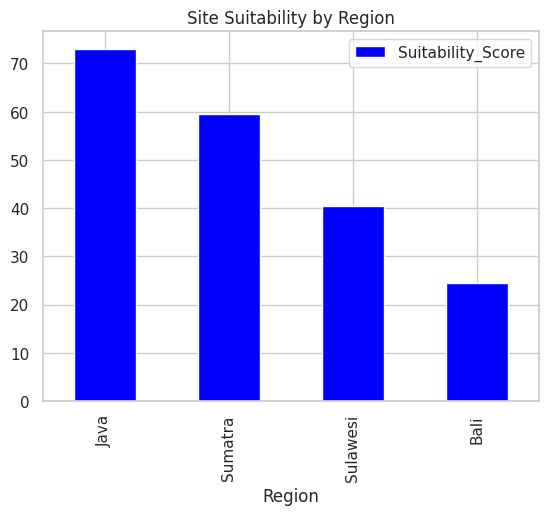

In [94]:
# Example: Regional site suitability analysis
site_data = pd.DataFrame({
    "Region": ["Java", "Sumatra", "Sulawesi", "Bali"],
    "Land_Available_km2": [10, 15, 8, 5],
    "Water_Available_Mt": [50, 40, 20, 10],
    "Energy_Potential_TWh": [100, 80, 60, 40],
    "Geological_Storage_Potential_Mt": [200, 150, 100, 50]
})

# Calculate suitability score (arbitrary weights for demonstration)
site_data["Suitability_Score"] = (
    site_data["Land_Available_km2"] * 0.3 +
    site_data["Water_Available_Mt"] * 0.2 +
    site_data["Energy_Potential_TWh"] * 0.4 +
    site_data["Geological_Storage_Potential_Mt"] * 0.1
)

# Sort by suitability
site_data = site_data.sort_values(by="Suitability_Score", ascending=False)

# Visualize suitability scores
site_data.plot(x="Region", y="Suitability_Score", kind="bar", title="Site Suitability by Region", color="blue")
plt.show()


Advanced Site Suitability Analysis
Goal: Identify optimal locations for DAC plants considering land, water, energy, and storage requirements.

In [95]:
# Multi-Technology Deployment
deployment_data = pd.DataFrame({
    "Region": ["Java", "Sumatra", "Sulawesi", "Bali"],
    "L-DAC_Plants": [3, 2, 1, 1],
    "S-DAC_Plants": [1, 2, 3, 0],
    "Annual_CO2_Capture_Mt": [1.2, 1.4, 1.6, 0.5]  # Total CO2 capture
})

# Calculate Total Land and Water Requirements
deployment_data["Total_Land_Requirement_km2"] = deployment_data["L-DAC_Plants"] * 0.4 + deployment_data["S-DAC_Plants"] * 0.9
deployment_data["Total_Water_Requirement_Mt"] = deployment_data["L-DAC_Plants"] * 5 + deployment_data["S-DAC_Plants"] * 0.1

print(deployment_data)


     Region  L-DAC_Plants  S-DAC_Plants  Annual_CO2_Capture_Mt  \
0      Java             3             1                    1.2   
1   Sumatra             2             2                    1.4   
2  Sulawesi             1             3                    1.6   
3      Bali             1             0                    0.5   

   Total_Land_Requirement_km2  Total_Water_Requirement_Mt  
0                         2.1                        15.1  
1                         2.6                        10.2  
2                         3.1                         5.3  
3                         0.4                         5.0  


Multi-Technology Deployment Strategy
Goal: Optimize the use of L-DAC and S-DAC in different regions based on resource availability and operational requirements.

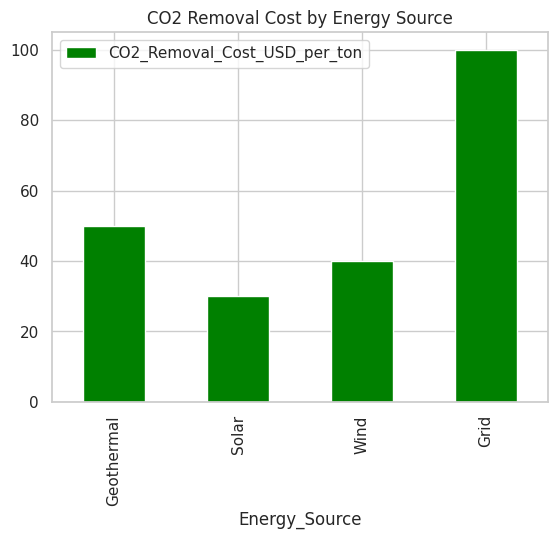

In [96]:
# Renewable energy scenarios
energy_scenarios = pd.DataFrame({
    "Energy_Source": ["Geothermal", "Solar", "Wind", "Grid"],
    "Emissions_tCO2_per_MWh": [0.02, 0.0, 0.0, 0.5],
    "Cost_USD_per_MWh": [50, 30, 40, 100]
})

# Simulate CO2 removal cost under energy scenarios
capture_energy = 1  # MWh/ton CO2 captured
energy_scenarios["CO2_Removal_Cost_USD_per_ton"] = (
    energy_scenarios["Cost_USD_per_MWh"] * capture_energy
)

# Visualize cost comparison
energy_scenarios.plot(x="Energy_Source", y="CO2_Removal_Cost_USD_per_ton", kind="bar", color="green", title="CO2 Removal Cost by Energy Source")
plt.show()


Dynamic Cost-Energy Modeling
Goal: Evaluate DAC performance under renewable energy constraints (e.g., geothermal, wind, solar).

Insights to Integrate:
Geothermal Integration: High-capacity renewable source near Java and Sumatra.
Energy Intermittency: Solar and wind require backup or storage solutions.

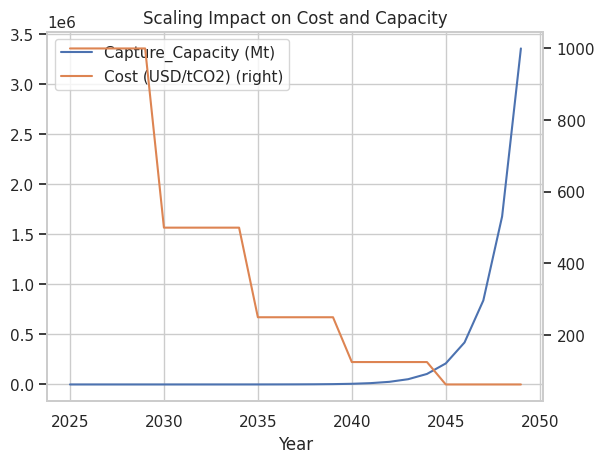

In [97]:
# Scale-based cost reduction
base_cost = 1000  # USD per ton CO2
scaling_years = range(2025, 2050)
capture_capacity_scale = [1 * (2**(year - 2025) // 5) for year in scaling_years]  # Doubling every 5 years
cost_reduction = [base_cost / (2**((year - 2025) // 5)) for year in scaling_years]

scaling_data = pd.DataFrame({"Year": scaling_years, "Capture_Capacity (Mt)": capture_capacity_scale, "Cost (USD/tCO2)": cost_reduction})

# Visualize scaling impact
scaling_data.plot(x="Year", y=["Capture_Capacity (Mt)", "Cost (USD/tCO2)"], secondary_y="Cost (USD/tCO2)", title="Scaling Impact on Cost and Capacity")
plt.show()


Scalability Impact
Goal: Simulate economies of scale for DAC deployment across multiple regions over 30 years.

Insights:
Costs reduce with deployment scale (e.g., -10% CAPEX for every doubling of capacity).

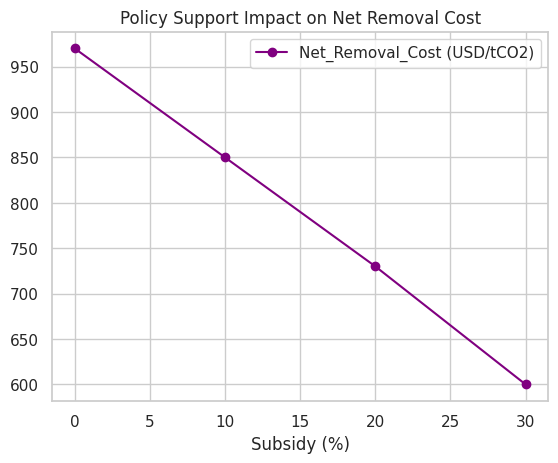

In [98]:
# Policy scenarios
policy_support = pd.DataFrame({
    "Subsidy (%)": [0, 10, 20, 30],
    "Carbon_Price_USD_per_ton": [30, 50, 70, 100]
})
policy_support["Net_Removal_Cost (USD/tCO2)"] = base_cost * (1 - policy_support["Subsidy (%)"] / 100) - policy_support["Carbon_Price_USD_per_ton"]

# Visualize policy impact
policy_support.plot(x="Subsidy (%)", y="Net_Removal_Cost (USD/tCO2)", kind="line", marker="o", title="Policy Support Impact on Net Removal Cost", color="purple")
plt.show()


Policy Support Simulation
Goal: Assess the impact of subsidies, tax credits, and carbon pricing on financial outcomes.

Mean Absolute Error: 10.88


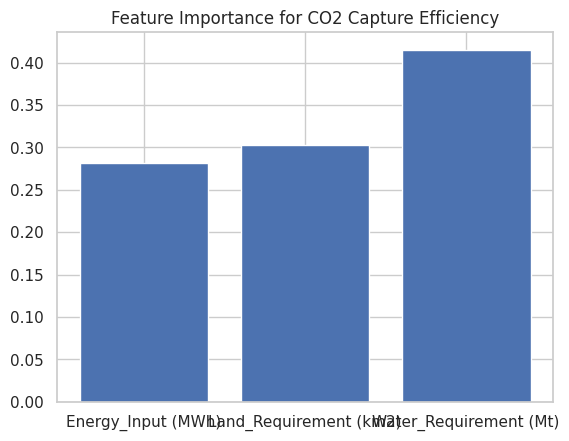

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Simulated dataset
import pandas as pd
import numpy as np
data = pd.DataFrame({
    "Energy_Input (MWh)": np.random.uniform(500, 1000, 100),
    "Land_Requirement (km2)": np.random.uniform(0.5, 2.0, 100),
    "Water_Requirement (Mt)": np.random.uniform(0.1, 5.0, 100),
    "CO2_Capture_Efficiency (%)": np.random.uniform(60, 95, 100)
})

# Features and target
X = data[["Energy_Input (MWh)", "Land_Requirement (km2)", "Water_Requirement (Mt)"]]
y = data["CO2_Capture_Efficiency (%)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

# Feature importance
import matplotlib.pyplot as plt
importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.title("Feature Importance for CO2 Capture Efficiency")
plt.show()


Predictive Modeling for CO₂ Capture Efficiency
Objective: Predict CO₂ capture efficiency based on energy inputs, site conditions, and technology types.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



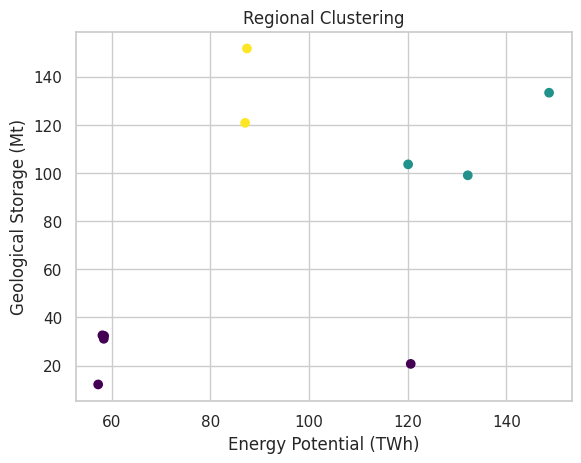

In [100]:
from sklearn.cluster import KMeans

# Simulated regional dataset
regions_data = pd.DataFrame({
    "Energy_Potential (TWh)": np.random.uniform(50, 150, 10),
    "Disaster_Risk (%)": np.random.uniform(5, 30, 10),
    "Geological_Storage (Mt)": np.random.uniform(10, 200, 10)
})

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
regions_data["Cluster"] = kmeans.fit_predict(regions_data)

# Visualize clusters
plt.scatter(regions_data["Energy_Potential (TWh)"], regions_data["Geological_Storage (Mt)"], c=regions_data["Cluster"], cmap="viridis")
plt.xlabel("Energy Potential (TWh)")
plt.ylabel("Geological Storage (Mt)")
plt.title("Regional Clustering")
plt.show()


Clustering for Regional Optimization
Objective: Use clustering (e.g., K-Means) to group regions based on similarities in energy availability, risk factors, and storage potential.

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Simulated time-series data
years = np.arange(2025, 2050)
capture = np.random.uniform(100, 200, len(years))  # CO2 captured annually

# Prepare data for LSTM
X = np.array([capture[i:i+3] for i in range(len(capture)-3)])  # 3-year windows
y = capture[3:]

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=200, verbose=0)

# Forecast next 5 years
future_capture = model.predict(X[-1].reshape(1, 3, 1))
print(f"Predicted CO2 Capture for next period: {future_capture[0][0]:.2f} tons")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted CO2 Capture for next period: 195.61 tons


Deep Learning for CO₂ Removal Forecasting
Objective: Use deep learning (e.g., LSTMs) to forecast CO₂ removal and revenue trends over time.

In [102]:
from scipy.optimize import linprog

# Simulated ROI and risks
regions = ["Region_A", "Region_B", "Region_C", "Region_D"]
roi = [20, 15, 18, 12]  # ROI (%)
risks = [0.2, 0.3, 0.1, 0.4]  # Risk levels (0-1)

# Objective: Maximize ROI (negate to minimize in linprog)
objective = [-r for r in roi]

# Constraints: Risk thresholds and total investment budget
risk_threshold = 0.25
budget = 100  # Total budget
A = [risks, [1, 1, 1, 1]]  # Risk and budget constraints
b = [risk_threshold * len(regions), budget]

# Bounds: Investment per region
bounds = [(0, 30) for _ in regions]  # Max $30M per region

# Solve optimization problem
result = linprog(c=objective, A_ub=A, b_ub=b, bounds=bounds, method='highs')
print(f"Optimal Investment Allocation: {result.x}")


Optimal Investment Allocation: [ 0.  0. 10.  0.]


In [103]:
# Financial Planning Parameters
CAPEX = 1000  # Million USD (initial investment)
OPEX = 50  # Million USD/year
carbon_credit_price = 50  # USD/ton
annual_capture = 1_000_000  # Tons of CO2 captured

# Revenue and Cost Calculation
years = np.arange(2025, 2045)
revenue = [annual_capture * carbon_credit_price / 1e6 for _ in years]  # Annual revenue in million USD
total_costs = [CAPEX if year == 2025 else OPEX for year in years]

# NPV Calculation
discount_rate = 0.1  # 10% discount rate
npv = sum([(revenue[i] - total_costs[i]) / (1 + discount_rate)**i for i in range(len(years))])

print(f"Net Present Value (NPV): ${npv:.2f} Million")


Net Present Value (NPV): $-950.00 Million


Financial Planning
Objectives:
* Calculate Capital Expenditure (CAPEX) and Operational Expenditure (OPEX).
* Build a cash flow model for 20 years.
* Simulate different revenue streams (e.g., carbon credits, byproducts).
*  Evaluate project viability using financial metrics like NPV (Net Present Value), IRR (Internal Rate of Return), and payback period.

In [104]:
# Building Parameters
dac_plants = 5  # Number of DAC plants
land_per_plant_km2 = 0.5  # Land requirement per plant
construction_time_years = 2  # Time to build one plant
construction_cost_per_plant = 200  # Million USD

# Calculate Total Land and Construction Costs
total_land_km2 = dac_plants * land_per_plant_km2
total_construction_cost = dac_plants * construction_cost_per_plant
construction_timeline = [2025, 2026]  # Construction years

print(f"Total Land Required: {total_land_km2} km²")
print(f"Total Construction Cost: ${total_construction_cost} Million")


Total Land Required: 2.5 km²
Total Construction Cost: $1000 Million


Building and Architecture Plan
Objectives:
* Calculate land and material requirements for building DAC plants.
* Simulate construction timelines and costs.
* Model spatial layouts for S-DAC and L-DAC technologies.

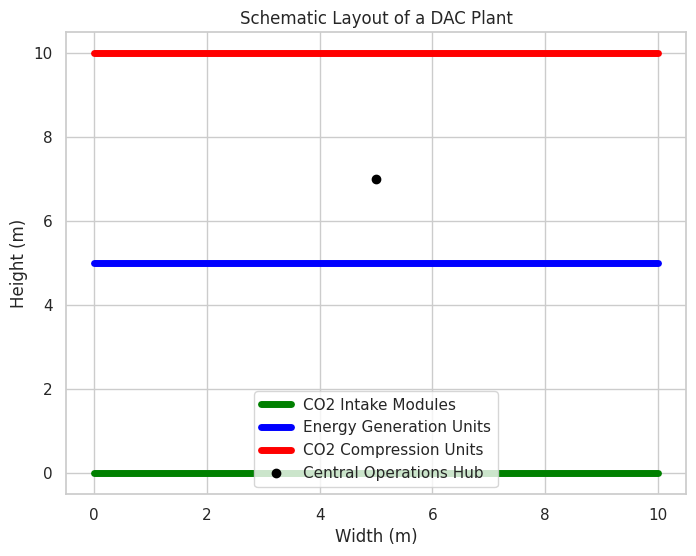

In [105]:
import matplotlib.pyplot as plt

# Conceptual layout for a single DAC plant
plt.figure(figsize=(8, 6))
plt.plot([0, 10], [0, 0], color='green', linewidth=5, label='CO2 Intake Modules')
plt.plot([0, 10], [5, 5], color='blue', linewidth=5, label='Energy Generation Units')
plt.plot([0, 10], [10, 10], color='red', linewidth=5, label='CO2 Compression Units')
plt.scatter([5], [7], color='black', label='Central Operations Hub')
plt.title('Schematic Layout of a DAC Plant')
plt.xlabel('Width (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.show()


Architecture and Technology Structure Plan
Objectives:
* Define structural layouts for S-DAC and L-DAC technologies.
* Include modular and scalable designs.
* Evaluate energy and water integration points.

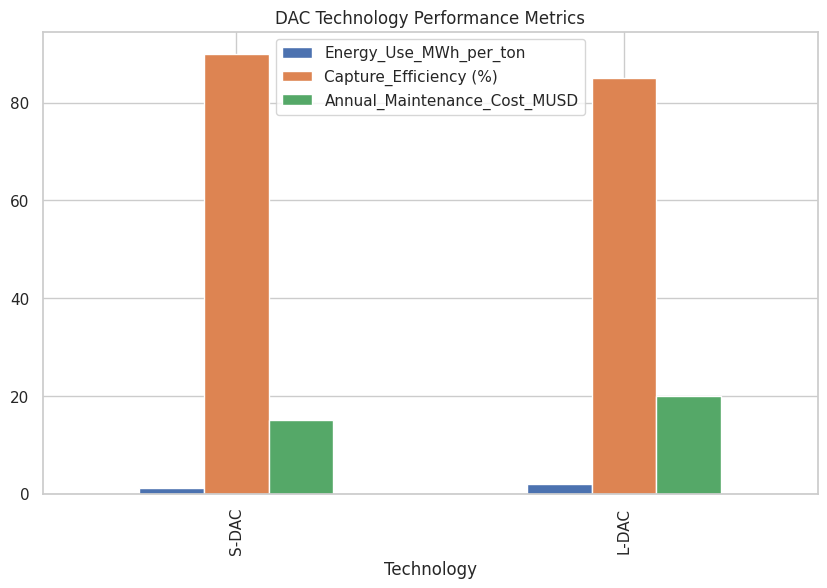

In [106]:
# Technology Performance Metrics
tech_data = pd.DataFrame({
    "Technology": ["S-DAC", "L-DAC"],
    "Energy_Use_MWh_per_ton": [1.2, 2.0],
    "Capture_Efficiency (%)": [90, 85],
    "Annual_Maintenance_Cost_MUSD": [15, 20]
})

# Visualize Performance Metrics
tech_data.plot(x="Technology", kind="bar", figsize=(10, 6), title="DAC Technology Performance Metrics")
plt.show()


Carbon Capture Technology Plan
Objectives:
* Simulate technology performance metrics (e.g., CO₂ capture rate, energy intensity).
* Optimize between S-DAC and L-DAC for regional deployment.

In [107]:
# Integrated Project Plan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Finance - Multi-year Cost and Revenue Projections
years = np.arange(2025, 2045)
annual_capture_tons = 1_000_000  # Annual CO2 capture in tons
carbon_price = 50  # USD per ton

# Financial Metrics
CAPEX = 1000  # Million USD (one-time investment in 2025)
OPEX = 50  # Million USD/year (operational cost)
revenue = annual_capture_tons * carbon_price / 1e6  # Revenue in Million USD/year

# Create financial projection DataFrame
finance_data = pd.DataFrame({
    "Year": years,
    "Revenue_MUSD": [revenue] * len(years),
    "OPEX_MUSD": [OPEX] * len(years),
    "Net_Cashflow_MUSD": [revenue - OPEX] * len(years)
})
finance_data.loc[0, "CAPEX_MUSD"] = CAPEX
finance_data.fillna(0, inplace=True)
finance_data["Net_Cashflow_MUSD"] = finance_data["Net_Cashflow_MUSD"] - finance_data["CAPEX_MUSD"]

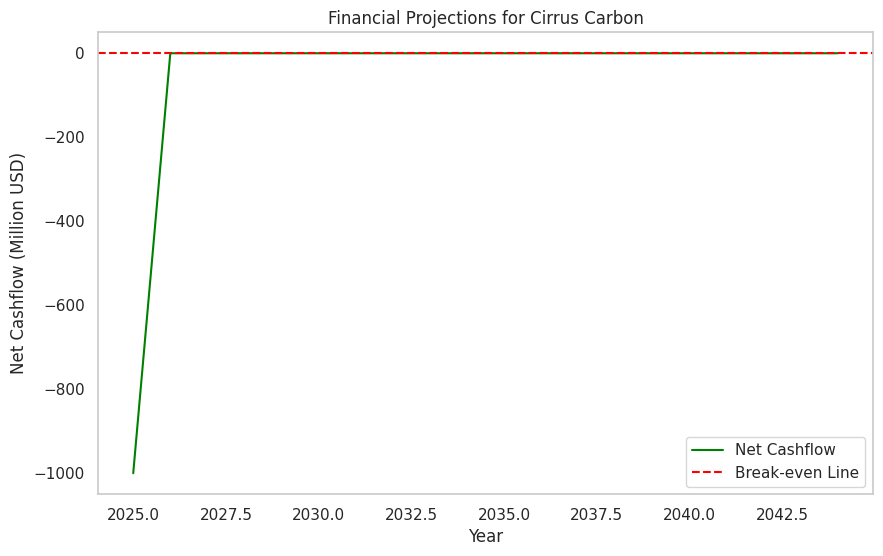

In [108]:
# Plot Financial Projections
plt.figure(figsize=(10, 6))
plt.plot(finance_data["Year"], finance_data["Net_Cashflow_MUSD"], label="Net Cashflow", color="green")
plt.axhline(0, color="red", linestyle="--", label="Break-even Line")
plt.title("Financial Projections for Cirrus Carbon")
plt.xlabel("Year")
plt.ylabel("Net Cashflow (Million USD)")
plt.legend()
plt.grid()
plt.show()

In [109]:
# Step 2: Architecture - Modular Plant Layout Design
# Define modular layout dimensions (Example: S-DAC technology)
modules = {
    "CO2_Intake_Module": [0, 5],
    "Energy_Generation_Unit": [6, 10],
    "CO2_Compression_Unit": [11, 15]
}

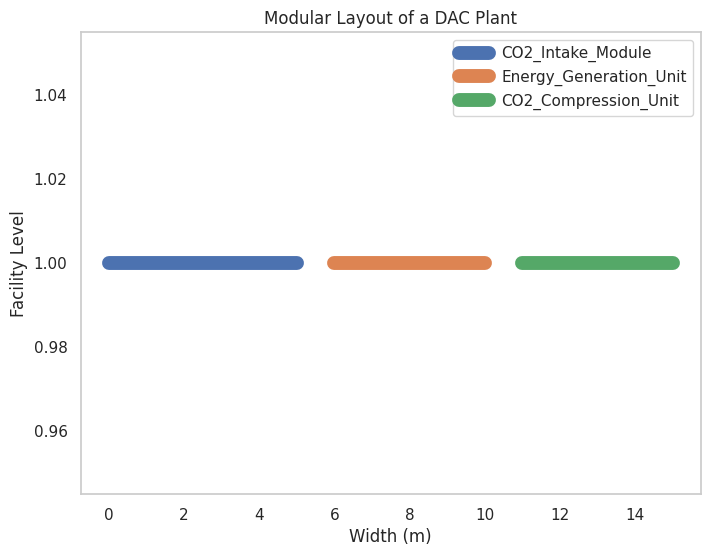

In [110]:
plt.figure(figsize=(8, 6))
for module, position in modules.items():
    plt.plot(position, [1, 1], linewidth=10, label=module)
plt.title("Modular Layout of a DAC Plant")
plt.xlabel("Width (m)")
plt.ylabel("Facility Level")
plt.legend()
plt.grid()
plt.show()

In [111]:
# Step 3: Building - Timeline, CAPEX, Land, and Material Requirements
plants = 5
land_per_plant_km2 = 0.5
material_cost_per_plant = 200  # Million USD
construction_years = [2025, 2026]

total_land_km2 = plants * land_per_plant_km2
total_material_cost = plants * material_cost_per_plant

print(f"Total Land Required: {total_land_km2} km²")
print(f"Total Construction Cost: ${total_material_cost} Million")

Total Land Required: 2.5 km²
Total Construction Cost: $1000 Million


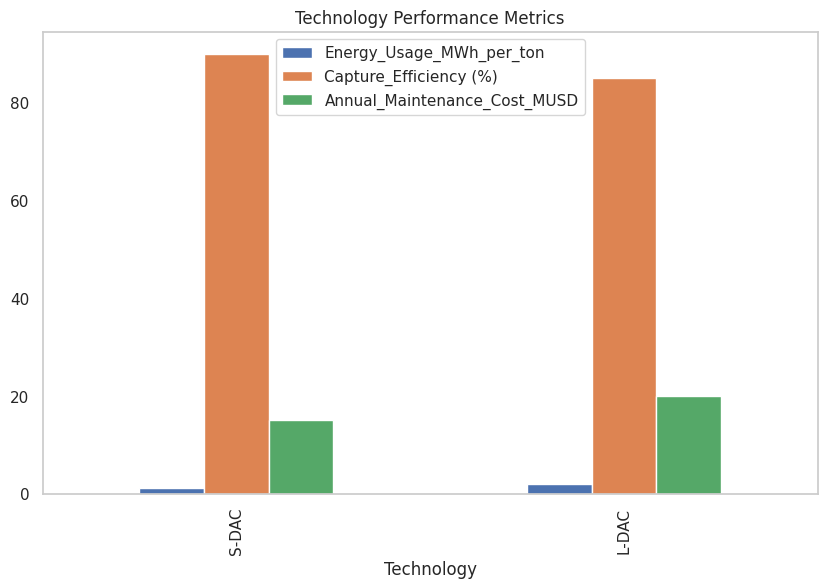

In [112]:
# Step 4: Technology - Performance Metrics
technology_data = pd.DataFrame({
    "Technology": ["S-DAC", "L-DAC"],
    "Energy_Usage_MWh_per_ton": [1.2, 2.0],
    "Capture_Efficiency (%)": [90, 85],
    "Annual_Maintenance_Cost_MUSD": [15, 20]
})

technology_data.plot(x="Technology", kind="bar", figsize=(10, 6), title="Technology Performance Metrics")
plt.grid()
plt.show()

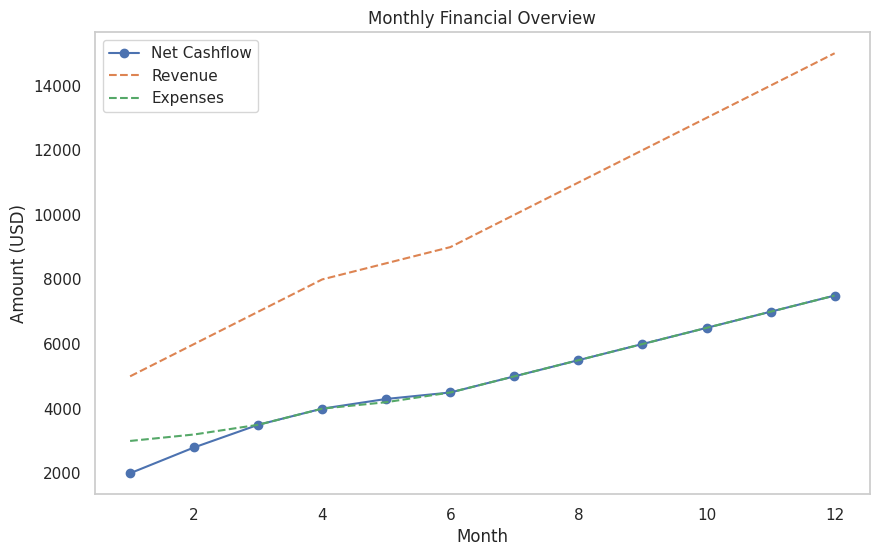

In [113]:
# Simulated financial data
import pandas as pd
import matplotlib.pyplot as plt

# Creating a mock financial dataset
months = list(range(1, 13))  # 12 months
revenue = [5000, 6000, 7000, 8000, 8500, 9000, 10000, 11000, 12000, 13000, 14000, 15000]  # USD
expenses = [3000, 3200, 3500, 4000, 4200, 4500, 5000, 5500, 6000, 6500, 7000, 7500]  # USD

financial_data = pd.DataFrame({
    'Month': months,
    'Revenue': revenue,
    'Expenses': expenses
})
financial_data['Net_Cashflow'] = financial_data['Revenue'] - financial_data['Expenses']

# Plotting cash flow
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Month'], financial_data['Net_Cashflow'], marker='o', label='Net Cashflow')
plt.plot(financial_data['Month'], financial_data['Revenue'], linestyle='--', label='Revenue')
plt.plot(financial_data['Month'], financial_data['Expenses'], linestyle='--', label='Expenses')
plt.title("Monthly Financial Overview")
plt.xlabel("Month")
plt.ylabel("Amount (USD)")
plt.legend()
plt.grid()
plt.show()


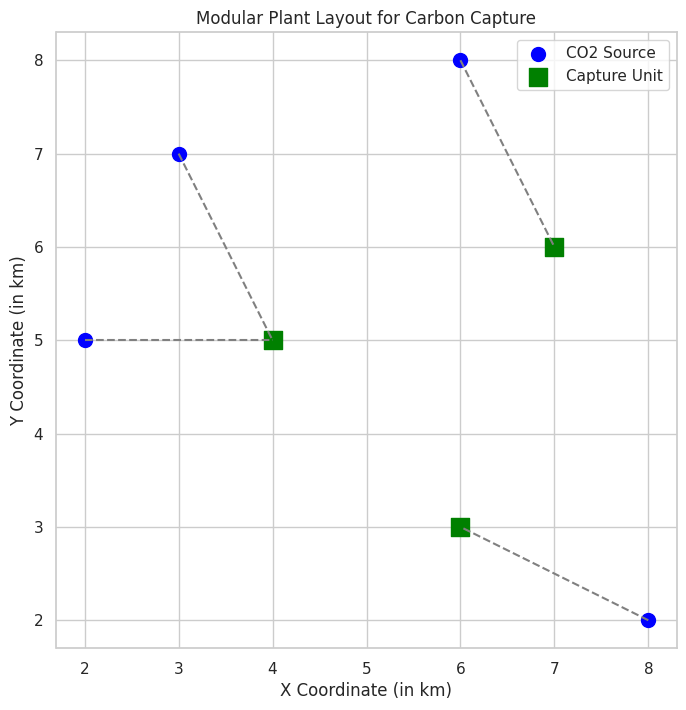

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Define positions for CO2 sources and capture units
co2_sources = [(2, 5), (8, 2), (6, 8), (3, 7)]  # Example coordinates
capture_units = [(4, 5), (7, 6), (6, 3)]  # Capture unit positions

# Plot layout
plt.figure(figsize=(8, 8))

# Plot CO2 sources
for source in co2_sources:
    plt.scatter(*source, color='blue', label='CO2 Source' if co2_sources.index(source) == 0 else "", s=100)

# Plot capture units
for unit in capture_units:
    plt.scatter(*unit, color='green', marker='s', label='Capture Unit' if capture_units.index(unit) == 0 else "", s=150)

# Connect sources to nearest capture units with lines
for source in co2_sources:
    distances = [np.linalg.norm(np.array(source) - np.array(unit)) for unit in capture_units]
    nearest_unit = capture_units[np.argmin(distances)]
    plt.plot([source[0], nearest_unit[0]], [source[1], nearest_unit[1]], color='gray', linestyle='--')

# Customize plot
plt.title("Modular Plant Layout for Carbon Capture")
plt.xlabel("X Coordinate (in km)")
plt.ylabel("Y Coordinate (in km)")
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# Calculate pipeline lengths
pipeline_lengths = []
for source in co2_sources:
    distances = [np.linalg.norm(np.array(source) - np.array(unit)) for unit in capture_units]
    pipeline_lengths.append(min(distances))

# Efficiency metrics
average_pipeline_length = np.mean(pipeline_lengths)
modularity_efficiency = len(capture_units) / len(co2_sources)

# Display metrics
print(f"Average Pipeline Length: {average_pipeline_length:.2f} km")
print(f"Modularity Efficiency (Capture Units per Source): {modularity_efficiency:.2f}")


Average Pipeline Length: 2.18 km
Modularity Efficiency (Capture Units per Source): 0.75


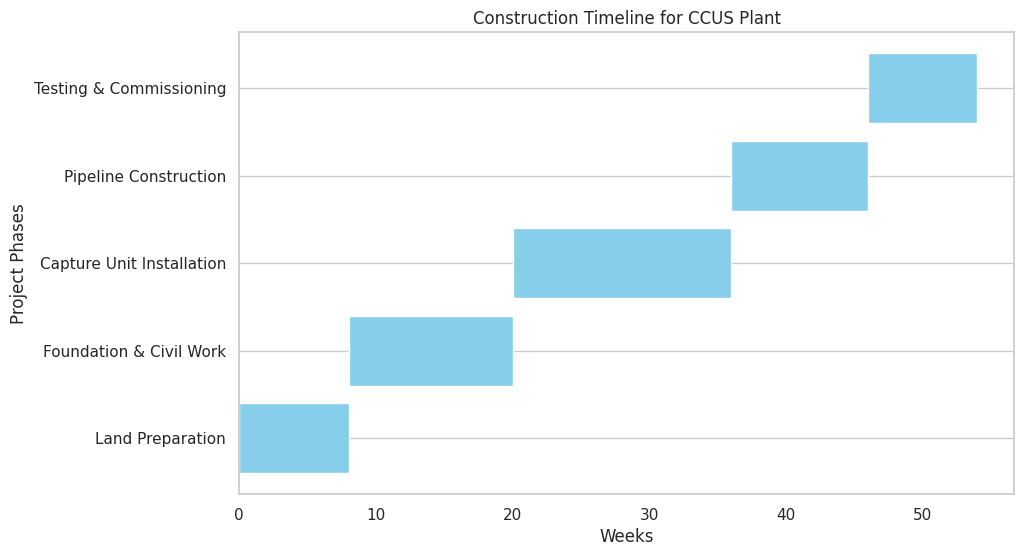

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Define project phases and durations (in weeks)
project_phases = {
    "Land Preparation": 8,
    "Foundation & Civil Work": 12,
    "Capture Unit Installation": 16,
    "Pipeline Construction": 10,
    "Testing & Commissioning": 8,
}

# Generate Gantt chart data
start_week = 0
gantt_data = []
for phase, duration in project_phases.items():
    gantt_data.append({"Phase": phase, "Start": start_week, "End": start_week + duration})
    start_week += duration

gantt_df = pd.DataFrame(gantt_data)

# Plot Gantt chart
plt.figure(figsize=(10, 6))
for i, row in gantt_df.iterrows():
    plt.barh(row["Phase"], row["End"] - row["Start"], left=row["Start"], color="skyblue")
plt.xlabel("Weeks")
plt.ylabel("Project Phases")
plt.title("Construction Timeline for CCUS Plant")
plt.grid(axis="x")
plt.show()


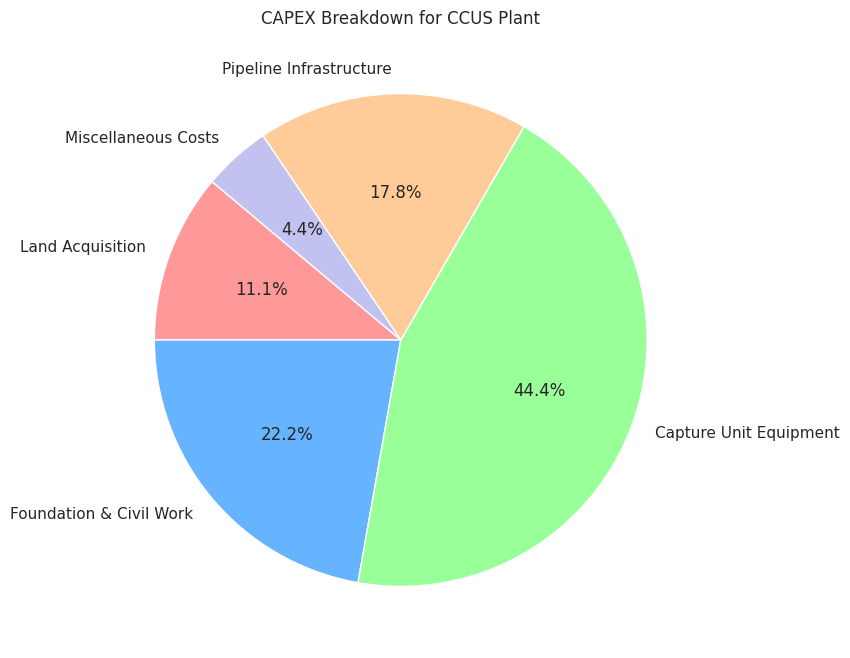

In [117]:
# Example cost breakdown (in USD millions)
capex_breakdown = {
    "Land Acquisition": 5,
    "Foundation & Civil Work": 10,
    "Capture Unit Equipment": 20,
    "Pipeline Infrastructure": 8,
    "Miscellaneous Costs": 2,
}

# Visualize cost breakdown
labels = capex_breakdown.keys()
sizes = capex_breakdown.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("CAPEX Breakdown for CCUS Plant")
plt.show()


In [118]:
# Assumptions
capture_unit_area = 0.5  # Area per unit in acres
infrastructure_area = 2  # Additional infrastructure in acres

# Total land required
num_units = len(capture_units)  # From earlier modular layout
total_land_area = num_units * capture_unit_area + infrastructure_area
print(f"Total Land Required: {total_land_area:.2f} acres")


Total Land Required: 3.50 acres


In [119]:
# Example material requirements per capture unit (in tons)
material_per_unit = {
    "Steel": 20,
    "Concrete": 50,
    "Copper": 5,
}

# Total materials
total_materials = {material: amount * num_units for material, amount in material_per_unit.items()}
print("Total Material Requirements (tons):")
for material, amount in total_materials.items():
    print(f"{material}: {amount}")


Total Material Requirements (tons):
Steel: 60
Concrete: 150
Copper: 15


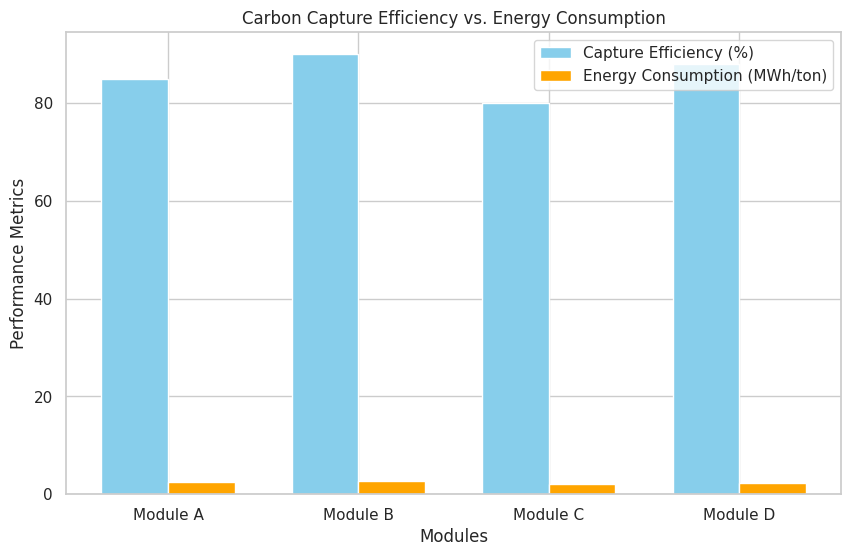

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data for performance metrics
modules = ["Module A", "Module B", "Module C", "Module D"]
co2_capture_efficiency = [85, 90, 80, 88]  # Efficiency in %
energy_consumption = [2.5, 2.8, 2.0, 2.3]  # Energy consumption in MWh/ton CO2

# Create a performance comparison bar chart
x = np.arange(len(modules))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, co2_capture_efficiency, width, label="Capture Efficiency (%)", color="skyblue")
bars2 = ax.bar(x + width/2, energy_consumption, width, label="Energy Consumption (MWh/ton)", color="orange")

ax.set_xlabel("Modules")
ax.set_ylabel("Performance Metrics")
ax.set_title("Carbon Capture Efficiency vs. Energy Consumption")
ax.set_xticks(x)
ax.set_xticklabels(modules)
ax.legend()
plt.show()


In [121]:
# Assumptions for optimization
num_modules = 4
co2_capture_rate = [500, 600, 450, 550]  # Tons of CO2 captured per module per year
module_cost = [1.5, 1.8, 1.2, 1.4]  # Cost in USD million per module
energy_use = [1500, 1600, 1200, 1400]  # Energy in MWh per year

# Calculate cost-effectiveness (CO2 captured per million USD)
cost_effectiveness = [rate / cost for rate, cost in zip(co2_capture_rate, module_cost)]

# Deployment optimization
optimal_order = sorted(range(num_modules), key=lambda i: cost_effectiveness[i], reverse=True)
print("Optimal Deployment Order (Highest to Lowest Cost-Effectiveness):")
for i in optimal_order:
    print(f"Module {modules[i]} - Cost-Effectiveness: {cost_effectiveness[i]:.2f} tons/USD million")


Optimal Deployment Order (Highest to Lowest Cost-Effectiveness):
Module Module D - Cost-Effectiveness: 392.86 tons/USD million
Module Module C - Cost-Effectiveness: 375.00 tons/USD million
Module Module A - Cost-Effectiveness: 333.33 tons/USD million
Module Module B - Cost-Effectiveness: 333.33 tons/USD million


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



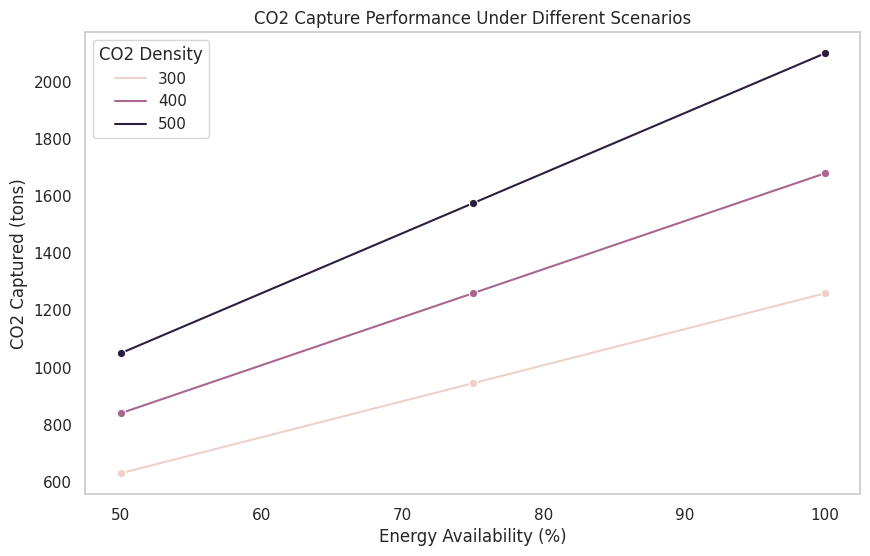

In [122]:
# Simulated scenarios
energy_levels = [50, 75, 100]  # % of maximum energy available
co2_density = [300, 400, 500]  # CO2 density in ppm

# Performance simulation
scenario_results = []
for energy in energy_levels:
    for density in co2_density:
        efficiency_factor = energy / 100 * density / 500  # Simplified efficiency model
        total_co2_captured = sum(rate * efficiency_factor for rate in co2_capture_rate)
        scenario_results.append({"Energy": energy, "CO2 Density": density, "CO2 Captured (tons)": total_co2_captured})

# Convert to DataFrame for visualization
import pandas as pd
scenario_df = pd.DataFrame(scenario_results)

# Visualization
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=scenario_df, x="Energy", y="CO2 Captured (tons)", hue="CO2 Density", marker="o")
plt.title("CO2 Capture Performance Under Different Scenarios")
plt.xlabel("Energy Availability (%)")
plt.ylabel("CO2 Captured (tons)")
plt.grid()
plt.show()


Layout Plan Summary:
     Module  Area (m²)  Energy Usage (MWh)  CO2 Capture Capacity (tons/year)
0  Module A        500                1500                               100
1  Module B        600                1600                               120
2  Module C        450                1200                                80
3  Module D        550                1400                               110


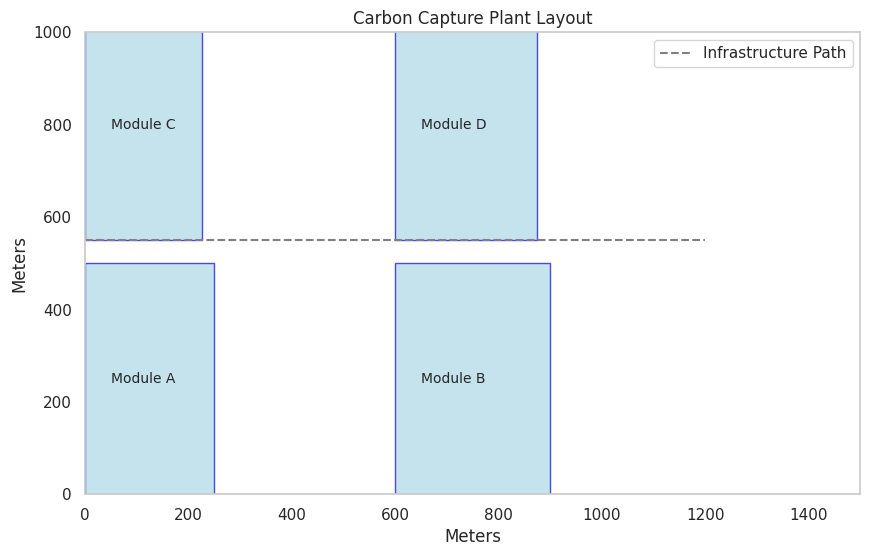

In [123]:
# Assumptions for layout design
modules = ["Module A", "Module B", "Module C", "Module D"]
module_areas = [500, 600, 450, 550]  # Land area in square meters
total_land_area = sum(module_areas) * 2  # Include extra for infrastructure

layout_plan = pd.DataFrame({
    "Module": modules,
    "Area (m²)": module_areas,
    "Energy Usage (MWh)": [1500, 1600, 1200, 1400],
    "CO2 Capture Capacity (tons/year)": [100, 120, 80, 110]
})

# Display the DataFrame
print("Layout Plan Summary:")
print(layout_plan)

# Visualize the layout plan using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

# Module placements
x_positions = [0, 600, 0, 600]  # X-axis positions for modules
y_positions = [0, 0, 550, 550]  # Y-axis positions for modules

for i, module in enumerate(modules):
    rect = patches.Rectangle((x_positions[i], y_positions[i]), module_areas[i] / 2, 500, edgecolor='blue', facecolor='lightblue', alpha=0.7)
    ax.add_patch(rect)
    plt.text(x_positions[i] + 50, y_positions[i] + 250, module, fontsize=10, va='center')

# Add infrastructure
plt.plot([0, 1200], [550, 550], color="gray", linestyle="--", label="Infrastructure Path")
plt.title("Carbon Capture Plant Layout")
plt.xlim(0, 1500)
plt.ylim(0, 1000)
plt.xlabel("Meters")
plt.ylabel("Meters")
plt.grid()
plt.legend()
plt.show()


In [124]:
# Financial assumptions
construction_cost_per_m2 = 300  # USD per square meter
energy_cost_per_MWh = 50  # USD per MWh
maintenance_cost_per_ton = 10  # USD per ton of CO2 captured
carbon_price = 70  # USD per ton of CO2 captured

# Calculate CAPEX and OPEX
layout_plan["CAPEX (USD)"] = layout_plan["Area (m²)"] * construction_cost_per_m2
layout_plan["Energy Cost (USD/year)"] = layout_plan["Energy Usage (MWh)"] * energy_cost_per_MWh
layout_plan["Maintenance Cost (USD/year)"] = layout_plan["CO2 Capture Capacity (tons/year)"] * maintenance_cost_per_ton
layout_plan["Revenue (USD/year)"] = layout_plan["CO2 Capture Capacity (tons/year)"] * carbon_price

# Calculate total OPEX
layout_plan["Total OPEX (USD/year)"] = layout_plan["Energy Cost (USD/year)"] + layout_plan["Maintenance Cost (USD/year)"]

# Display financial summary
financial_summary = layout_plan[["Module", "CAPEX (USD)", "Total OPEX (USD/year)", "Revenue (USD/year)"]]
print("Financial Summary:")
print(financial_summary)


Financial Summary:
     Module  CAPEX (USD)  Total OPEX (USD/year)  Revenue (USD/year)
0  Module A       150000                  76000                7000
1  Module B       180000                  81200                8400
2  Module C       135000                  60800                5600
3  Module D       165000                  71100                7700


In [125]:
# Assumptions for projections
inflation_rate = 0.02  # 2% annual inflation
carbon_price_growth = 0.03  # 3% annual increase in carbon price

# Initialize projection data
years = range(2025, 2035)
projection = pd.DataFrame({"Year": years})

# Calculate yearly projections
projection["Carbon Price (USD/ton)"] = [carbon_price * (1 + carbon_price_growth) ** (year - 2025) for year in years]
projection["Revenue (USD/year)"] = projection["Carbon Price (USD/ton)"] * layout_plan["CO2 Capture Capacity (tons/year)"].sum()
projection["OPEX (USD/year)"] = layout_plan["Total OPEX (USD/year)"].sum() * (1 + inflation_rate) ** (projection["Year"] - 2025)
projection["Net Profit (USD/year)"] = projection["Revenue (USD/year)"] - projection["OPEX (USD/year)"]

# Display projections
print("10-Year Financial Projection:")
print(projection)


10-Year Financial Projection:
   Year  Carbon Price (USD/ton)  Revenue (USD/year)  OPEX (USD/year)  \
0  2025               70.000000        28700.000000    289100.000000   
1  2026               72.100000        29561.000000    294882.000000   
2  2027               74.263000        30447.830000    300779.640000   
3  2028               76.490890        31361.264900    306795.232800   
4  2029               78.785617        32302.102847    312931.137456   
5  2030               81.149185        33271.165932    319189.760205   
6  2031               83.583661        34269.300910    325573.555409   
7  2032               86.091171        35297.379938    332085.026517   
8  2033               88.673906        36356.301336    338726.727048   
9  2034               91.334123        37446.990376    345501.261589   

   Net Profit (USD/year)  
0         -260400.000000  
1         -265321.000000  
2         -270331.810000  
3         -275433.967900  
4         -280629.034609  
5         -2859

In [126]:
from scipy.optimize import linprog

# Objective: Minimize land use
c = layout_plan["Area (m²)"]

# Constraints: Total CO2 capture >= target
A = [-layout_plan["CO2 Capture Capacity (tons/year)"]]
b = [-400]  # Target CO2 capture in tons/year

# Bounds for each module (1 if used, 0 if not)
bounds = [(0, 1) for _ in layout_plan["Module"]]

# Solve linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Interpret result
print("Optimization Result:")
print(result)


Optimization Result:
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 2043.75
              x: [ 1.000e+00  1.000e+00  8.750e-01  1.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  1.000e+00  8.750e-01  1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 0.000e+00  0.000e+00  1.250e-01  0.000e+00]
                 marginals: [-6.250e+01 -7.500e+01  0.000e+00 -6.875e+01]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-5.625e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


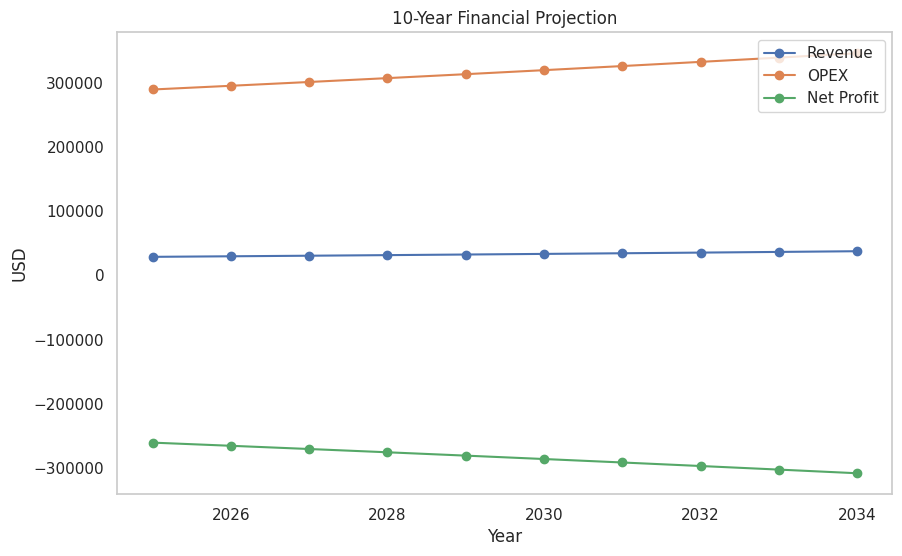

In [127]:
import matplotlib.pyplot as plt

# Plot financial projection
plt.figure(figsize=(10, 6))
plt.plot(projection["Year"], projection["Revenue (USD/year)"], label="Revenue", marker="o")
plt.plot(projection["Year"], projection["OPEX (USD/year)"], label="OPEX", marker="o")
plt.plot(projection["Year"], projection["Net Profit (USD/year)"], label="Net Profit", marker="o")
plt.title("10-Year Financial Projection")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.grid()
plt.show()


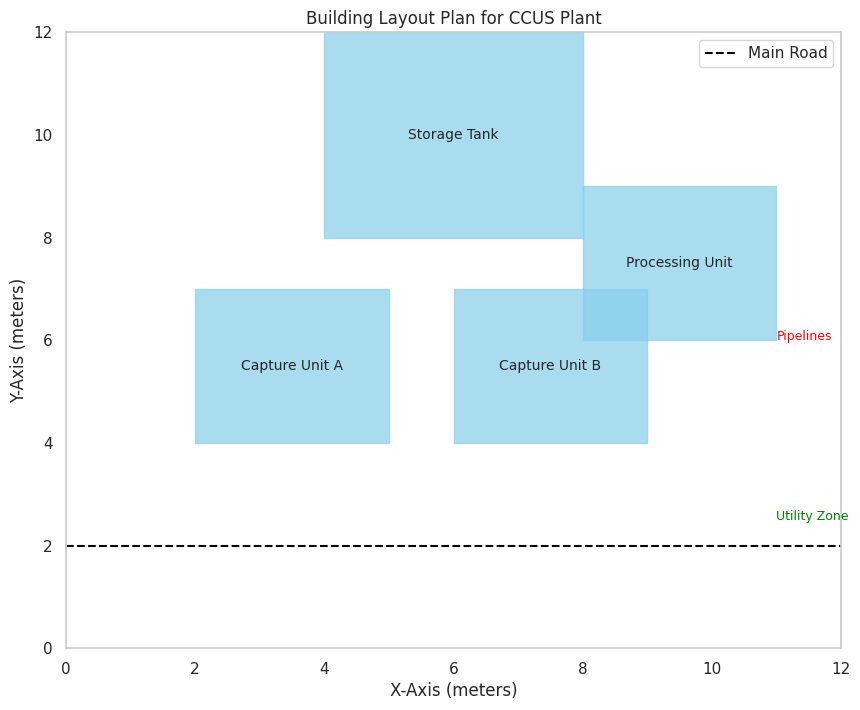

In [128]:
import matplotlib.pyplot as plt

# Module coordinates and sizes
modules = ["Capture Unit A", "Capture Unit B", "Storage Tank", "Processing Unit"]
x_coords = [2, 6, 4, 8]  # X-coordinates
y_coords = [4, 4, 8, 6]  # Y-coordinates
module_widths = [3, 3, 4, 3]  # Widths
module_heights = [3, 3, 4, 3]  # Heights

# Plot layout
plt.figure(figsize=(10, 8))
for i, module in enumerate(modules):
    plt.gca().add_patch(plt.Rectangle((x_coords[i], y_coords[i]), module_widths[i], module_heights[i], color="skyblue", alpha=0.7))
    plt.text(x_coords[i] + module_widths[i] / 2, y_coords[i] + module_heights[i] / 2, module, ha="center", va="center", fontsize=10)

# Add labels for roads and utilities
plt.plot([0, 12], [2, 2], color="black", linestyle="--", label="Main Road")
plt.text(11, 2.5, "Utility Zone", fontsize=9, color="green")
plt.text(11, 6, "Pipelines", fontsize=9, color="red")

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.title("Building Layout Plan for CCUS Plant")
plt.xlabel("X-Axis (meters)")
plt.ylabel("Y-Axis (meters)")
plt.grid()
plt.legend()
plt.show()


* Modules: Capture units, storage tanks, processing units.
* Land Use: Allocation of land area for each module.
* Infrastructure: Roads, pipelines, utility zones.

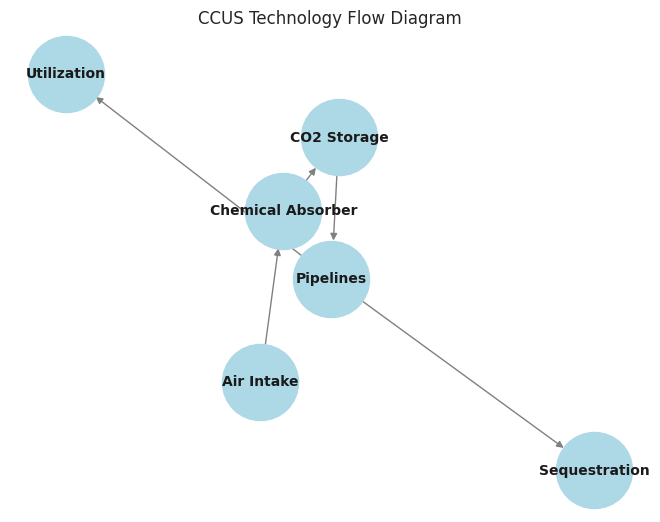

In [129]:
import matplotlib.pyplot as plt
import networkx as nx

# Define process flow
G = nx.DiGraph()
G.add_edges_from([
    ("Air Intake", "Chemical Absorber"),
    ("Chemical Absorber", "CO2 Storage"),
    ("CO2 Storage", "Pipelines"),
    ("Pipelines", "Utilization"),
    ("Pipelines", "Sequestration"),
])

# Node positions
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("CCUS Technology Flow Diagram")
plt.show()


* Air Intake Fans: Captures CO2 from the air.
* Chemical Absorbers: Absorb and concentrate CO2.
* Storage Tanks: Store captured CO2.
* Pipelines: Transport CO2 for utilization or sequestration.

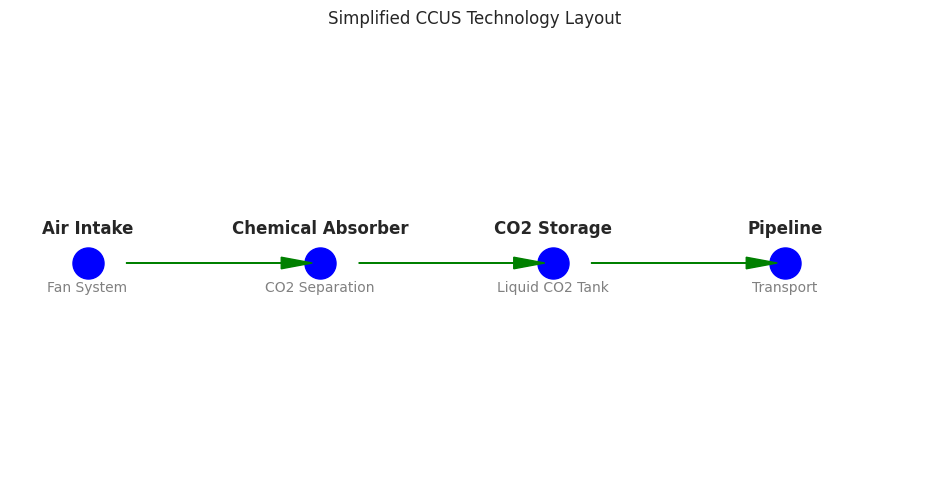

In [130]:
import matplotlib.pyplot as plt

# Modules and annotations
modules = ["Air Intake", "Chemical Absorber", "CO2 Storage", "Pipeline"]
coords = [(1, 4), (4, 4), (7, 4), (10, 4)]
annotations = ["Fan System", "CO2 Separation", "Liquid CO2 Tank", "Transport"]

# Plot system
plt.figure(figsize=(12, 6))
for i, module in enumerate(modules):
    plt.scatter(*coords[i], color="blue", s=500)
    plt.text(coords[i][0], coords[i][1] + 0.5, module, ha="center", fontsize=12, weight="bold")
    plt.text(coords[i][0], coords[i][1] - 0.5, annotations[i], ha="center", fontsize=10, color="gray")

# Add arrows for flow
for i in range(len(coords) - 1):
    plt.arrow(coords[i][0] + 0.5, coords[i][1], coords[i + 1][0] - coords[i][0] - 1, 0, head_width=0.2, head_length=0.4, fc="green", ec="green")

plt.xlim(0, 12)
plt.ylim(0, 8)
plt.title("Simplified CCUS Technology Layout")
plt.axis("off")
plt.show()


Export plans for:
* Building design: Include dimensions and materials.
* Energy flow: Integrate power sources (renewable energy).
* Waste management: Plan for water and chemical waste.

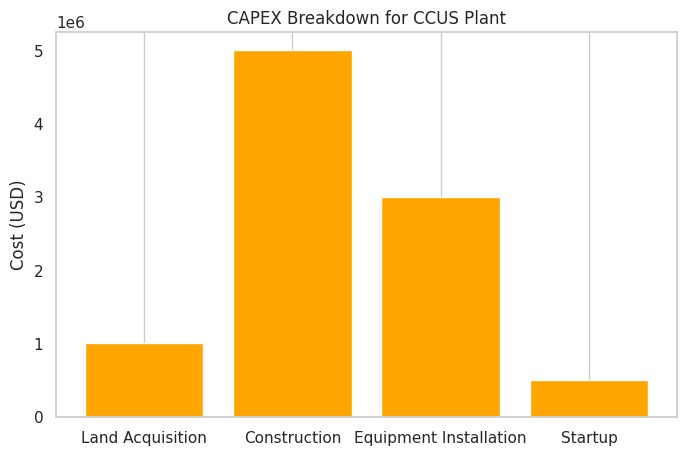

In [131]:
phases = ["Land Acquisition", "Construction", "Equipment Installation", "Startup"]
costs = [1_000_000, 5_000_000, 3_000_000, 500_000]  # USD

# Plot CAPEX Breakdown
plt.figure(figsize=(8, 5))
plt.bar(phases, costs, color="orange")
plt.title("CAPEX Breakdown for CCUS Plant")
plt.ylabel("Cost (USD)")
plt.grid(axis="y")
plt.show()


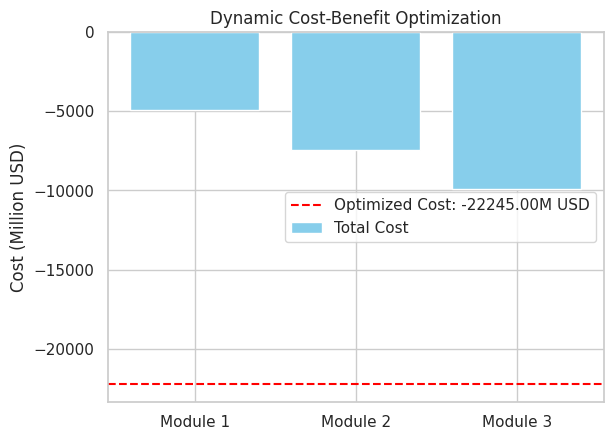

Optimized Investment per Module: [1. 1. 1.]
Total Optimized Cost: -22245.00M USD


In [132]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Define parameters
capture_capacity = [100, 150, 200]  # in tons/year
investment_cost = [50, 70, 90]  # in million USD
operational_cost = [10, 15, 20]  # in million USD/year
carbon_credit_price = 50  # in USD/ton

# Objective: Minimize total cost = investment_cost + operational_cost - revenue
revenue = [capture * carbon_credit_price for capture in capture_capacity]
total_cost = [inv + op - rev for inv, op, rev in zip(investment_cost, operational_cost, revenue)]

# Constraints: Total capacity should exceed 300 tons/year
constraints = {
    'type': 'ineq',
    'fun': lambda x: sum(x[i] * capture_capacity[i] for i in range(len(capture_capacity))) - 300,
}

# Linear Programming
result = linprog(c=total_cost, bounds=[(0, 1) for _ in capture_capacity], method='highs', options={"disp": True})

# Visualization
plt.bar(range(len(capture_capacity)), total_cost, color='skyblue', label='Total Cost')
plt.axhline(y=result.fun, color='red', linestyle='--', label=f'Optimized Cost: {result.fun:.2f}M USD')
plt.xticks(range(len(capture_capacity)), [f"Module {i+1}" for i in range(len(capture_capacity))])
plt.ylabel('Cost (Million USD)')
plt.title('Dynamic Cost-Benefit Optimization')
plt.legend()
plt.show()

# Display Results
print("Optimized Investment per Module:", result.x)
print(f"Total Optimized Cost: {result.fun:.2f}M USD")


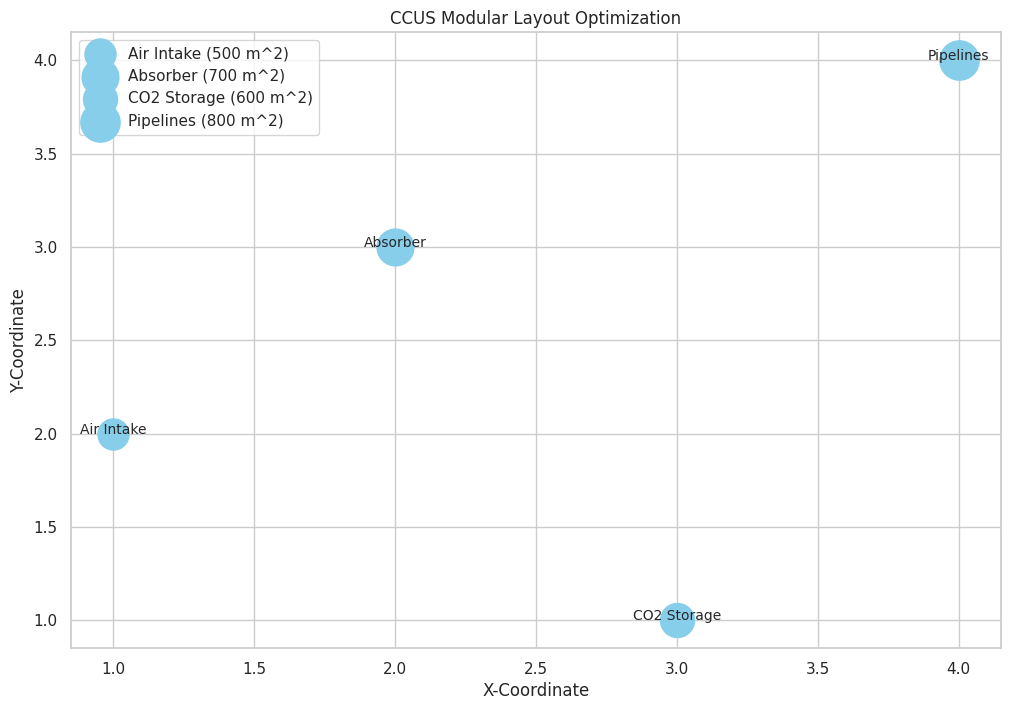

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Define module coordinates and sizes
modules = ["Air Intake", "Absorber", "CO2 Storage", "Pipelines"]
module_sizes = [500, 700, 600, 800]  # in m^2
x_coords = np.arange(1, len(modules) + 1)
y_coords = [2, 3, 1, 4]

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
for i, module in enumerate(modules):
    ax.scatter(x_coords[i], y_coords[i], s=module_sizes[i], c='skyblue', label=f"{module} ({module_sizes[i]} m^2)")
    ax.text(x_coords[i], y_coords[i], module, fontsize=10, ha='center')

plt.title("CCUS Modular Layout Optimization")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.legend()
plt.grid(True)
plt.show()


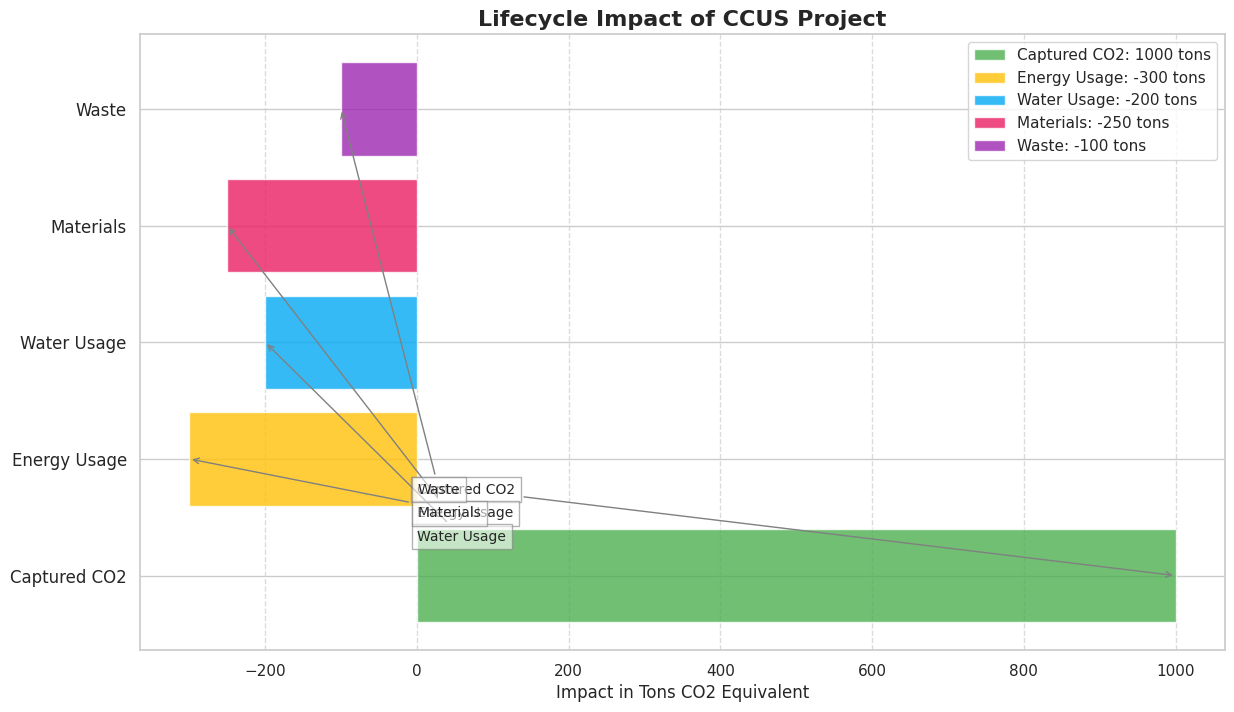

In [134]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Define data
sections = ["Captured CO2", "Energy Usage", "Water Usage", "Materials", "Waste"]
values = [1000, -300, -200, -250, -100]  # in tons/year
colors = ['#4CAF50', '#FFC107', '#03A9F4', '#E91E63', '#9C27B0']
positions = [(0.2, 0.7), (0.4, 0.5), (0.6, 0.3), (0.8, 0.5), (1.0, 0.7)]  # Adjust manually

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))
for i, value in enumerate(values):
    ax.barh(i, value, color=colors[i], alpha=0.8, label=f"{sections[i]}: {value} tons")

# Add annotations with arrows
for i, (x, y) in enumerate(positions):
    ax.annotate(
        sections[i],
        xy=(values[i], i),
        xytext=(x, y),
        arrowprops=dict(arrowstyle="->", color='gray'),
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', alpha=0.6),
    )

# Styling
ax.set_yticks(range(len(sections)))
ax.set_yticklabels(sections, fontsize=12)
ax.set_title("Lifecycle Impact of CCUS Project", fontsize=16, fontweight='bold')
ax.set_xlabel("Impact in Tons CO2 Equivalent", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(loc='upper right')

plt.show()


In [135]:
import plotly.express as px
import pandas as pd

# Data
df = pd.DataFrame({
    "Section": ["Captured CO2", "Energy Usage", "Water Usage", "Materials", "Waste"],
    "Impact": [1000, -300, -200, -250, -100]
})

# Create interactive chart
fig = px.bar(
    df, 
    x="Impact", 
    y="Section", 
    orientation='h', 
    title="Lifecycle Impact of CCUS Project",
    text="Impact",
    color="Section",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(texttemplate='%{text} tons', textposition='outside')
fig.update_layout(
    xaxis_title="Impact in Tons CO2 Equivalent",
    yaxis_title="",
    title_font_size=16
)
fig.show()


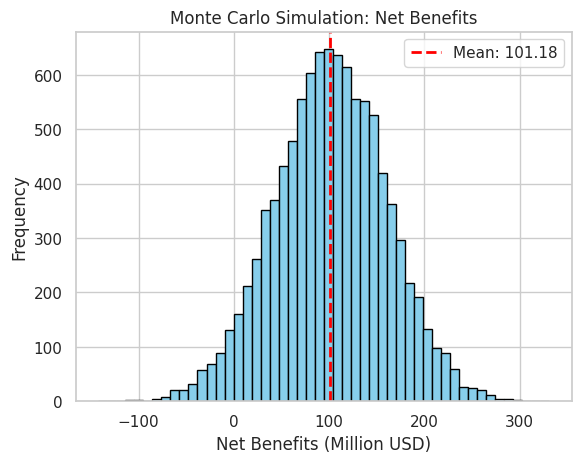

Mean Net Benefit: 101.18M USD
Probability of Loss: 4.48%


In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
iterations = 10000
initial_cost = 200  # in million USD
cost_std_dev = 30  # in million USD
revenue = 300  # in million USD
revenue_std_dev = 50  # in million USD

# Generate simulation data
costs = np.random.normal(initial_cost, cost_std_dev, iterations)
revenues = np.random.normal(revenue, revenue_std_dev, iterations)
net_benefits = revenues - costs

# Visualization
plt.hist(net_benefits, bins=50, color='skyblue', edgecolor='black')
plt.title("Monte Carlo Simulation: Net Benefits")
plt.axvline(np.mean(net_benefits), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {np.mean(net_benefits):.2f}")
plt.xlabel("Net Benefits (Million USD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Summary
print(f"Mean Net Benefit: {np.mean(net_benefits):.2f}M USD")
print(f"Probability of Loss: {np.sum(net_benefits < 0) / iterations * 100:.2f}%")


In [137]:
# Modular Layout Data
modules = ["Module A", "Module B", "Module C", "Module D"]
areas = [500, 600, 700, 800]  # Area in m²
energy = [1500, 1600, 1800, 2000]  # Energy in MWh
capacity = [100, 120, 140, 160]  # CO2 captured in tons/year

layout_df = pd.DataFrame({
    "Module": modules,
    "Area (m²)": areas,
    "Energy Usage (MWh)": energy,
    "CO2 Capture (tons/year)": capacity
})

print(layout_df)


     Module  Area (m²)  Energy Usage (MWh)  CO2 Capture (tons/year)
0  Module A        500                1500                      100
1  Module B        600                1600                      120
2  Module C        700                1800                      140
3  Module D        800                2000                      160


In [138]:
# Building Plan Timeline
phases = ["Land Acquisition", "Plant Construction", "Technology Setup", "Operational"]
start_dates = ["2025-01", "2026-03", "2027-06", "2028-01"]
end_dates = ["2025-12", "2027-05", "2028-12", "2035-12"]

timeline_df = pd.DataFrame({
    "Phase": phases,
    "Start Date": start_dates,
    "End Date": end_dates
})

print(timeline_df)


                Phase Start Date End Date
0    Land Acquisition    2025-01  2025-12
1  Plant Construction    2026-03  2027-05
2    Technology Setup    2027-06  2028-12
3         Operational    2028-01  2035-12


Mean Squared Error: 917.59


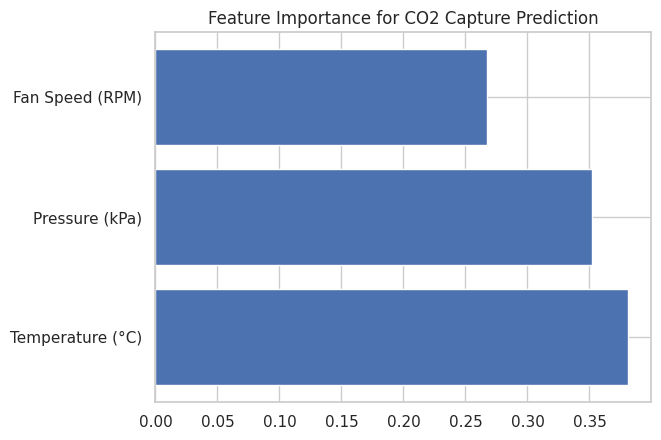

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Example dataset (generate random values for CO2 capture conditions)
np.random.seed(42)
data = {
    "Temperature (°C)": np.random.uniform(15, 35, 100),
    "Pressure (kPa)": np.random.uniform(90, 120, 100),
    "Fan Speed (RPM)": np.random.uniform(1000, 3000, 100),
    "CO2 Captured (tons)": np.random.uniform(50, 150, 100)
}

# Prepare the data
import pandas as pd
df = pd.DataFrame(data)
X = df[["Temperature (°C)", "Pressure (kPa)", "Fan Speed (RPM)"]]
y = df["CO2 Captured (tons)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance for CO2 Capture Prediction")
plt.show()


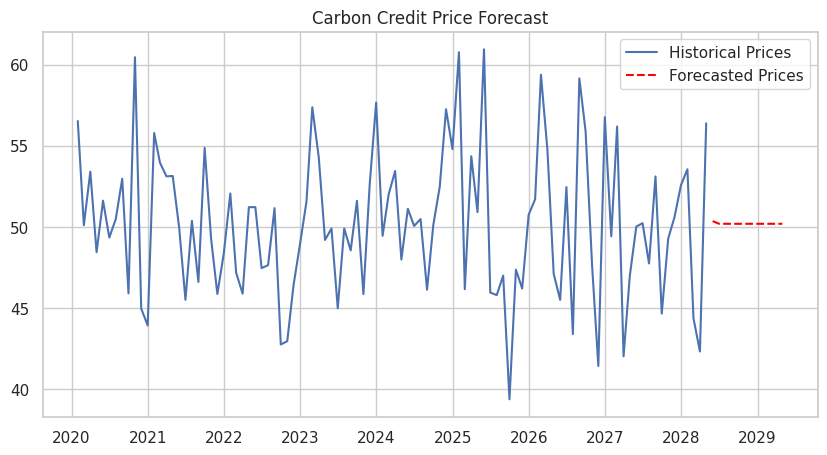

In [140]:
# Forecasting carbon credit prices (Hypothetical example using ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic data for carbon credit prices
carbon_prices = pd.Series(np.random.normal(50, 5, 100), index=pd.date_range("2020-01", periods=100, freq="M"))

# Fit ARIMA model
model = ARIMA(carbon_prices, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(carbon_prices, label="Historical Prices")
plt.plot(forecast, label="Forecasted Prices", linestyle="--", color="red")
plt.title("Carbon Credit Price Forecast")
plt.legend()
plt.show()


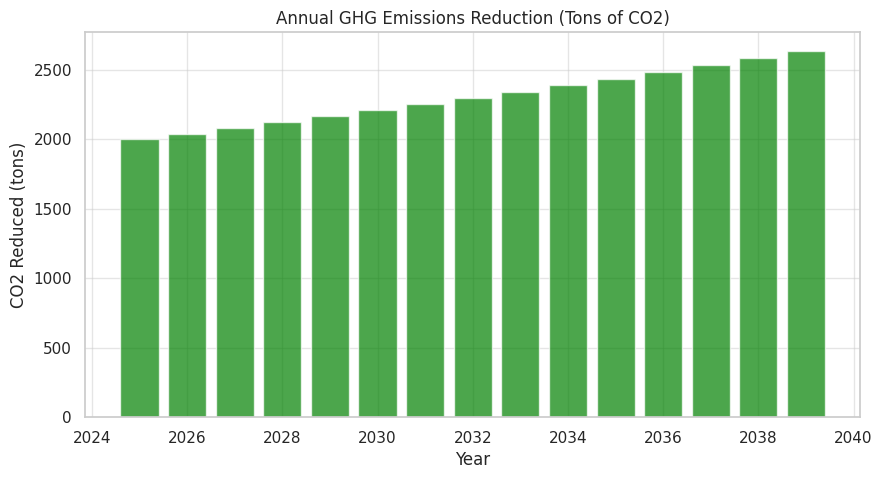

In [141]:
# Annual GHG Emissions Reduction Chart
years = list(range(2025, 2040))
ghg_reduction = [2000 * (1.02 ** i) for i in range(len(years))]

plt.figure(figsize=(10, 5))
plt.bar(years, ghg_reduction, color="green", alpha=0.7)
plt.title("Annual GHG Emissions Reduction (Tons of CO2)")
plt.xlabel("Year")
plt.ylabel("CO2 Reduced (tons)")
plt.grid(alpha=0.5)
plt.show()


In [142]:
import plotly.graph_objects as go

# Define module positions and dimensions
modules = ["Air Intake Fans", "Chemical Absorbers", "Storage Tanks", "Pipelines"]
positions = [(0, 0, 0), (2, 0, 0), (4, 0, 0), (6, 0, 0)]
sizes = [(1, 1, 2), (1.5, 1, 3), (2, 2, 4), (4, 0.5, 0.5)]

# Create figure
fig = go.Figure()

# Add cuboids for each module
for module, (x, y, z), (lx, ly, lz) in zip(modules, positions, sizes):
    fig.add_trace(go.Mesh3d(
        x=[x, x + lx, x + lx, x, x, x + lx, x + lx, x],
        y=[y, y, y + ly, y + ly, y, y, y + ly, y + ly],
        z=[z, z, z, z, z + lz, z + lz, z + lz, z + lz],
        color='blue',
        opacity=0.5,
        name=module
    ))
    fig.add_trace(go.Scatter3d(
        x=[x + lx / 2], y=[y + ly / 2], z=[z + lz + 0.5],
        text=[module], mode="text"
    ))

# Update layout
fig.update_layout(
    title="Interactive 3D CCUS Design",
    scene=dict(
        xaxis_title="X-axis (m)",
        yaxis_title="Y-axis (m)",
        zaxis_title="Z-axis (m)",
    )
)
fig.show()


In [143]:
# Land requirements
total_land_area = sum([lx * ly for lx, ly, _ in sizes])
print(f"Total Land Area: {total_land_area:.2f} m²")

# Energy usage for components
energy_usage = [100, 200, 300, 400]  # Hypothetical values in kWh
total_energy = sum(energy_usage)
print(f"Total Energy Usage: {total_energy:.2f} kWh")


Total Land Area: 8.50 m²
Total Energy Usage: 1000.00 kWh


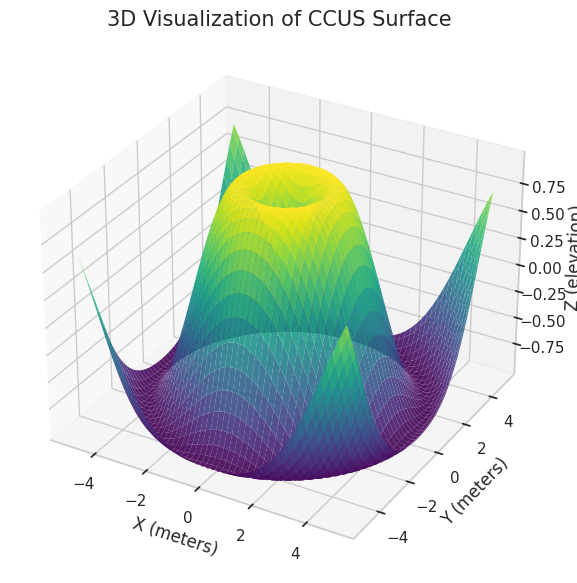

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define 3D grid
x = np.linspace(-5, 5, 100)  # X-axis
y = np.linspace(-5, 5, 100)  # Y-axis
X, Y = np.meshgrid(x, y)     # Create grid
Z = np.sin(np.sqrt(X**2 + Y**2))  # Define surface as a 2D array

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Labels and title
ax.set_title("3D Visualization of CCUS Surface", fontsize=15)
ax.set_xlabel("X (meters)")
ax.set_ylabel("Y (meters)")
ax.set_zlabel("Z (elevation)")
plt.show()


In [145]:
# Example: Add financial variables for modules
layout_plan["Construction Cost (USD)"] = layout_plan["Area (m²)"] * 200  # Cost per m²
layout_plan["Energy Cost (USD/year)"] = layout_plan["Energy Usage (MWh)"] * 0.12 * 365  # $0.12/kWh
layout_plan["Total Cost (USD/year)"] = layout_plan["Construction Cost (USD)"] + layout_plan["Energy Cost (USD/year)"]

# Display updated plan
import pandas as pd
print(layout_plan)


     Module  Area (m²)  Energy Usage (MWh)  CO2 Capture Capacity (tons/year)  \
0  Module A        500                1500                               100   
1  Module B        600                1600                               120   
2  Module C        450                1200                                80   
3  Module D        550                1400                               110   

   CAPEX (USD)  Energy Cost (USD/year)  Maintenance Cost (USD/year)  \
0       150000                 65700.0                         1000   
1       180000                 70080.0                         1200   
2       135000                 52560.0                          800   
3       165000                 61320.0                         1100   

   Revenue (USD/year)  Total OPEX (USD/year)  Construction Cost (USD)  \
0                7000                  76000                   100000   
1                8400                  81200                   120000   
2                5600   

In [146]:
# Example: CO2 and environmental savings
layout_plan["Environmental Savings (tons/year)"] = layout_plan["CO2 Capture Capacity (tons/year)"] * 1.5  # 1.5x factor for other savings

# Summarize impact
total_savings = layout_plan["Environmental Savings (tons/year)"].sum()
print(f"Total Environmental Savings: {total_savings} tons/year")


Total Environmental Savings: 615.0 tons/year


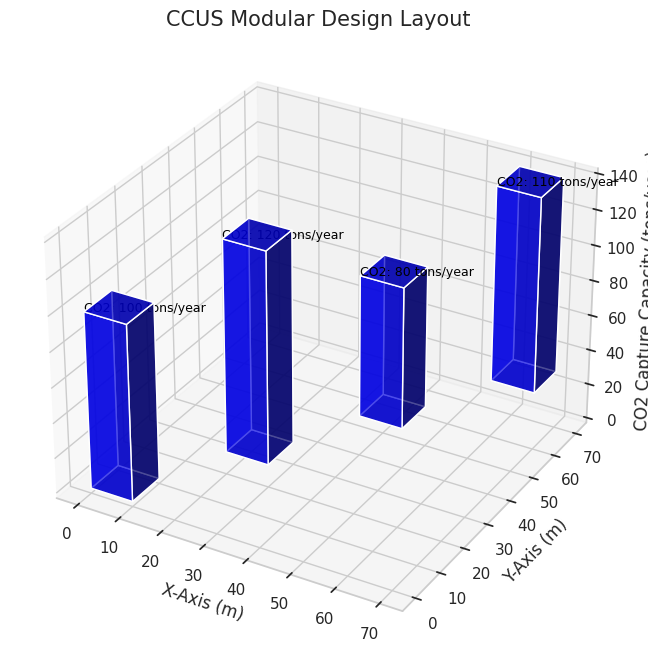

In [147]:
# Interactive 3D Plot for Layout
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Coordinates
x_coords = [0, 20, 40, 60]  # Example X positions
y_coords = [0, 20, 40, 60]  # Example Y positions
z_coords = [0, 10, 20, 30]  # Example heights
heights = layout_plan["CO2 Capture Capacity (tons/year)"]  # Heights based on capacity

for i, (x, y, z, h) in enumerate(zip(x_coords, y_coords, z_coords, heights)):
    ax.bar3d(x, y, z, dx=10, dy=10, dz=h, color='blue', alpha=0.7)
    ax.text(x, y, z + h, f"CO2: {h} tons/year", color="black", fontsize=9)

ax.set_xlabel("X-Axis (m)")
ax.set_ylabel("Y-Axis (m)")
ax.set_zlabel("CO2 Capture Capacity (tons/year)")
ax.set_title("CCUS Modular Design Layout", fontsize=15)
plt.show()


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example: Predict energy costs
X = layout_plan[["Energy Usage (MWh)"]]  # Features
y = layout_plan["Energy Cost (USD/year)"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predicted_costs = model.predict(X_test)
print(f"Predicted Costs: {predicted_costs}")


Predicted Costs: [70080.]


In [149]:
# Incorporate McKinsey energy trends
sectors = ["Power Generation", "Industry", "Transport"]
demand_growth = [5.2, 7.1, 3.8]  # Example annual growth in CCUS demand (%)
policy_support = [1.2, 2.5, 1.8]  # Policy multiplier for adoption (%)

trends = pd.DataFrame({
    "Sector": sectors,
    "Demand Growth (%)": demand_growth,
    "Policy Support Multiplier (%)": policy_support
})

print(trends)


             Sector  Demand Growth (%)  Policy Support Multiplier (%)
0  Power Generation                5.2                            1.2
1          Industry                7.1                            2.5
2         Transport                3.8                            1.8


Incorporate Global Energy Trends
* McKinsey Insight: Identify demand drivers for CCUS, such as industrial decarbonization and government policies.
* Action: Include energy demand, policy incentives, and sector-specific decarbonization goals in your model.

In [150]:
# Adoption scenarios for CCUS deployment
scenarios = ["High", "Moderate", "Low"]
adoption_rates = [0.8, 0.5, 0.3]  # Adoption rates for CCUS capacity

# Predict CO2 capture capacity for each scenario
base_capacity = 1000  # Base capacity in tons/year
forecast = {scenario: base_capacity * rate for scenario, rate in zip(scenarios, adoption_rates)}

for scenario, capacity in forecast.items():
    print(f"{scenario} Adoption: {capacity} tons/year")


High Adoption: 800.0 tons/year
Moderate Adoption: 500.0 tons/year
Low Adoption: 300.0 tons/year


 Forecast Adoption Scenarios
* McKinsey Insight: Use high, moderate, and low adoption scenarios to forecast CCUS deployment.
* Action: Implement scenario-based predictions to evaluate financial, environmental, and technological outcomes.

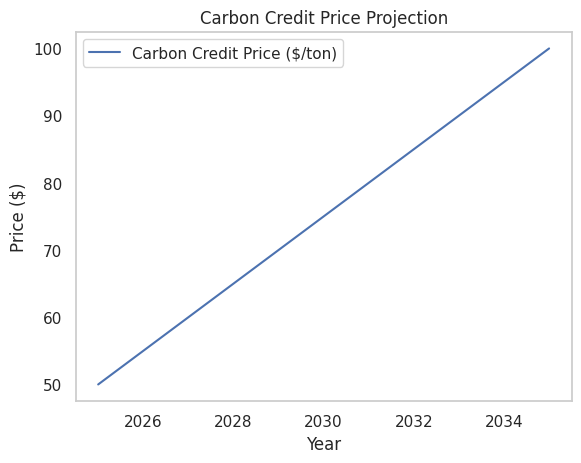

In [151]:
# Carbon credit price forecast
years = range(2025, 2036)
prices = [50 + 5 * (i - 2025) for i in years]  # Example: $5/year price increase

plt.plot(years, prices, label="Carbon Credit Price ($/ton)")
plt.title("Carbon Credit Price Projection")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend()
plt.grid()
plt.show()


Carbon Credit Market and Pricing
* McKinsey Insight: Highlight the importance of carbon credits in financing CCUS.
* Action: Include a carbon credit price projection aligned with McKinsey's forecast.

In [152]:
# Example: Policy impact on project ROI
subsidies = [0.1, 0.15, 0.2]  # Subsidy as % of cost
costs = layout_plan["Construction Cost (USD)"]
revenues = layout_plan["Energy Cost (USD/year)"]

roi_policy = [(revenues * (1 + subsidy) / costs).mean() for subsidy in subsidies]
print(f"Policy-Driven ROI: {roi_policy}")


Policy-Driven ROI: [0.6551750000000001, 0.6849556818181818, 0.7147363636363636]


Policy-Driven Financial Planning
* McKinsey Insight: Assess financial viability under subsidies, carbon credit revenues, and tax incentives.
* Action: Simulate policy impacts on financial models and ROI.

In [153]:
# Deployment timeline
timeline = {
    "Phase": ["Pilot", "Expansion", "Full Deployment"],
    "Year": [2025, 2030, 2035],
    "Capacity (tons/year)": [500, 1000, 2000],
    "CAPEX (USD Million)": [50, 150, 300]
}
timeline_df = pd.DataFrame(timeline)
print(timeline_df)


             Phase  Year  Capacity (tons/year)  CAPEX (USD Million)
0            Pilot  2025                   500                   50
1        Expansion  2030                  1000                  150
2  Full Deployment  2035                  2000                  300


Dynamic Deployment Timeline
* McKinsey Insight: Focus on phased deployment to minimize risks and maximize returns.
* Action: Build a dynamic timeline that integrates CAPEX, OPEX, and capacity expansion.

In [154]:
from sklearn.ensemble import RandomForestRegressor

# Example: Train ML model for demand forecasting
features = timeline_df[["Year", "Capacity (tons/year)"]]
target = timeline_df["CAPEX (USD Million)"]

model = RandomForestRegressor()
model.fit(features, target)

predictions = model.predict([[2030, 1500]])  # Predict for a new capacity
print(f"Predicted CAPEX for 2030 with 1500 tons/year: {predictions[0]:.2f} Million USD")


Predicted CAPEX for 2030 with 1500 tons/year: 155.00 Million USD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Integrate Machine Learning for Projections
* McKinsey Insight: Use predictive modeling for cost curves, adoption rates, and demand forecasting.
* Action: Train a machine learning model to predict CCUS market trends and financial outcomes.

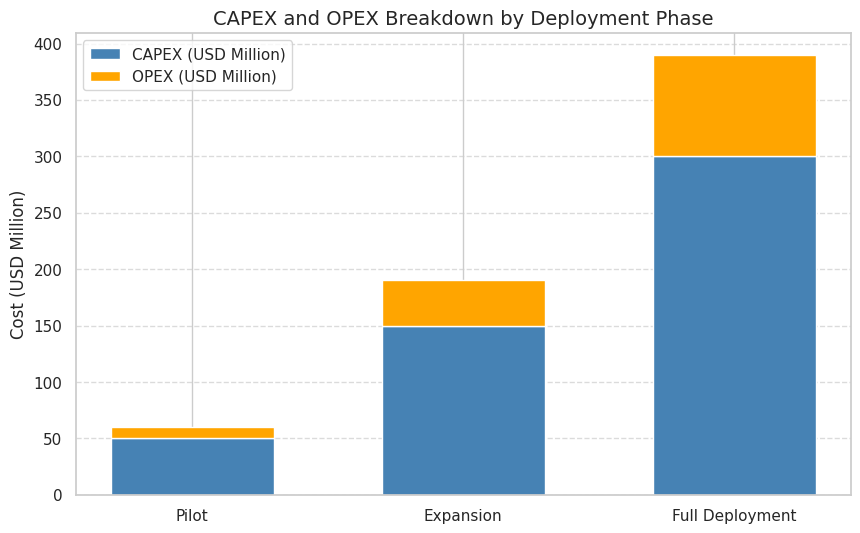

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Financial data
phases = ["Pilot", "Expansion", "Full Deployment"]
years = [2025, 2030, 2035]
capex = [50, 150, 300]  # CAPEX in million USD
opex = [10, 40, 90]  # OPEX in million USD

# Stacked bar chart
x = np.arange(len(phases))
width = 0.6

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, capex, width, label='CAPEX (USD Million)', color='steelblue')
ax.bar(x, opex, width, bottom=capex, label='OPEX (USD Million)', color='orange')

# Customization
ax.set_title("CAPEX and OPEX Breakdown by Deployment Phase", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(phases)
ax.set_ylabel("Cost (USD Million)", fontsize=12)
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


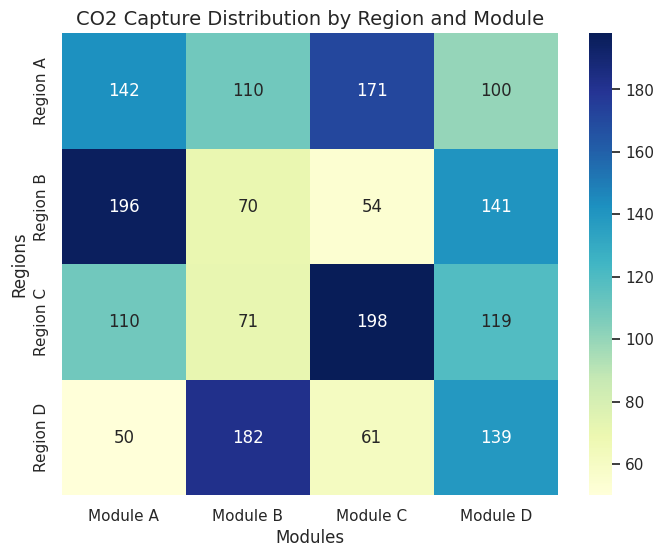

In [156]:
import seaborn as sns
import pandas as pd

# Example CO2 capture data
regions = ["Region A", "Region B", "Region C", "Region D"]
modules = ["Module A", "Module B", "Module C", "Module D"]
capture_capacity = np.random.randint(50, 200, size=(4, 4))  # Random capture capacity

df_heatmap = pd.DataFrame(capture_capacity, index=regions, columns=modules)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.title("CO2 Capture Distribution by Region and Module", fontsize=14)
plt.xlabel("Modules", fontsize=12)
plt.ylabel("Regions", fontsize=12)

plt.show()


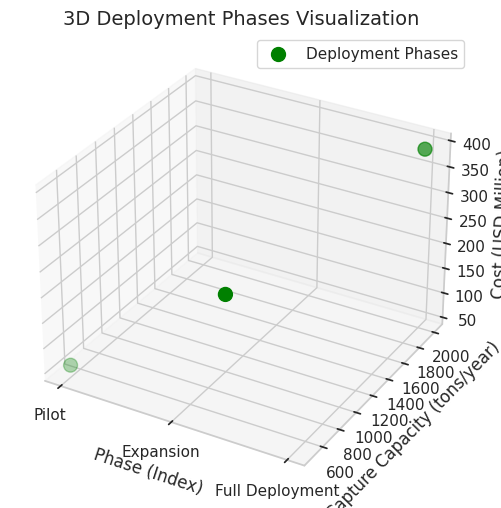

In [157]:
from mpl_toolkits.mplot3d import Axes3D

# 3D deployment data
phases_idx = [1, 2, 3]
capture_capacity = [500, 1000, 2000]
costs = [60, 190, 390]  # CAPEX + OPEX

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(phases_idx, capture_capacity, costs, color='green', s=100, label="Deployment Phases")

# Labels and customization
ax.set_title("3D Deployment Phases Visualization", fontsize=14)
ax.set_xlabel("Phase (Index)", fontsize=12)
ax.set_ylabel("Capture Capacity (tons/year)", fontsize=12)
ax.set_zlabel("Cost (USD Million)", fontsize=12)
ax.set_xticks(phases_idx)
ax.set_xticklabels(phases)

plt.legend()
plt.show()


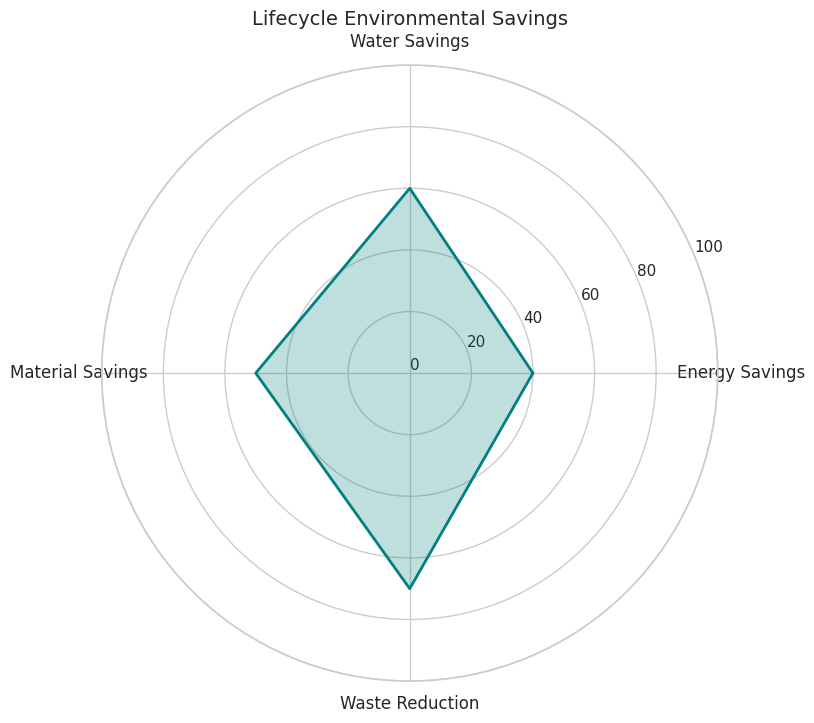

In [158]:
from matplotlib import pyplot as plt

# Example lifecycle impact data
categories = ["Energy Savings", "Water Savings", "Material Savings", "Waste Reduction"]
values = [40, 60, 50, 70]  # Percentage savings

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='teal', alpha=0.25)
ax.plot(angles, values, color='teal', linewidth=2)

# Labels
ax.set_yticks(range(0, 101, 20))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title("Lifecycle Environmental Savings", fontsize=14)

plt.show()


In [159]:
import plotly.graph_objects as go

# Sankey diagram data
labels = ["CO2 Captured", "CO2 Transported", "CO2 Stored", "CO2 Utilized"]
sources = [0, 1, 2]
targets = [1, 2, 3]
values = [500, 400, 300]

fig = go.Figure(go.Sankey(
    node=dict(label=labels, pad=15, thickness=20, color="blue"),
    link=dict(source=sources, target=targets, value=values)
))

fig.update_layout(title_text="CCUS Process Flow", font_size=12)
fig.show()


**Key Insights**

* CO2 Captured (500 tons):

This represents the total CO2 captured at the source, possibly through direct air capture (DAC) systems or industrial processes.
It signifies the starting point of the CCUS (Carbon Capture, Utilization, and Storage) pipeline.
* CO2 Transported:

The captured CO2 is moved via pipelines or other transportation methods to the storage or utilization site.
The diagram indicates the flow from capture to transport is seamless (500 tons, with no losses shown).
* CO2 Stored:

After transportation, a significant portion of CO2 is stored in underground reservoirs or similar storage facilities. This step ensures long-term carbon sequestration.
The storage process is vital for meeting environmental commitments and reducing atmospheric CO2 levels.
* CO2 Utilized:

Some CO2 is diverted for utilization in various industrial processes, such as enhanced oil recovery, synthetic fuels, or carbonates.
This step emphasizes the economic potential of captured CO2 by converting it into valuable by-products.

**Interpretation for Stakeholders**
* Efficiency: The Sankey flow implies a highly efficient system where all captured CO2 is either stored or utilized, showcasing minimal leakage or inefficiencies.
* Environmental Impact: Demonstrates the lifecycle flow of carbon, ensuring that stakeholders understand how much CO2 is effectively removed from the atmosphere.
* Economic Potential: The inclusion of utilization highlights the potential revenue streams and economic benefits of investing in CCUS.

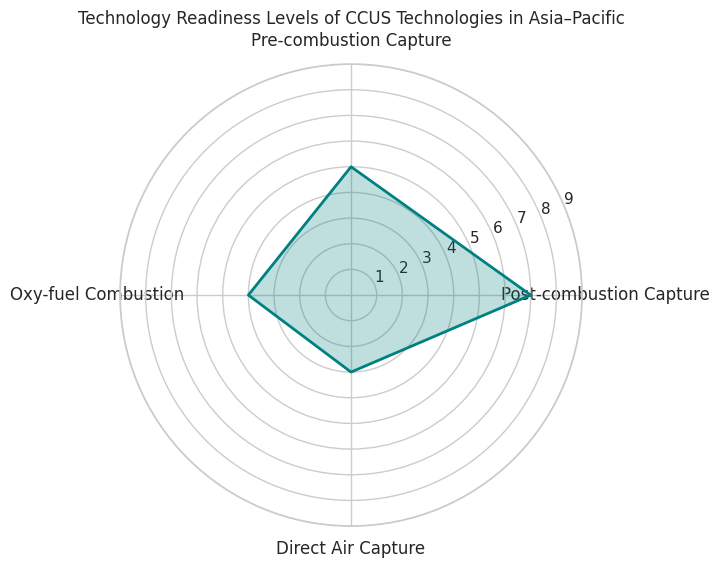

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Define TRLs for technologies
technologies = ['Post-combustion Capture', 'Pre-combustion Capture', 'Oxy-fuel Combustion', 'Direct Air Capture']
trl_levels = [7, 5, 4, 3]  # Example TRL levels

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(technologies), endpoint=False).tolist()
trl_levels += trl_levels[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, trl_levels, color='teal', alpha=0.25)
ax.plot(angles, trl_levels, color='teal', linewidth=2)
ax.set_yticks(range(1, 10))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(technologies, fontsize=12)
ax.set_title('Technology Readiness Levels of CCUS Technologies in Asia–Pacific')
plt.show()


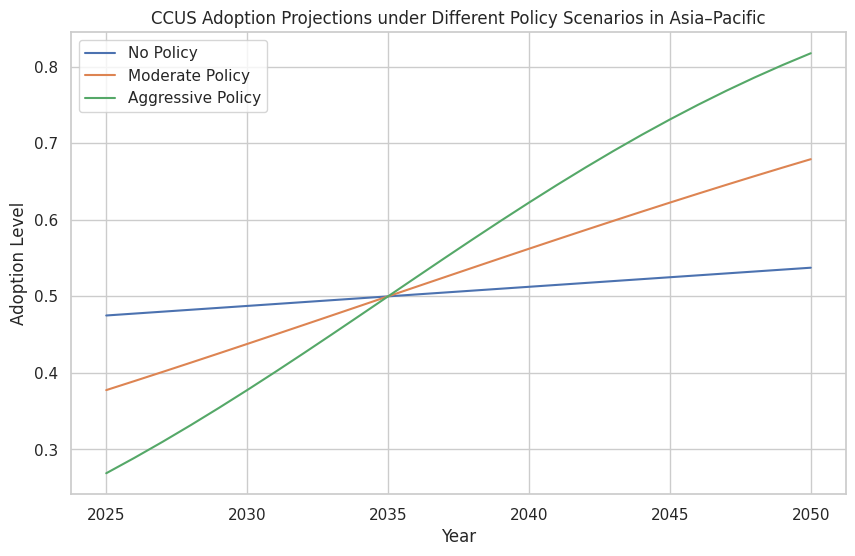

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Define scenarios
scenarios = {
    'No Policy': {'rate': 0.01},
    'Moderate Policy': {'rate': 0.05},
    'Aggressive Policy': {'rate': 0.1}
}

# Time horizon
years = np.arange(2025, 2051)

# Logistic growth function
def logistic_growth(t, rate, capacity=1):
    return capacity / (1 + np.exp(-rate * (t - 2035)))

# Plot adoption curves
plt.figure(figsize=(10, 6))
for scenario, params in scenarios.items():
    adoption = logistic_growth(years, params['rate'])
    plt.plot(years, adoption, label=scenario)

plt.title('CCUS Adoption Projections under Different Policy Scenarios in Asia–Pacific')
plt.xlabel('Year')
plt.ylabel('Adoption Level')
plt.legend()
plt.grid(True)
plt.show()


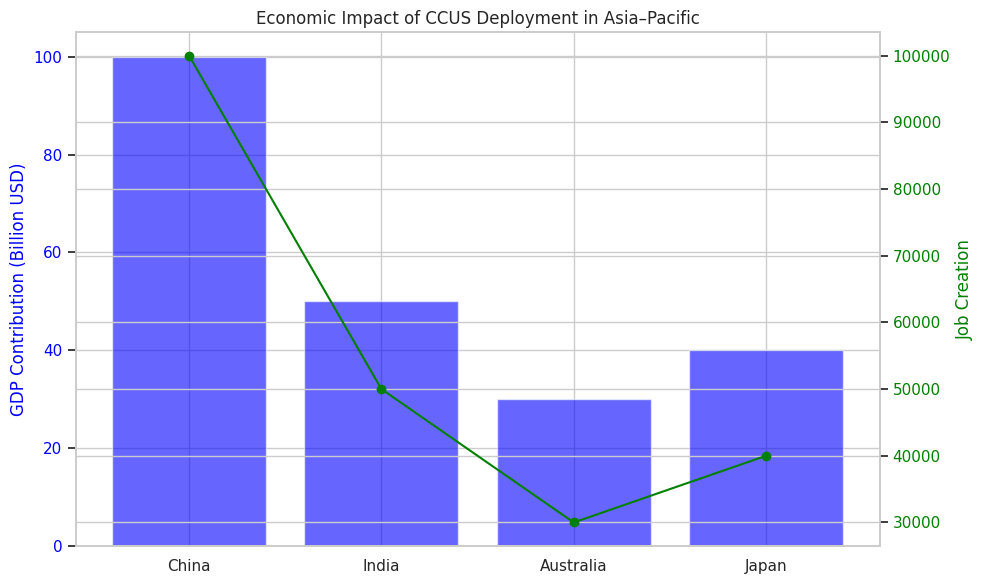

In [162]:
import matplotlib.pyplot as plt

# Economic impact data
countries = ['China', 'India', 'Australia', 'Japan']
gdp_contribution = [100, 50, 30, 40]  # Example GDP contributions in billion USD
job_creation = [100000, 50000, 30000, 40000]  # Example job creation numbers

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP contribution
ax1.bar(countries, gdp_contribution, color='blue', alpha=0.6, label='GDP Contribution (Billion USD)')
ax1.set_ylabel('GDP Contribution (Billion USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot job creation
ax2 = ax1.twinx()
ax2.plot(countries, job_creation, color='green', marker='o', label='Job Creation')
ax2.set_ylabel('Job Creation', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Economic Impact of CCUS Deployment in Asia–Pacific')
fig.tight_layout()
plt.show()


                     Category  Allocation (%)  Budget (USD)
0                         R&D              30    30000000.0
1  Infrastructure Development              40    40000000.0
2           Operational Costs              15    15000000.0
3                   Marketing              10    10000000.0
4                 Contingency               5     5000000.0


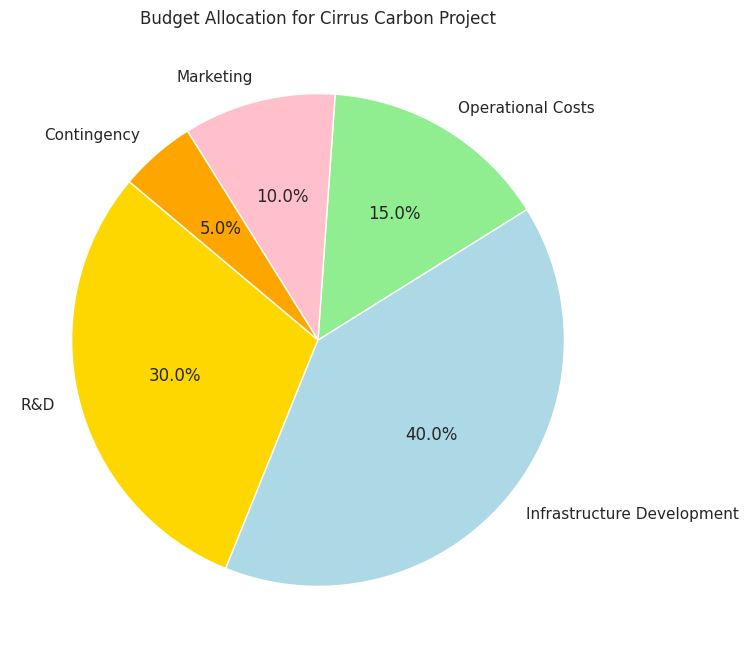

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Define budget categories and allocation percentages
budget_categories = ['R&D', 'Infrastructure Development', 'Operational Costs', 'Marketing', 'Contingency']
allocation_percentage = [30, 40, 15, 10, 5]

# Total budget (example: $100 million)
total_budget = 100_000_000  # USD
allocated_budget = [total_budget * (percent / 100) for percent in allocation_percentage]

# Create a DataFrame for better visualization
budget_df = pd.DataFrame({
    'Category': budget_categories,
    'Allocation (%)': allocation_percentage,
    'Budget (USD)': allocated_budget
})

# Display the DataFrame
print(budget_df)

# Create a pie chart for budget allocation
plt.figure(figsize=(8, 8))
plt.pie(allocation_percentage, labels=budget_categories, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'pink', 'orange'])
plt.title('Budget Allocation for Cirrus Carbon Project')
plt.show()
